In [ ]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
#read the data set
inp0= pd.read_csv(r"C:\Users\TabassumShaikh\Downloads\application_data (1).csv")


In [ ]:
inp1=pd.read_csv(r"C:\Users\TabassumShaikh\Downloads\previous_application.csv")

In [ ]:
inp0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [ ]:
inp0.shape

(307511, 122)

In [ ]:
inp1.shape

(227391, 37)

In [ ]:
print(inp0.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


### When trying to view the datatypes for each of the 122 columns , it showed results for only a few columns , hence i discovered the below line of code to view the entire result

In [ ]:
pd.options.display.max_rows = 500
print(inp0.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


While working in rough sheet, i was stuck in loop to check the missing values in each columns, hence i came up with a function to mention missing values for all the 122 columns

In [ ]:
def col_analysis(x): #Analyse the Columns in the dataframe inclusing their dtypes, missing values and value counts
    for col in x.columns[1:]:  # Iterate through each column name (skipping the first,  an ID column)
        print(f"Column Name: {col}")
        print(f"Data Type: {x[col].dtype}")
        print(f"Missing values : {x[col].isnull().sum()}") # Print the data type of the column

        value_counts = x[col].value_counts(dropna=False).head(30)
        for value, count in value_counts.items():
            print(f"{value}: {count}")

        print()

In [ ]:
col_analysis(inp0)

Column Name: TARGET
Data Type: int64
Missing values : 0
0: 282686
1: 24825

Column Name: NAME_CONTRACT_TYPE
Data Type: object
Missing values : 0
Cash loans: 278232
Revolving loans: 29279

Column Name: CODE_GENDER
Data Type: object
Missing values : 0
F: 202448
M: 105059
XNA: 4

Column Name: FLAG_OWN_CAR
Data Type: object
Missing values : 0
N: 202924
Y: 104587

Column Name: FLAG_OWN_REALTY
Data Type: object
Missing values : 0
Y: 213312
N: 94199

Column Name: CNT_CHILDREN
Data Type: int64
Missing values : 0
0: 215371
1: 61119
2: 26749
3: 3717
4: 429
5: 84
6: 21
7: 7
14: 3
8: 2
9: 2
12: 2
10: 2
19: 2
11: 1

Column Name: AMT_INCOME_TOTAL
Data Type: float64
Missing values : 0
135000.0: 35750
112500.0: 31019
157500.0: 26556
180000.0: 24719
90000.0: 22483
225000.0: 20698
202500.0: 16341
67500.0: 11147
270000.0: 10827
81000.0: 6001
315000.0: 5862
247500.0: 5344
126000.0: 4668
360000.0: 4115
121500.0: 3848
99000.0: 3633
292500.0: 3418
103500.0: 3330
76500.0: 3146
144000.0: 3123
171000.0: 2647
45

nan: 163891
0.0: 85718
0.08: 9886
0.16: 8806
0.24: 6071
0.12: 5593
0.04: 4585
0.2: 4072
0.32: 2788
0.28: 2272
0.4: 1532
0.36: 1383
0.48: 1069
0.44: 707
0.1: 520
0.56: 483
0.64: 448
0.06: 424
0.02: 423
0.14: 369
0.52: 280
0.18: 258
0.1064: 257
0.6: 248
0.1332: 234
0.0532: 225
0.72: 222
0.22: 221
0.0264: 208
1.0: 158

Column Name: ENTRANCES_AVG
Data Type: float64
Missing values : 154828
nan: 154828
0.1379: 34007
0.069: 22956
0.1034: 19533
0.2069: 19062
0.0345: 15380
0.1724: 9185
0.2759: 7895
0.2414: 4165
0.3448: 2066
0.3103: 2049
0.0862: 1250
0.4138: 1195
0.1207: 1144
0.3793: 1009
0.1552: 806
0.0517: 607
0.1897: 554
0.4828: 490
0.4483: 437
0.1148: 409
0.1607: 393
0.0917: 388
0.5517: 352
0.1262: 348
0.0: 323
0.2241: 311
0.1493: 310
0.5172: 299
0.0803: 296

Column Name: FLOORSMAX_AVG
Data Type: float64
Missing values : 153020
nan: 153020
0.1667: 61875
0.3333: 31909
0.0417: 14600
0.375: 7926
0.125: 6974
0.0833: 6586
0.0: 2938
0.4583: 2828
0.625: 1915
0.5417: 1685
0.2083: 1673
0.25: 1624
0.6

nan: 182590
0.0: 15919
0.0193: 197
0.0642: 194
0.0482: 186
0.0143: 180
0.0161: 180
0.0803: 179
0.0241: 177
0.0321: 176
0.0178: 175
0.0152: 168
0.0385: 167
0.0562: 165
0.0154: 164
0.0177: 163
0.0146: 162
0.0337: 159
0.0156: 157
0.0401: 156
0.0141: 155
0.0148: 154
0.0169: 149
0.0449: 147
0.0417: 147
0.023: 146
0.0144: 146
0.02: 146
0.0186: 146
0.0291: 145

Column Name: LIVINGAPARTMENTS_MEDI
Data Type: float64
Missing values : 210199
nan: 210199
0.0513: 4500
0.0684: 4497
0.077: 2926
0.0599: 2708
0.0855: 2014
0.1231: 1921
0.0068: 1715
0.0616: 1691
0.1026: 1517
0.0137: 1487
0.0547: 1435
0.0103: 1413
0.0923: 1365
0.0205: 1088
0.1018: 1073
0.041: 1033
0.0342: 1006
0.0154: 1001
0.1847: 983
0.0308: 939
0.0641: 890
0.0479: 788
0.1223: 729
0.0821: 726
0.1539: 723
0.0274: 700
0.0676: 668
0.0581: 652
0.0667: 646

Column Name: LIVINGAREA_MEDI
Data Type: float64
Missing values : 154350
nan: 154350
0.0: 299
0.0548: 239
0.0518: 234
0.052: 233
0.0521: 232
0.0522: 225
0.0519: 217
0.0513: 217
0.0717: 212


Following are the analysis of variables:
- **Target**: is fine dtype with no missing value
- **NAME_CONTRACT_TYPE**: fine with no missing values but XNA is found, is this a error or a valid entry
- **FLAG_OWN_CAR, FLAG_OWN_REALTY**: have no missing values but it has flag of Y or N which can be converted to 1 or 0 and be converted to int64
- **CNT_CHILDREN** : Correct dtype with no missing,this column can be considered ordinal since the values represent a count with a meaningful order (0, 1, 2, 3, etc.).
- **AMT_INCOME_TOTAL, AMT_CREDIT** : have no missing values
- **AMT_ANNUITY** : 12 missing values with type float

## Segment 1: Analyzing columns for missing values

AMT_ANNUITY has 12 missing values

In [ ]:
inp0.AMT_ANNUITY.mean()


27108.573909183444

In [ ]:
inp0.AMT_ANNUITY.median()

24903.0

The difference between mean and median clearly proves the existence of outlier , hence lets replace misisng with median and work with outlier in the different section

In [ ]:
inp0.AMT_ANNUITY=inp0.AMT_ANNUITY.fillna(inp0.AMT_ANNUITY.median())

In [ ]:
inp0.AMT_GOODS_PRICE.mean()

538396.2074288895

In [ ]:
inp0.AMT_GOODS_PRICE.median()

450000.0

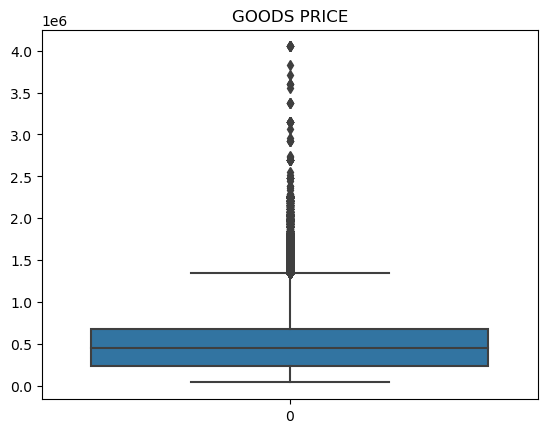

<Figure size 500x500 with 0 Axes>

In [ ]:
sns.boxplot(inp0['AMT_GOODS_PRICE'])
plt.title("GOODS PRICE")
plt.figure(figsize=(5,5))
plt.show()

Replacing the missing in AMT_GOODS_PRICE with median to avoide interference of outliers

In [ ]:
inp0.AMT_GOODS_PRICE=inp0.AMT_GOODS_PRICE.fillna(inp0.AMT_GOODS_PRICE.median())

In [ ]:
inp0.NAME_TYPE_SUITE=inp0.NAME_TYPE_SUITE.fillna("Nobody")

Missing car age maybe indicate that they dont have cars

In [ ]:
inp0.OWN_CAR_AGE=inp0.OWN_CAR_AGE.fillna(0)

In [ ]:
inp0['OCCUPATION_TYPE']=inp0['OCCUPATION_TYPE'].fillna("Unknown")

In [ ]:
inp0['OCCUPATION_TYPE'].isnull().sum()

0

Missing values in CNT_FAM_MEMBERS indicates 0 members in the family. The missing values can be replaced with 0

In [ ]:
inp0.CNT_FAM_MEMBERS=inp0.CNT_FAM_MEMBERS.fillna(0)

In [ ]:
inp0['EXT_SOURCE_1'].mean()

0.5021298056566625

In [ ]:
inp0['EXT_SOURCE_1'].median()

0.5059979305057544

<Axes: >

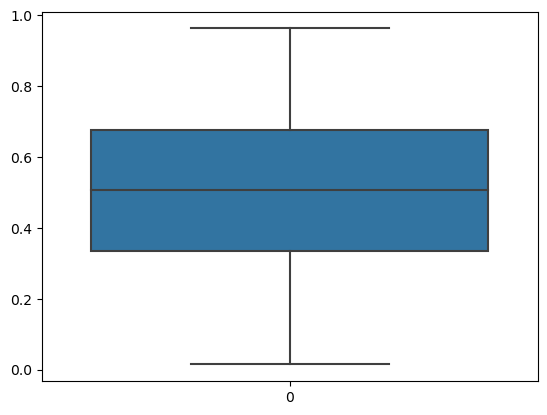

In [ ]:
sns.boxplot(inp0['EXT_SOURCE_1'])

No outliers observed, also mean and median are along the same lines hence replacing with 0

In [ ]:
inp0['EXT_SOURCE_1']=inp0['EXT_SOURCE_1'].fillna(0).round(2)

<Axes: >

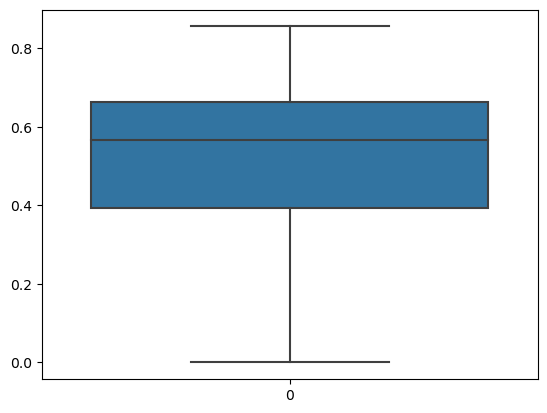

In [ ]:
sns.boxplot(inp0['EXT_SOURCE_2'])

<Axes: >

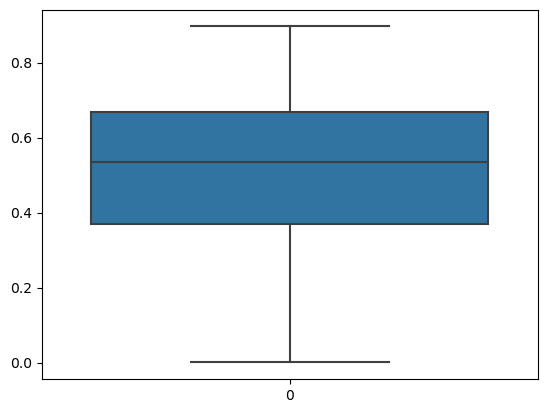

In [ ]:
sns.boxplot(inp0['EXT_SOURCE_3'])

In [ ]:
inp0['EXT_SOURCE_2']=inp0['EXT_SOURCE_2'].fillna(0).round(2)
inp0['EXT_SOURCE_3']=inp0['EXT_SOURCE_3'].fillna(0).round(2)

Now lets check the total % of misisng value that contirbute to the total data

In [ ]:
def missing_percent(col): #View the percentage of missing values
    return col.isna().mean() * 100

In [ ]:
missing_percent(inp0['APARTMENTS_AVG'])

50.74972927797705

The intend to find the percentage was to eradicate the columns if more than 40% however the columns APARTMENT_AVG seems to  be a significant column as having an owned house may impact the loan application do a great extent hence not deleting the column
As i understand , the missing vlaues indicate that the customer probaly do not have any apartment and hence doesnt have reliable asset hence its Inappropriate to fillna using mean or median . I will replace with 0

In [ ]:
inp0['APARTMENTS_AVG']=inp0['APARTMENTS_AVG'].fillna(0).round(2)

In [ ]:
missing_percent(inp0['BASEMENTAREA_AVG'])

58.51595552679416

In [ ]:
inp0['BASEMENTAREA_AVG']=inp0['BASEMENTAREA_AVG'].fillna(0).round(2)

<Axes: >

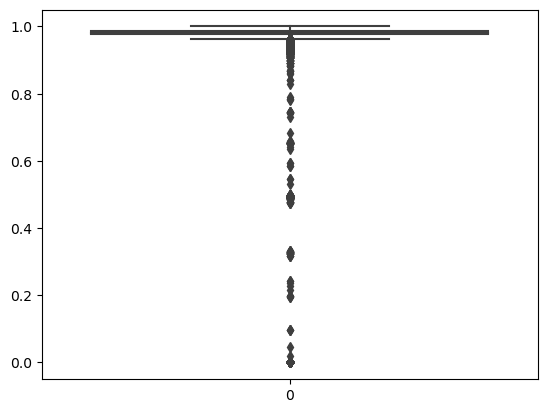

In [ ]:
sns.boxplot(inp0['YEARS_BEGINEXPLUATATION_AVG'])

In [ ]:
inp0['YEARS_BEGINEXPLUATATION_AVG'].mean()

0.9777348581623325

In [ ]:
inp0['YEARS_BEGINEXPLUATATION_AVG'].median()

0.9816

In [ ]:
inp0['YEARS_BEGINEXPLUATATION_AVG']=inp0['YEARS_BEGINEXPLUATATION_AVG'].fillna(inp0['YEARS_BEGINEXPLUATATION_AVG'].median()).round(2)

In [ ]:
missing_percent(inp0['YEARS_BUILD_AVG'])

66.49778381911543

In [ ]:
inp0['YEARS_BUILD_AVG'].mean()

0.752471432592722

In [ ]:
inp0['YEARS_BUILD_AVG'].median()

0.7552

In [ ]:
inp0['YEARS_BUILD_AVG']=inp0['YEARS_BUILD_AVG'].fillna(inp0['YEARS_BUILD_AVG'].median()).round(2)

In [ ]:
missing_percent(inp0.COMMONAREA_AVG)

69.87229725115525

a very huge number of rows are missing data here and as per my understand this col isnt very significant

In [ ]:
inp0.drop(columns='COMMONAREA_AVG', axis=1,inplace=True)

In [ ]:
missing_percent(inp0.ELEVATORS_AVG)

53.29597965601231

Similarly for ELEVATORS_AVG , dropping this column too

In [ ]:
inp0.drop(columns='ELEVATORS_AVG', axis=1,inplace=True)

seems i will be checking the missing percentage more often than not and will be removing them , hence cretaing another function

In [ ]:
def del_col(df): #The previous function is just showing the missing percentage but expanding the function to delete the columns with more 40% of misisng vlaue
    percent = df.isnull().mean() * 100
    columns_to_drop = percent[percent > 40].index
    df = df.drop(columns=columns_to_drop)
    return (df)


In [ ]:
inp0=del_col(inp0)

Now the Columns with most numbers of missing values have been removed , lets analyse the once with lesser number of misisng values and treat them accordingly

In [ ]:
inp0.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [ ]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(dropna=False)

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
NaN        1021
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

lets analyse the outliers for all the fours cols to fill in the missing values

<Axes: >

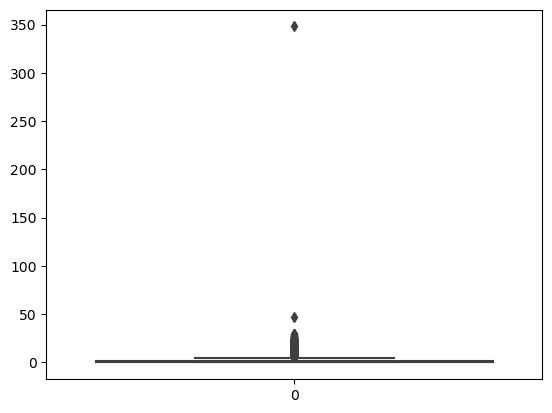

In [ ]:
sns.boxplot(inp0.OBS_30_CNT_SOCIAL_CIRCLE)

<Axes: >

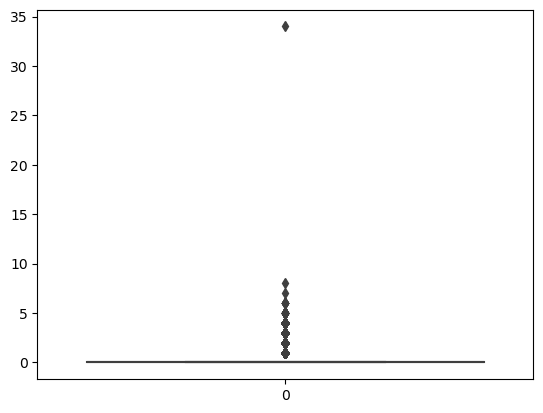

In [ ]:
sns.boxplot(inp0.DEF_30_CNT_SOCIAL_CIRCLE)

<Axes: >

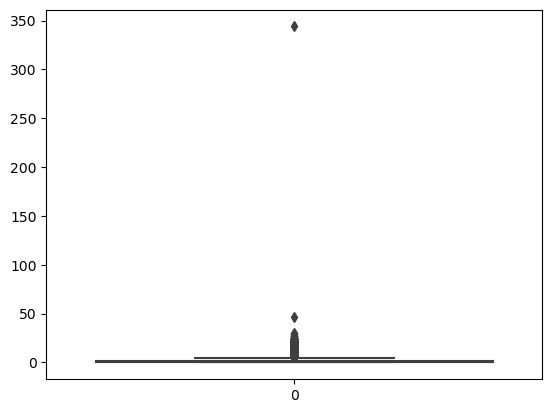

In [ ]:
sns.boxplot(inp0.OBS_60_CNT_SOCIAL_CIRCLE)

<Axes: ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

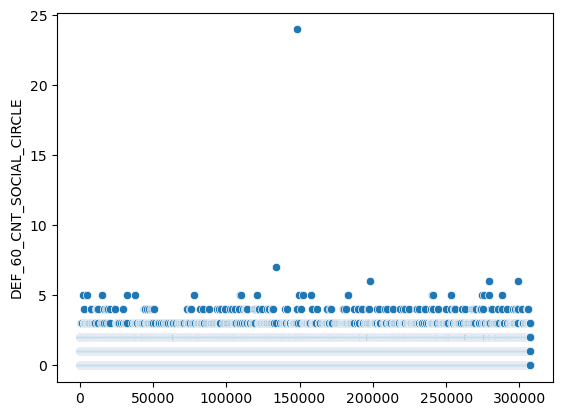

In [ ]:
sns.scatterplot(inp0.DEF_60_CNT_SOCIAL_CIRCLE)

All the four Cols have outliers, hence median should be the correct approach to fill in the missing values


In [ ]:
inp0['OBS_30_CNT_SOCIAL_CIRCLE']=inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
inp0['DEF_30_CNT_SOCIAL_CIRCLE']=inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)
inp0['OBS_60_CNT_SOCIAL_CIRCLE']=inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
inp0['DEF_60_CNT_SOCIAL_CIRCLE']=inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)

The blanks in the following columns maybe represents 0 queries hence replacing the missing with 0s

In [ ]:
inp0['AMT_REQ_CREDIT_BUREAU_DAY']=inp0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)
inp0['AMT_REQ_CREDIT_BUREAU_WEEK']=inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)
inp0['AMT_REQ_CREDIT_BUREAU_MON']=inp0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)
inp0['AMT_REQ_CREDIT_BUREAU_QRT']=inp0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)
inp0['AMT_REQ_CREDIT_BUREAU_YEAR']=inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)
inp0['AMT_REQ_CREDIT_BUREAU_HOUR']=inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)

In [ ]:
inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RAT

Its tiresome to scroll back to the top for value counts , reprinting it here again

## Segment 2 : Standardizing the columns

In [ ]:
inp0.shape

(307511, 79)

In [ ]:
col_analysis(inp0)

Column Name: TARGET
Data Type: int64
Missing values : 0
0: 282686
1: 24825

Column Name: NAME_CONTRACT_TYPE
Data Type: object
Missing values : 0
Cash loans: 278232
Revolving loans: 29279

Column Name: CODE_GENDER
Data Type: object
Missing values : 0
F: 202448
M: 105059
XNA: 4

Column Name: FLAG_OWN_CAR
Data Type: object
Missing values : 0
N: 202924
Y: 104587

Column Name: FLAG_OWN_REALTY
Data Type: object
Missing values : 0
Y: 213312
N: 94199

Column Name: CNT_CHILDREN
Data Type: int64
Missing values : 0
0: 215371
1: 61119
2: 26749
3: 3717
4: 429
5: 84
6: 21
7: 7
14: 3
8: 2
9: 2
12: 2
10: 2
19: 2
11: 1

Column Name: AMT_INCOME_TOTAL
Data Type: float64
Missing values : 0
135000.0: 35750
112500.0: 31019
157500.0: 26556
180000.0: 24719
90000.0: 22483
225000.0: 20698
202500.0: 16341
67500.0: 11147
270000.0: 10827
81000.0: 6001
315000.0: 5862
247500.0: 5344
126000.0: 4668
360000.0: 4115
121500.0: 3848
99000.0: 3633
292500.0: 3418
103500.0: 3330
76500.0: 3146
144000.0: 3123
171000.0: 2647
45

Missing values : 0
0.0: 305885
1.0: 1560
2.0: 56
3.0: 9
4.0: 1

Column Name: AMT_REQ_CREDIT_BUREAU_DAY
Data Type: float64
Missing values : 0
0.0: 306022
1.0: 1292
2.0: 106
3.0: 45
4.0: 26
5.0: 9
6.0: 8
9.0: 2
8.0: 1

Column Name: AMT_REQ_CREDIT_BUREAU_WEEK
Data Type: float64
Missing values : 0
0.0: 298975
1.0: 8208
2.0: 199
3.0: 58
4.0: 34
6.0: 20
5.0: 10
8.0: 5
7.0: 2

Column Name: AMT_REQ_CREDIT_BUREAU_MON
Data Type: float64
Missing values : 0
0.0: 263752
1.0: 33147
2.0: 5386
3.0: 1991
4.0: 1076
5.0: 602
6.0: 343
7.0: 298
9.0: 206
8.0: 185
10.0: 132
11.0: 119
12.0: 77
13.0: 72
14.0: 40
15.0: 35
16.0: 23
17.0: 14
18.0: 6
19.0: 3
24.0: 1
23.0: 1
27.0: 1
22.0: 1

Column Name: AMT_REQ_CREDIT_BUREAU_QRT
Data Type: float64
Missing values : 0
0.0: 256936
1.0: 33862
2.0: 14412
3.0: 1717
4.0: 476
5.0: 64
6.0: 28
8.0: 7
7.0: 7
261.0: 1
19.0: 1

Column Name: AMT_REQ_CREDIT_BUREAU_YEAR
Data Type: float64
Missing values : 0
0.0: 113320
1.0: 63405
2.0: 50192
3.0: 33628
4.0: 20714
5.0: 12052
6.0: 6

Following are the analysis of variables:
- **Target**: fine dtype with no missing value
- **NAME_CONTRACT_TYPE**: fine with no missing values
- **Code Gender** has no missing values but it has XNA which maybe an human error or some other gender
- **FLAG_OWN_CAR, FLAG_OWN_REALTY**: have no missing values but it has flag of Y or N which can be converted to 1 or 0 and be converted to int64
- **CNT_CHILDREN,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE** : Correct dtype with no missing,this column can be considered ordinal since the values represent a count with a meaningful order (0, 1, 2, 3, etc.).



In [ ]:
def flag_conversion(df_col): #to convert the flag cols from Y/N to 1/0
    return df_col.apply(lambda x: 1 if x == 'Y' else 0).astype("int64")

In [ ]:
inp0.FLAG_OWN_CAR=flag_conversion(inp0.FLAG_OWN_CAR)

In [ ]:
inp0.FLAG_OWN_REALTY=flag_conversion(inp0.FLAG_OWN_REALTY)

NAME_TYPE_SUITE lets merge Other_A and Other_B into one Others

In [ ]:
inp0['NAME_TYPE_SUITE']=inp0['NAME_TYPE_SUITE'].replace({
    "Other_A":"Others",
    "Other_B":"Others"
})

REGION_POPULATION_RELATIVE, rounding it off for a better readibility

In [ ]:
inp0['REGION_POPULATION_RELATIVE']=round(inp0['REGION_POPULATION_RELATIVE'],3)

After doing an online research , i understood the negative value indictes the difference between current value and the clients DOB, hence its negative, which can simply be multipled by -1 to convert into positive.


In [ ]:
inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH'] * -1

Now Since there are more columns with negative counts of days , lets create a function to reduce lines of codes

In [ ]:
def convert_days_to_positive(col):
    return col.abs()

In [ ]:
inp0['DAYS_EMPLOYED']=convert_days_to_positive(inp0['DAYS_EMPLOYED'])
inp0['DAYS_REGISTRATION']=convert_days_to_positive(inp0['DAYS_REGISTRATION'])
inp0['DAYS_ID_PUBLISH']=convert_days_to_positive(inp0['DAYS_ID_PUBLISH'])

OWN_CAR_AGE maybe this is number of months

CNT_FAM_MEMBERS converting to int64 since count of family member cannot be float

In [ ]:
inp0.CNT_FAM_MEMBERS=inp0.CNT_FAM_MEMBERS.astype("int64")

In [ ]:
inp0.CNT_FAM_MEMBERS

0         1
1         2
2         1
3         2
4         1
         ..
307506    1
307507    1
307508    1
307509    2
307510    2
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: int64

Maybe i should be converting the col WEEKDAY_APPR_PROCESS_START into numbers but not sure yet, will do if needed further for analysis

ORGANIZATION_TYPE this column has many value which could be clubbed into one, let standardize them

In [ ]:
inp0['ORGANIZATION_TYPE'] = inp0['ORGANIZATION_TYPE'].replace({
    'Trade: type 1': 'Trade',
    'Trade: type 2': 'Trade',
    'Trade: type 3': 'Trade',
    'Trade: type 4': 'Trade',
    'Trade: type 5': 'Trade',
    'Trade: type 6': 'Trade',
    'Trade: type 7': 'Trade',
    'Industry: type 1': 'Industry',
    'Industry: type 2': 'Industry',
    'Industry: type 3': 'Industry',
    'Industry: type 4': 'Industry',
    'Industry: type 5': 'Industry',
    'Industry: type 6': 'Industry',
    'Industry: type 7': 'Industry',
    'Industry: type 8': 'Industry',
    'Industry: type 9': 'Industry',
    'Industry: type 10': 'Industry',
    'Industry: type 11': 'Industry',
    'Industry: type 12': 'Industry',
    'Industry: type 13': 'Industry',
    'Business Entity Type 1': 'Business Entity',
    'Business Entity Type 2': 'Business Entity',
    'Business Entity Type 3': 'Business Entity',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'Transport: type 4': 'Transport',
    'XNA': 'Unknown',
    'Unknown': 'Unknown'
    })


In [ ]:
convert_days_to_positive(inp0.DAYS_LAST_PHONE_CHANGE)

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

Seems all columns have been standardized, lets review

In [ ]:
pd.set_option('display.max_columns', None) # I couldnt view all the cols, i research and found out this way of viewing all them cols
inp0.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019        9461            637             3648.0   
1                       0.004       16765           1188             1186.0   
2                       0.010       19046            225             4260.0   
3                       0.008       19005           3039             9833.0   
4                       0.029       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          0.0           1               1                0   
1              291          0.0           1               1                0   
2             2531         26.0           1               1                1   
3             2437          0.0           1               1                0   
4             3458          0.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

## Segment 3: Analysing the outliers  

<Figure size 100x100 with 0 Axes>

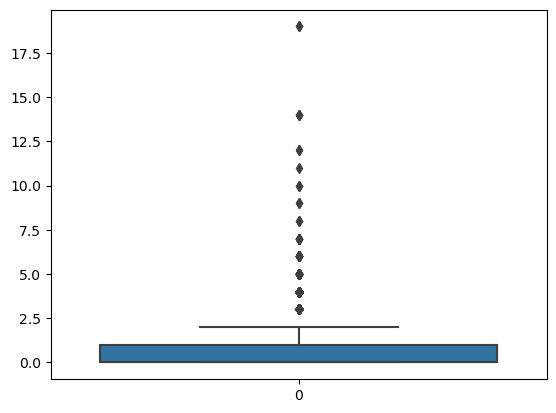

<Figure size 100x100 with 0 Axes>

In [ ]:
sns.boxplot(inp0.CNT_CHILDREN)
plt.figure(figsize=(1,1))

In [ ]:
inp0.CNT_CHILDREN.quantile([0.25,0.5,0.75,0.80,0.95,0.99])

0.25    0.0
0.50    0.0
0.75    1.0
0.80    1.0
0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

In [ ]:
inp0.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

I was unsure how to treat this outliers, hence i will be replacing all the cunts >5 with 5 to normalise the skewness of the data

In [ ]:
inp0.CNT_CHILDREN=np.where(inp0.CNT_CHILDREN>5,5,inp0.CNT_CHILDREN)

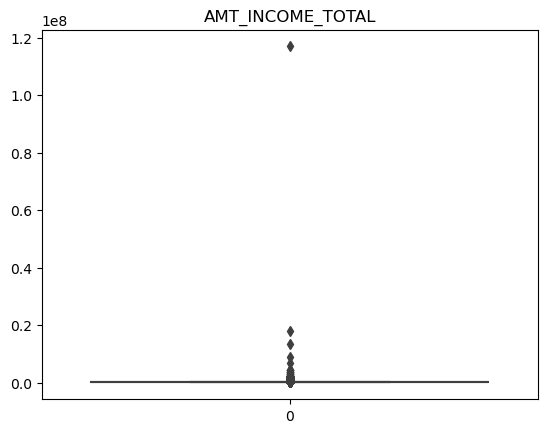

In [ ]:
sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.show()

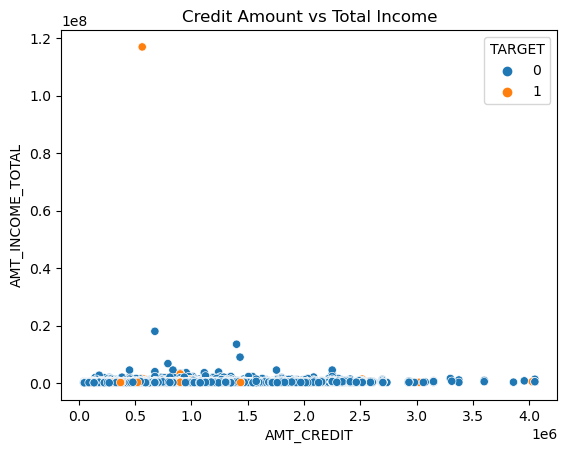

In [ ]:
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', hue='TARGET', data=inp0)
plt.title('Credit Amount vs Total Income')
plt.show()

In [ ]:
inp0.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    112500.0
0.50    147150.0
0.75    202500.0
0.80    225000.0
0.95    337500.0
0.96    360000.0
0.97    382500.0
0.98    427500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
percentile_97 = inp0['AMT_INCOME_TOTAL'].quantile(0.97)

In [ ]:
percentile_97

382500.0

In [ ]:
inp0.AMT_INCOME_TOTAL= np.where(inp0.AMT_INCOME_TOTAL>percentile_97,percentile_97,inp0.AMT_INCOME_TOTAL)

<Axes: >

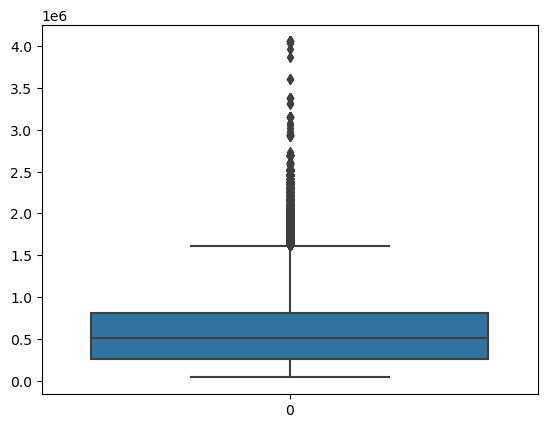

In [ ]:
sns.boxplot(inp0.AMT_CREDIT)

As Rahim mentioned in one of the lectures, the values are outliers but not far away from each other

In [ ]:
inp0.AMT_CREDIT.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,1])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.80     900000.0
0.95    1350000.0
0.96    1436850.0
0.97    1546020.0
0.98    1661418.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [ ]:
percentile_99=inp0.AMT_CREDIT.quantile(1)

In [ ]:
percentile_99

4050000.0

In [ ]:
inp0.AMT_CREDIT= np.where(inp0.AMT_CREDIT>percentile_99,percentile_99,inp0.AMT_CREDIT)

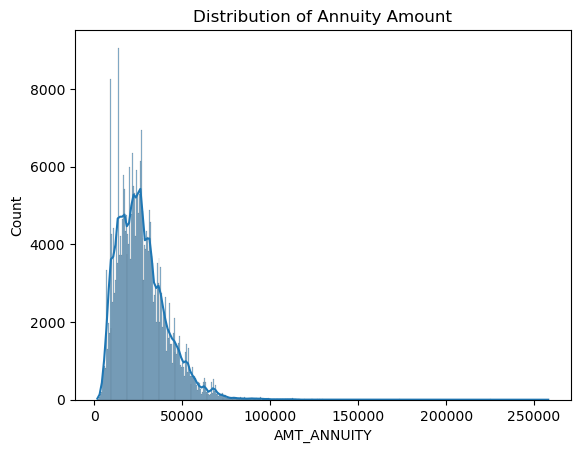

In [ ]:
sns.histplot(inp0['AMT_ANNUITY'], kde=True)
plt.title('Distribution of Annuity Amount')
plt.show()


<Axes: >

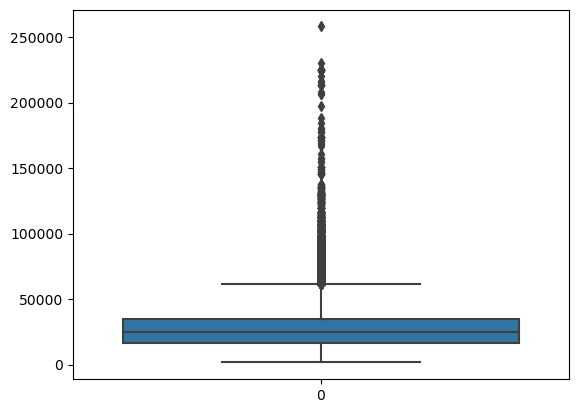

In [ ]:
sns.boxplot(inp0['AMT_ANNUITY'])

In [ ]:
inp0.AMT_ANNUITY.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,1])

0.25     16524.00
0.50     24903.00
0.75     34596.00
0.80     37516.50
0.95     53325.00
0.96     55624.50
0.97     58480.65
0.98     62964.00
0.99     70006.50
1.00    258025.50
Name: AMT_ANNUITY, dtype: float64

In [ ]:
def handling_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return(np.where(col > upper_bound, upper_bound, col))

In [ ]:
inp0.AMT_ANNUITY=handling_outliers(inp0.AMT_ANNUITY)

<Axes: >

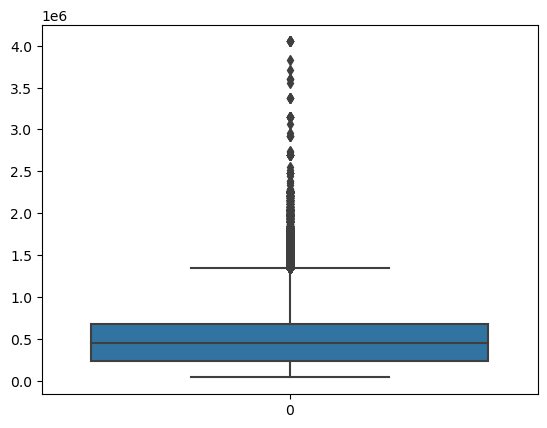

In [ ]:
sns.boxplot(inp0.AMT_GOODS_PRICE)

In [ ]:
inp0.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.80     814500.0
0.95    1305000.0
0.96    1350000.0
0.97    1354500.0
0.98    1575000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

upperbound and 0.96 are on similar lines and hence i will replace outlier with0.96 percentile

In [ ]:
percentile_96 =inp0['AMT_GOODS_PRICE'].quantile(0.96)

In [ ]:
inp0.AMT_GOODS_PRICE= np.where(inp0.AMT_GOODS_PRICE>percentile_96,percentile_96,inp0.AMT_GOODS_PRICE)

In [ ]:
inp0.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_C

In [ ]:
inp0.REGION_POPULATION_RELATIVE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    0.010
0.50    0.019
0.75    0.029
0.80    0.031
0.95    0.046
0.96    0.046
0.97    0.046
0.98    0.073
0.99    0.073
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [ ]:
inp0.REGION_POPULATION_RELATIVE=handling_outliers(inp0.REGION_POPULATION_RELATIVE)

<Axes: >

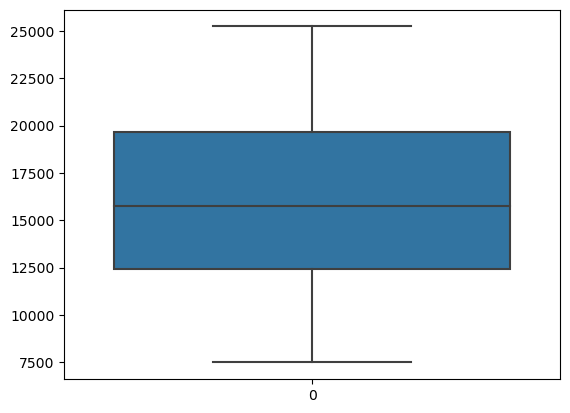

In [ ]:
sns.boxplot(inp0.DAYS_BIRTH)

In [ ]:
inp0['DAYS_BIRTH'].max()

25229

In [ ]:
inp0.DAYS_BIRTH.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    12413.0
0.50    15750.0
0.75    19682.0
0.80    20474.0
0.95    23204.0
0.96    23431.0
0.97    23648.0
0.98    23945.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

I dont seem to find any outlier

<Axes: >

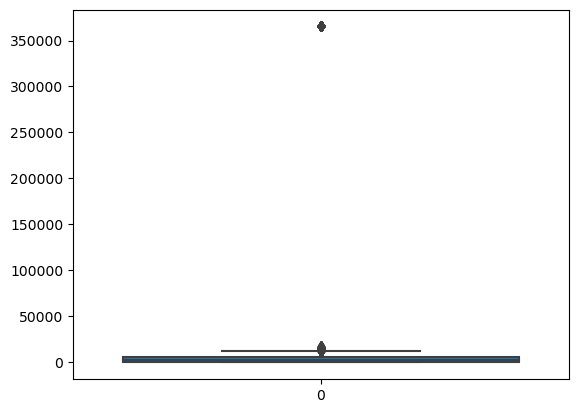

In [ ]:
sns.boxplot(inp0.DAYS_EMPLOYED)

In [ ]:
inp0.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
230         151
199         151
          ...  
13961         1
11827         1
10176         1
9459          1
8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

365243: 55352
This value indicates approx 1000 yrs which is impossible, so it seems like a human error to me and assuming that the clients are unemployed in those data points

In [ ]:
inp0['DAYS_EMPLOYED']=inp0['DAYS_EMPLOYED'].replace(-365243,0)

In [ ]:
inp0.DAYS_EMPLOYED.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25       933.0
0.50      2219.0
0.75      5707.0
0.80      9188.0
0.95    365243.0
0.96    365243.0
0.97    365243.0
0.98    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

No outliers

<Axes: >

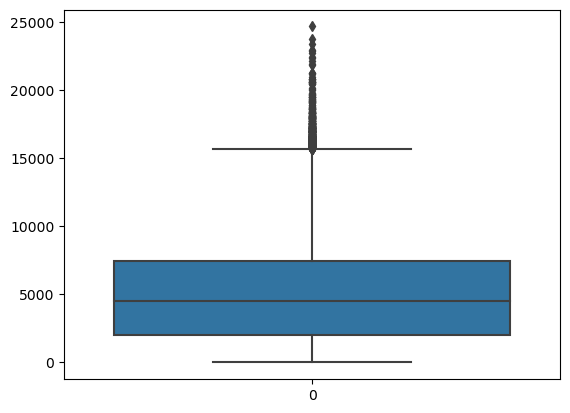

In [ ]:
sns.boxplot(inp0.DAYS_REGISTRATION)

In [ ]:
inp0.DAYS_REGISTRATION.value_counts()

1.0        113
7.0         98
6.0         96
4.0         92
2.0         92
          ... 
15581.0      1
15031.0      1
14804.0      1
15008.0      1
14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [ ]:
inp0.DAYS_REGISTRATION.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25     2010.0
0.50     4504.0
0.75     7479.5
0.80     8230.0
0.95    11416.0
0.96    11879.0
0.97    12387.0
0.98    12994.0
0.99    13879.0
Name: DAYS_REGISTRATION, dtype: float64

In [ ]:
inp0.DAYS_REGISTRATION[inp0.DAYS_REGISTRATION>16000].value_counts()

16131.0    3
16366.0    3
16107.0    3
17122.0    2
16237.0    2
18660.0    2
16095.0    2
16943.0    2
16169.0    2
16481.0    2
16983.0    2
16185.0    2
16406.0    2
16021.0    2
16666.0    2
16697.0    2
16191.0    2
16336.0    2
16038.0    2
17501.0    2
16057.0    2
16003.0    2
16066.0    2
17103.0    2
16656.0    2
16280.0    2
16442.0    2
16828.0    2
16563.0    2
17596.0    2
16970.0    2
17313.0    2
17252.0    2
16507.0    2
17096.0    2
16391.0    2
17959.0    2
16222.0    2
16360.0    2
16343.0    1
22858.0    1
17130.0    1
19504.0    1
16913.0    1
18123.0    1
17951.0    1
17763.0    1
16138.0    1
16027.0    1
19424.0    1
16220.0    1
16298.0    1
17441.0    1
17183.0    1
16582.0    1
16663.0    1
16900.0    1
18718.0    1
16081.0    1
16317.0    1
16447.0    1
17566.0    1
16276.0    1
17534.0    1
17253.0    1
17066.0    1
16571.0    1
16278.0    1
16225.0    1
16475.0    1
20096.0    1
17747.0    1
16454.0    1
16997.0    1
18864.0    1
17513.0    1
16820.0    1

Not a drastic change from the upperbound

<Axes: >

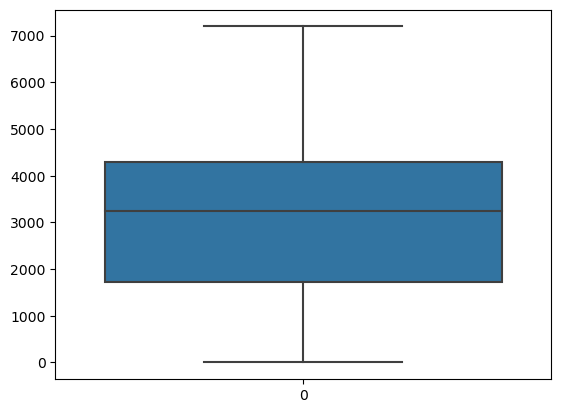

In [ ]:
sns.boxplot(inp0.DAYS_ID_PUBLISH)

No outlier

<Axes: >

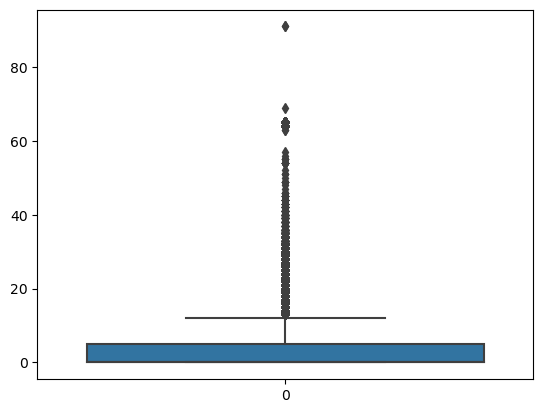

In [ ]:
sns.boxplot(inp0.OWN_CAR_AGE)

In [ ]:
inp0.OWN_CAR_AGE=handling_outliers(inp0.OWN_CAR_AGE)

In [ ]:
inp0.OWN_CAR_AGE.value_counts()

0.0     205063
12.5     37857
7.0       7424
6.0       6382
3.0       6370
8.0       5887
2.0       5852
4.0       5557
1.0       5280
9.0       5020
10.0      4806
12.0      4257
11.0      4161
5.0       3595
Name: OWN_CAR_AGE, dtype: int64

<Axes: >

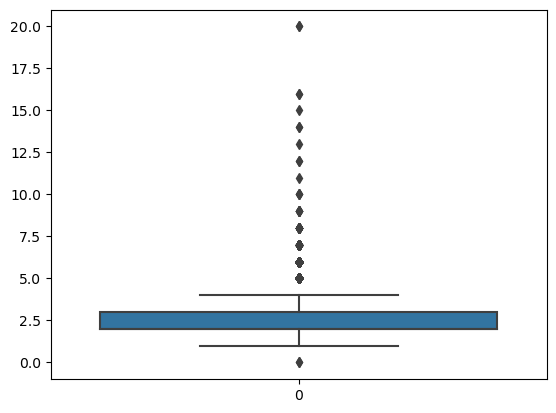

In [ ]:
sns.boxplot(inp0.CNT_FAM_MEMBERS)

In [ ]:
inp0.CNT_FAM_MEMBERS=handling_outliers(inp0.CNT_FAM_MEMBERS)

In [ ]:
inp0[inp0.CNT_FAM_MEMBERS==4.5]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
91          100108       0         Cash loans           F             0   
92          100110       0         Cash loans           M             1   
144         100166       0         Cash loans           F             0   
180         100209       1    Revolving loans           M             0   
182         100211       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307293      456016       0         Cash loans           M             1   
307329      456053       0         Cash loans           F             0   
307387      456113       0         Cash loans           M             0   
307462      456201       0         Cash loans           F             1   
307501      456245       0         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
91                    1             3          171000.0    545040.0   
92                    1             3          135000.0    373140.0   
144                   1             3           58500.0    152820.0   
180                   1             3          180000.0    540000.0   
182                   0             3          225000.0    746280.0   
...                 ...           ...               ...         ...   
307293                0             4          135000.0    269550.0   
307329                1             3          135000.0    364896.0   
307387                1             3          180000.0   1096020.0   
307462                1             3          135000.0   1024785.0   
307501                1             3           81000.0    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
91          31288.5         450000.0   Unaccompanied               Working   
92          25065.0         337500.0   Unaccompanied  Commercial associate   
144         15241.5         135000.0   Unaccompanied               Working   
180         27000.0         540000.0   Unaccompanied  Commercial associate   
182         49873.5         675000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
307293      14242.5         225000.0   Unaccompanied  Commercial associate   
307329      28957.5         315000.0   Unaccompanied               Working   
307387      56092.5         900000.0          Others  Commercial associate   
307462      57222.0         922500.0          Family               Working   
307501      11871.0         225000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
91      Secondary / secondary special            Married    House / apartment   
92      Secondary / secondary special            Married    House / apartment   
144     Secondary / secondary special            Married  Municipal apartment   
180                  Higher education            Married    House / apartment   
182     Secondary / secondary special            Married    House / apartment   
...                               ...                ...                  ...   
307293  Secondary / secondary special            Married    House / apartment   
307329  Secondary / secondary special            Married    House / apartment   
307387  Secondary / secondary special     Civil marriage    House / apartment   
307462  Secondary / secondary special            Married    House / apartment   
307501  Secondary / secondary special            Married    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
91                           0.007       12780           1415   
92                           0.036       10744            741   
144                          0.025       14359           1894   
180                          0.025       15326           1038   
182                

In [ ]:
inp0.CNT_FAM_MEMBERS.value_counts()

2.0    158357
1.0     67847
3.0     52601
4.0     24697
4.5      4007
0.0         2
Name: CNT_FAM_MEMBERS, dtype: int64

Although 1 is an outlier but its not an invalid or extremely outbound value hence not replacing the lower bound values.However 4.5 doesnt make sense

<Axes: >

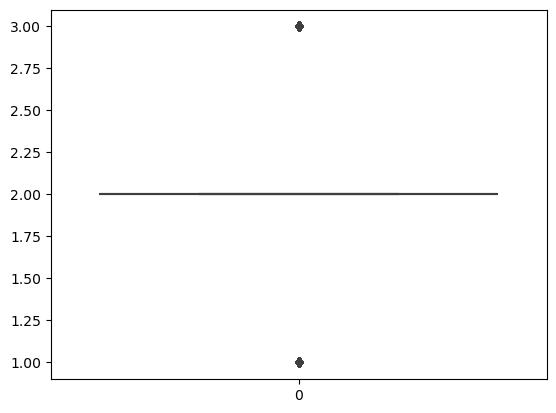

In [ ]:
sns.boxplot(inp0.REGION_RATING_CLIENT)


In [ ]:
inp0.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

<Axes: >

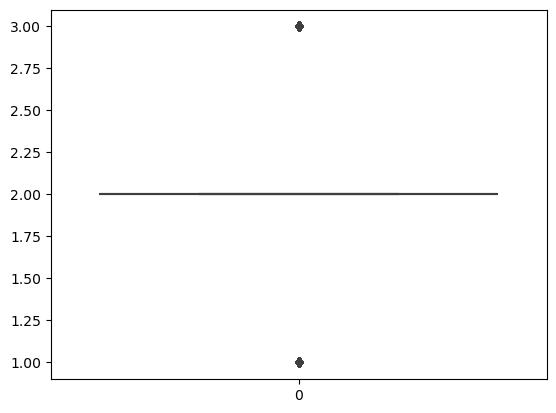

In [ ]:
sns.boxplot(inp0.REGION_RATING_CLIENT_W_CITY)

In [ ]:
inp0.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [ ]:
inp0.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_C

<Axes: >

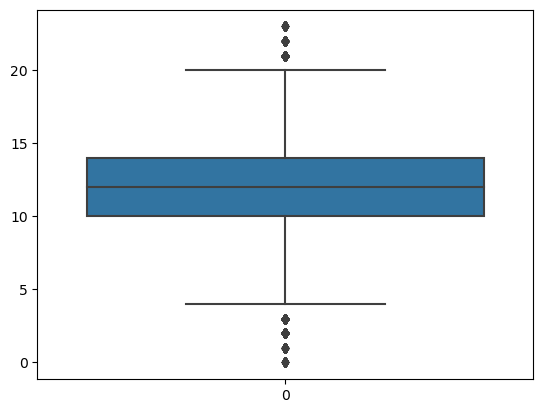

In [ ]:
sns.boxplot(inp0.HOUR_APPR_PROCESS_START)

In [ ]:
inp0.HOUR_APPR_PROCESS_START.value_counts()

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

No outliers

In [ ]:
inp0.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [ ]:
inp0.REG_REGION_NOT_WORK_REGION.value_counts()

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [ ]:
inp0.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [ ]:
inp0.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [ ]:
inp0.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

<Axes: >

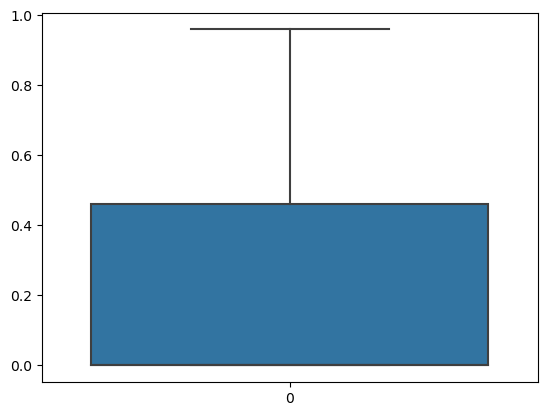

In [ ]:
sns.boxplot(inp0.EXT_SOURCE_1)

Uncertain as to how should i treat the outlier because as per upper bound the values are valid uptil 1.15 but 0.96 is showing as 0.96
Replacing the values after 0.99 with with 0.99 percentile

<Axes: >

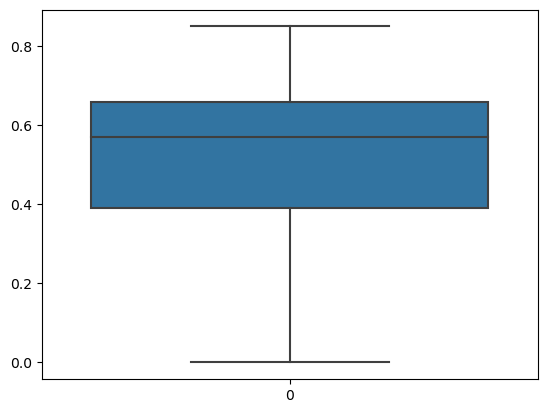

In [ ]:
sns.boxplot(inp0.EXT_SOURCE_2)

<Axes: >

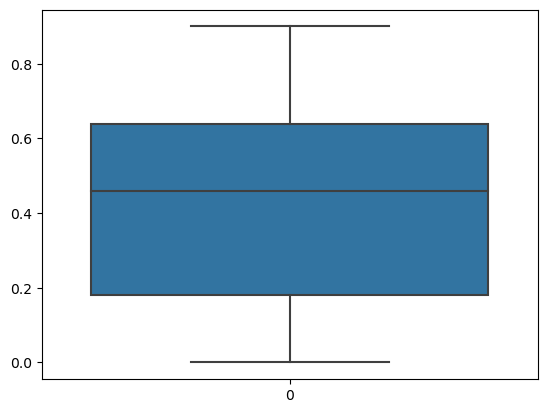

In [ ]:
sns.boxplot(inp0.EXT_SOURCE_3)

<Axes: >

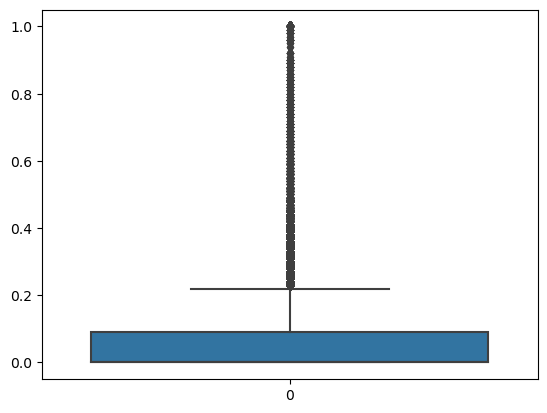

In [ ]:
sns.boxplot(inp0.APARTMENTS_AVG)

In [ ]:
inp0.APARTMENTS_AVG.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    0.00
0.50    0.00
0.75    0.09
0.80    0.10
0.95    0.24
0.96    0.26
0.97    0.30
0.98    0.35
0.99    0.44
Name: APARTMENTS_AVG, dtype: float64

In [ ]:
inp0.APARTMENTS_AVG=np.where(inp0.APARTMENTS_AVG>inp0.APARTMENTS_AVG.quantile(0.97),inp0.APARTMENTS_AVG.quantile(0.97),inp0.APARTMENTS_AVG )

<Axes: >

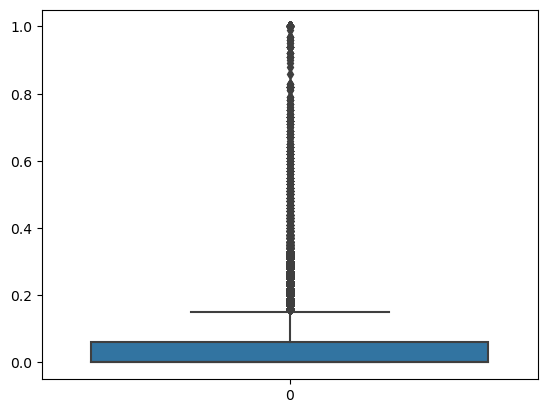

In [ ]:
sns.boxplot(inp0.BASEMENTAREA_AVG)

In [ ]:
inp0.BASEMENTAREA_AVG.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    0.00
0.50    0.00
0.75    0.06
0.80    0.08
0.95    0.16
0.96    0.17
0.97    0.19
0.98    0.23
0.99    0.29
Name: BASEMENTAREA_AVG, dtype: float64

In [ ]:
inp0.BASEMENTAREA_AVG=np.where(inp0.BASEMENTAREA_AVG>inp0.BASEMENTAREA_AVG.quantile(0.97),
                             inp0.BASEMENTAREA_AVG.quantile(0.97),inp0.BASEMENTAREA_AVG )

<Axes: >

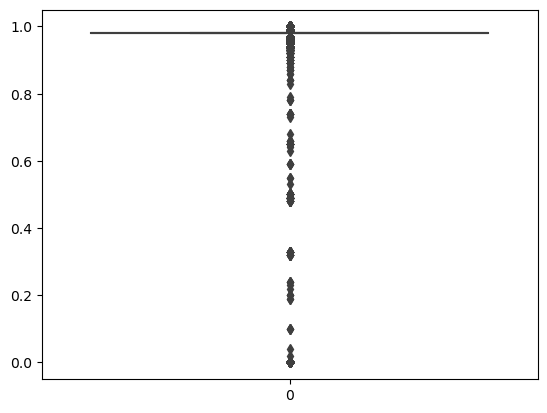

In [ ]:
sns.boxplot(inp0.YEARS_BEGINEXPLUATATION_AVG)

In [ ]:
inp0.YEARS_BEGINEXPLUATATION_AVG.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])


0.25    0.98
0.50    0.98
0.75    0.98
0.80    0.98
0.95    0.99
0.96    0.99
0.97    1.00
0.98    1.00
0.99    1.00
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [ ]:
inp0['YEARS_BEGINEXPLUATATION_AVG'].value_counts()

0.98    223003
0.99     46217
0.97     23214
1.00      9338
0.96      2928
0.95      1511
0.00       514
0.94       343
0.93       133
0.92        70
0.49        61
0.91        28
0.50        22
0.65        22
0.33        16
0.48        10
0.89        10
0.90         9
0.32         8
0.74         7
0.59         4
0.87         4
0.66         4
0.88         3
0.84         3
0.24         3
0.10         3
0.20         3
0.78         3
0.86         2
0.19         2
0.55         2
0.79         1
0.63         1
0.23         1
0.83         1
0.68         1
0.22         1
0.73         1
0.53         1
0.64         1
0.04         1
0.02         1
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: int64

As per the above analysis , it seems everything below 0.98 and above 0.98 is an outlier so if i replace all the outlier with 0.98 the column would become static and would be of much use , hence i decided to delete the entire columns itself

In [ ]:
inp0.drop(columns='YEARS_BEGINEXPLUATATION_AVG', axis=1, inplace=True)

<Axes: >

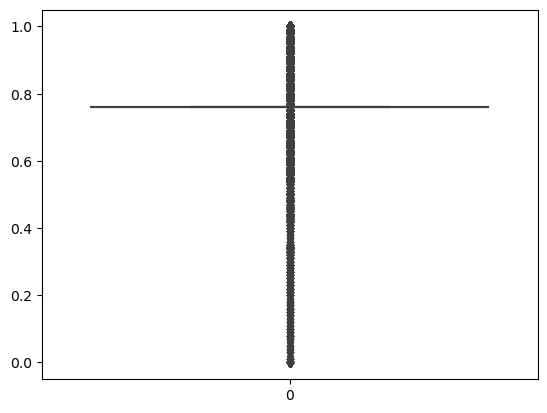

In [ ]:
sns.boxplot(inp0.YEARS_BUILD_AVG)

In [ ]:
inp0.YEARS_BUILD_AVG.value_counts()

0.76    209564
0.82      5863
0.80      5582
0.73      5563
0.78      5182
0.71      5062
0.69      4500
0.84      4213
0.67      3783
0.65      3633
0.63      2960
0.86      2932
0.81      2755
0.83      2738
0.75      2731
0.77      2712
0.74      2681
0.79      2629
0.72      2577
0.70      2439
0.68      2098
0.66      1748
0.64      1723
0.85      1655
0.97      1561
0.61      1503
0.88      1365
0.95      1312
0.99      1139
0.62      1115
0.87      1012
0.59       895
0.90       894
0.93       872
0.96       822
0.98       786
0.94       530
0.89       521
0.60       505
0.56       481
0.91       424
0.58       388
0.92       375
0.34       298
0.57       298
0.48       220
0.50       197
0.54       195
0.44       189
0.55       187
0.46       176
1.00       173
0.42       166
0.33       153
0.47       114
0.49       113
0.43       112
0.52       110
0.00       104
0.45       101
0.53        98
0.35        63
0.31        54
0.22        48
0.41        47
0.51        46
0.29      

same with this col , hence deleting the column

In [ ]:
inp0.drop(columns='YEARS_BUILD_AVG', axis=1, inplace=True)

<Axes: >

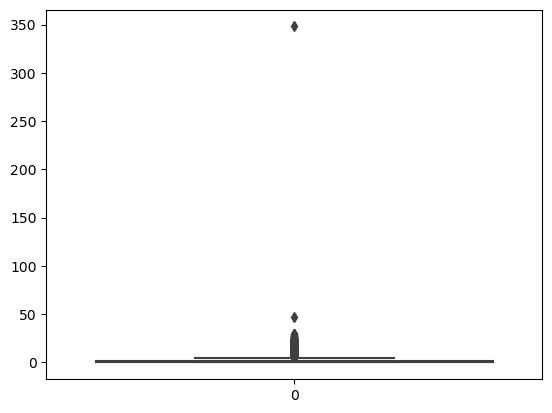

In [ ]:
sns.boxplot(inp0.OBS_30_CNT_SOCIAL_CIRCLE)
#Upper Bound: 5.0
#Lower Bound: -3.0

In [ ]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25     0.0
0.50     0.0
0.75     2.0
0.80     3.0
0.95     6.0
0.96     7.0
0.97     7.0
0.98     9.0
0.99    10.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
inp0.OBS_30_CNT_SOCIAL_CIRCLE=np.where(inp0.OBS_30_CNT_SOCIAL_CIRCLE>inp0.OBS_30_CNT_SOCIAL_CIRCLE.quantile(0.97),
                             inp0.OBS_30_CNT_SOCIAL_CIRCLE.quantile(0.97),inp0.OBS_30_CNT_SOCIAL_CIRCLE )

In [ ]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,0.999])

0.250    0.0
0.500    0.0
0.750    0.0
0.800    0.0
0.950    1.0
0.960    1.0
0.970    1.0
0.980    2.0
0.990    2.0
0.999    4.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
inp0.DEF_30_CNT_SOCIAL_CIRCLE=np.where(inp0.DEF_30_CNT_SOCIAL_CIRCLE>inp0.DEF_30_CNT_SOCIAL_CIRCLE.quantile(0.99),
                             inp0.DEF_30_CNT_SOCIAL_CIRCLE.quantile(0.99),inp0.DEF_30_CNT_SOCIAL_CIRCLE )

In [ ]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,0.999])

0.250     0.0
0.500     0.0
0.750     2.0
0.800     3.0
0.950     6.0
0.960     7.0
0.970     7.0
0.980     8.0
0.990    10.0
0.999    16.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE=np.where(inp0.OBS_60_CNT_SOCIAL_CIRCLE>inp0.OBS_60_CNT_SOCIAL_CIRCLE.quantile(0.98),
                             inp0.OBS_60_CNT_SOCIAL_CIRCLE.quantile(0.98),inp0.OBS_60_CNT_SOCIAL_CIRCLE )

In [ ]:
inp0.OBS_60_CNT_SOCIAL_CIRCLE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    0.0
0.50    0.0
0.75    2.0
0.80    3.0
0.95    6.0
0.96    7.0
0.97    7.0
0.98    8.0
0.99    8.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,0.99999])

0.25000    0.0
0.50000    0.0
0.75000    0.0
0.80000    0.0
0.95000    1.0
0.96000    1.0
0.97000    1.0
0.98000    1.0
0.99000    2.0
0.99999    6.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

<Axes: >

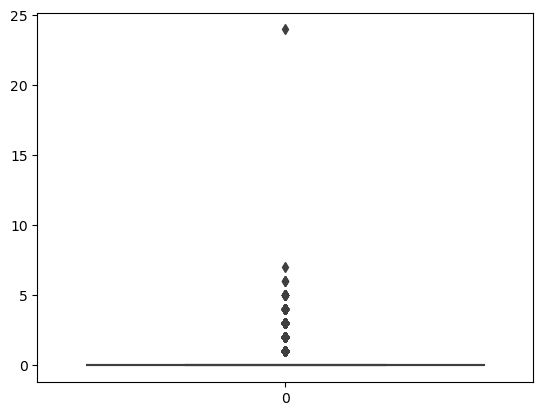

In [ ]:
sns.boxplot(inp0.DEF_60_CNT_SOCIAL_CIRCLE)

0-7 is still in sequence and 24 is way out of the sequence hence will be replacing the value of 24

In [ ]:
inp0.DEF_60_CNT_SOCIAL_CIRCLE=np.where(inp0.DEF_60_CNT_SOCIAL_CIRCLE>inp0.DEF_60_CNT_SOCIAL_CIRCLE.quantile(0.999999),
                             7.00000,inp0.DEF_60_CNT_SOCIAL_CIRCLE )

<Axes: >

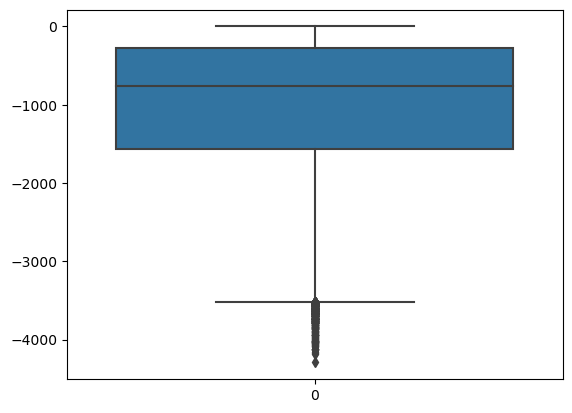

In [ ]:
sns.boxplot(inp0.DAYS_LAST_PHONE_CHANGE)

Missed to convert this days col

In [ ]:
inp0.DAYS_LAST_PHONE_CHANGE=convert_days_to_positive(inp0.DAYS_LAST_PHONE_CHANGE)

In [ ]:
inp0.DAYS_LAST_PHONE_CHANGE

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [ ]:
inp0.DAYS_LAST_PHONE_CHANGE.value_counts()

0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
4051.0        1
3593.0        1
3622.0        1
3570.0        1
3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [ ]:
inp0.DAYS_LAST_PHONE_CHANGE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99,0.9989])

0.2500     274.0000
0.5000     757.0000
0.7500    1570.0000
0.8000    1720.0000
0.9500    2522.0000
0.9600    2606.0000
0.9700    2720.0000
0.9800    2897.0000
0.9900    3149.0000
0.9989    3559.7401
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
#Upper Bound: 3514.0
#Lower Bound: -1670.0

In [ ]:
inp0.DAYS_LAST_PHONE_CHANGE.max()

4292.0

<Axes: >

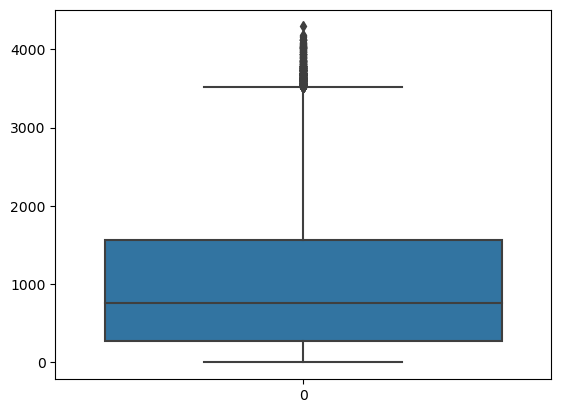

In [ ]:
sns.boxplot(inp0.DAYS_LAST_PHONE_CHANGE)

In [ ]:
inp0.DAYS_LAST_PHONE_CHANGE=np.where(inp0.DAYS_LAST_PHONE_CHANGE>inp0.DAYS_LAST_PHONE_CHANGE.quantile(0.9900),
                             inp0.DAYS_LAST_PHONE_CHANGE.quantile(0.9900),inp0.DAYS_LAST_PHONE_CHANGE )

<Axes: >

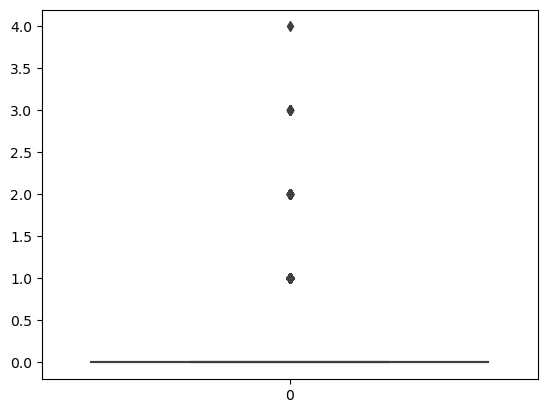

In [ ]:
sns.boxplot(inp0.AMT_REQ_CREDIT_BUREAU_HOUR)

In [ ]:
Q1 = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].quantile(0.25)
Q3 = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].quantile(0.75)
print(Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

0.0
0.0
Upper Bound: 0.0
Lower Bound: 0.0


In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    0.0
0.50    0.0
0.75    0.0
0.80    0.0
0.95    0.0
0.96    0.0
0.97    0.0
0.98    0.0
0.99    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    305885
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    306022
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    298975
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [ ]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     113320
1.0      63405
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
25.0         1
23.0         1
22.0         1
21.0         1
20.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [ ]:
condition1 = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'] > 2.0
condition2 = inp0['AMT_REQ_CREDIT_BUREAU_WEEK'] > 3.0
condition3 = inp0['AMT_REQ_CREDIT_BUREAU_DAY'] > 3.0
condition4 = inp0['AMT_REQ_CREDIT_BUREAU_MON'] > 4.0
condition5 = inp0['AMT_REQ_CREDIT_BUREAU_QRT'] > 3.0
condition6 = inp0['AMT_REQ_CREDIT_BUREAU_YEAR'] > 4.0

In [ ]:
combined_condition = condition1 | condition2 | condition3 | condition4 | condition5 | condition6

In [ ]:
inp0=inp0[~combined_condition]
inp0.shape

(278728, 77)

Here the Analysis of misisng values and outliers is complete and at the end of this exercise we have 278728, 77 shape

## Segment 4:Categorical Unordered Univariate Analysis

In [ ]:
inp0.TARGET.value_counts()

0    256373
1     22355
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Proportion of Categories in TARGET')

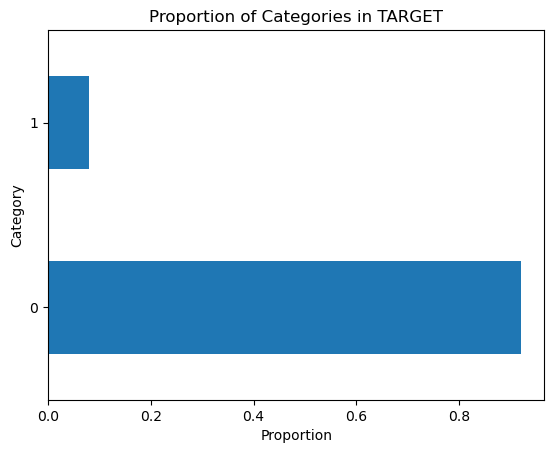

In [ ]:
inp0.TARGET.value_counts(normalize=True).plot.barh()
plt.xlabel('Proportion')
plt.ylabel('Category')
plt.title('Proportion of Categories in TARGET')

In [ ]:
#about 95% of people were rejected during the application being 0.5% positive

Text(0.5, 1.0, 'Loan Type Analysis')

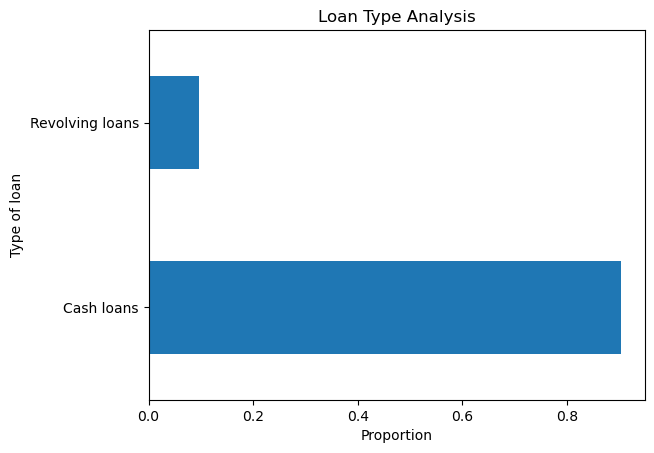

In [ ]:
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.xlabel('Proportion')
plt.ylabel('Type of loan')
plt.title('Loan Type Analysis')

In [ ]:
#About 90% of application was about Cash loans and 10% is revolving loans

Text(0.5, 1.0, 'Client Company')

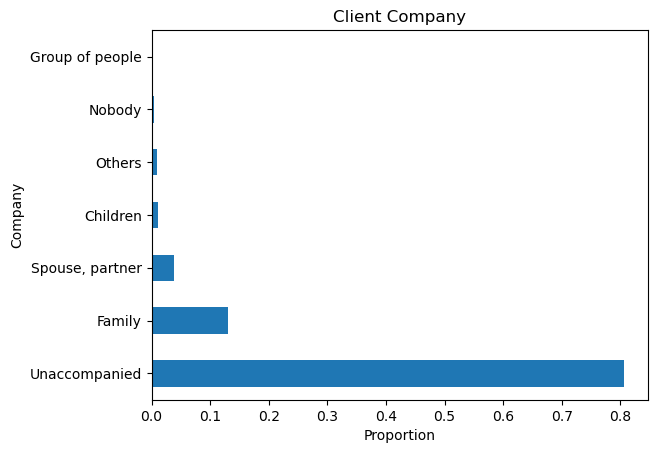

In [ ]:
inp0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.xlabel('Proportion')
plt.ylabel('Company')
plt.title('Client Company')

In [ ]:
#about 80% of client were unaccompanied

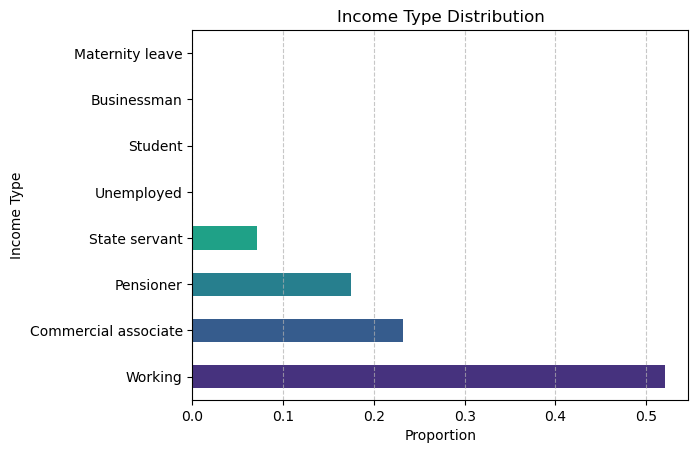

In [ ]:
inp0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette('viridis'))
plt.xlabel('Proportion')
plt.ylabel('Income Type')
plt.title('Income Type Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
#LEarn few more parameters from online research and reading materials


In [ ]:
#About less than 55% of the application was for working clients

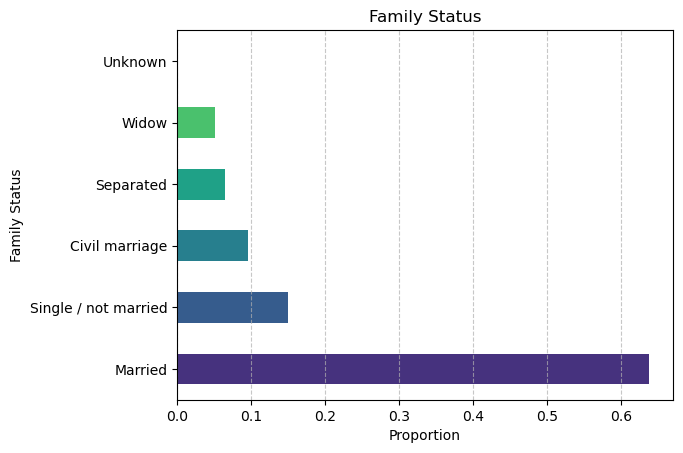

In [ ]:
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh(color=sns.color_palette('viridis'))
plt.xlabel('Proportion')
plt.ylabel('Family Status')
plt.title('Family Status')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
#Learnt few more parameters from online research and reading materials

In [ ]:
#about less than 65% of clients are married

Text(0.5, 1.0, 'Housing Type')

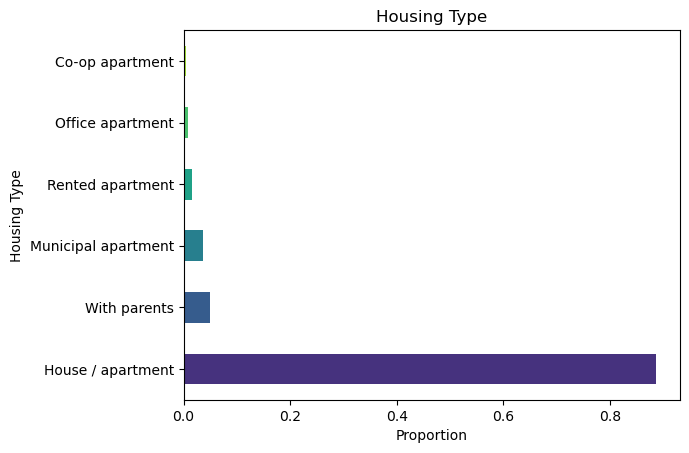

In [ ]:
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette('viridis',))
plt.xlabel('Proportion')
plt.ylabel('Housing Type')
plt.title('Housing Type')

In [ ]:
#About 90% client application are from client who own their own house or apartment

Text(0.5, 1.0, 'Weekday Analysis')

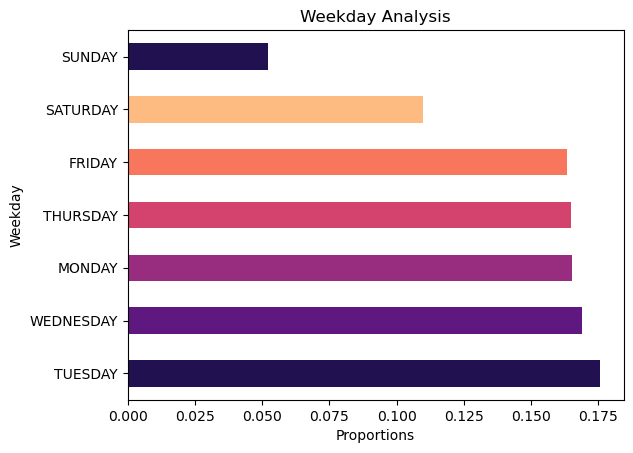

In [ ]:
inp0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh(color=sns.color_palette('magma'))
plt.xlabel('Proportions')
plt.ylabel('Weekday')
plt.title('Weekday Analysis')

In [ ]:
#Tuesday: Has the highest proportion, meaning this day sees the most activity or occurrences compared to other days.
#Sunday: Has the lowest proportion, suggesting that this day sees the least activity or occurrences.

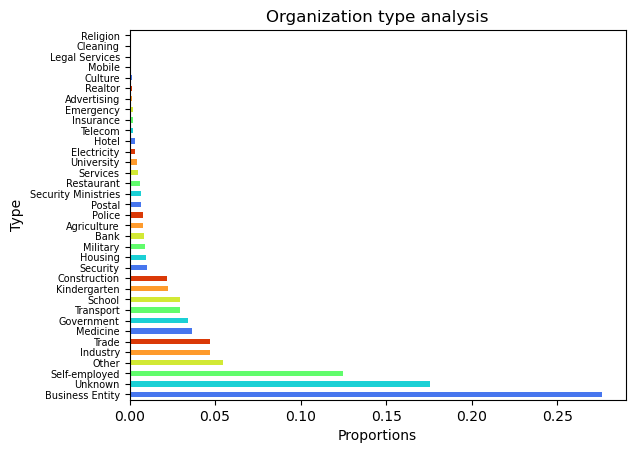

In [ ]:
inp0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(color=sns.color_palette('turbo'))
plt.xlabel('Proportions')
plt.ylabel('Type')
plt.tick_params(axis='y', labelsize=7)
plt.title('Organization type analysis')
plt.show()

In [ ]:
#The Business Entity category has the highest proportion, accounting for over 25% of the total occurrences.
#Many categories such as Religion, Cleaning, Legal Services, Mobile, Culture, and Realtor have very low proportions,
#each accounting for less than 2-3% of the total occurrences.

## Segment 5:Categorical ordered Univariate Analysis

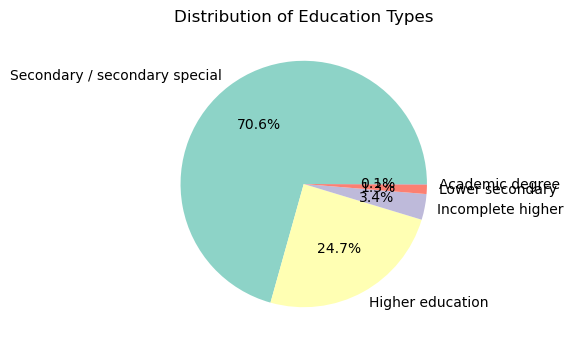

In [ ]:
education_counts = inp0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set3').colors)
plt.title('Distribution of Education Types')
plt.show()

In [ ]:
#About 70.6% application are from client with Secondary qualitifications

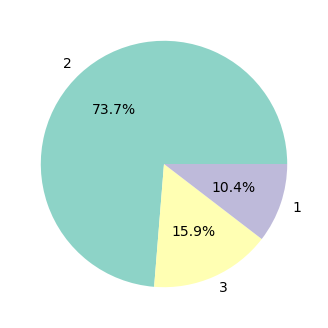

In [ ]:
education_counts = inp0['REGION_RATING_CLIENT'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set3').colors)
plt.show()

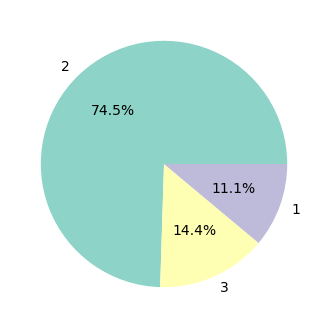

In [ ]:
education_counts = inp0['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set3').colors)
plt.show()

## Segment 6:Numerical continuous Univariate Analysis

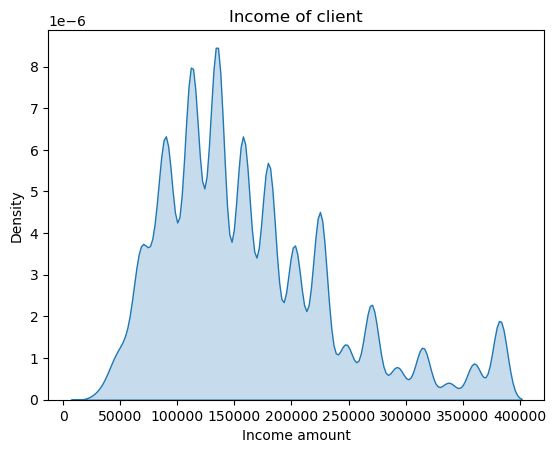

In [ ]:
sns.kdeplot(inp0['AMT_INCOME_TOTAL'], shade=True)
plt.title('Income of client')
plt.xlabel('Income amount')
plt.show()

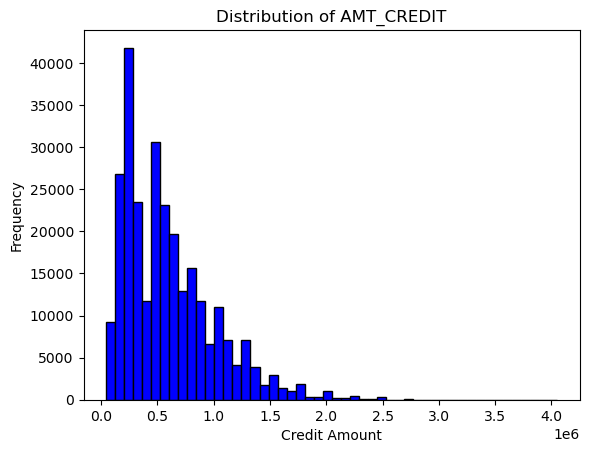

In [ ]:
plt.hist(inp0['AMT_CREDIT'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of AMT_CREDIT')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The histogram shows a right-skewed distribution, meaning that most credit amounts are on the lower end, with fewer instances of higher credit amounts.
#The highest frequency is observed for credit amounts around 0.5 million, where over 40,000 occurrences are recorded.

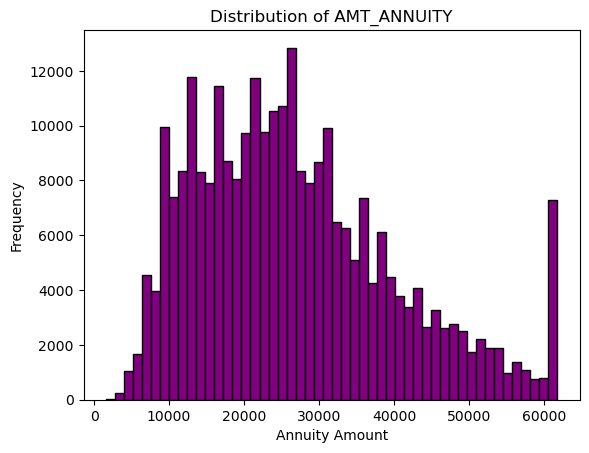

In [ ]:
plt.hist(inp0['AMT_ANNUITY'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#61832.25 seems to be outlier amount but when i checked the logic of Q3+ 1.5 * IQR this amt is within the bounds
#The majority of annuity amounts fall between 10,000 and 40,000, with the peak frequency around 20,000 to 30,000.
#There is a noticeable drop in frequency as the annuity amount increases beyond 40,000, with very few data points
#in the higher ranges.

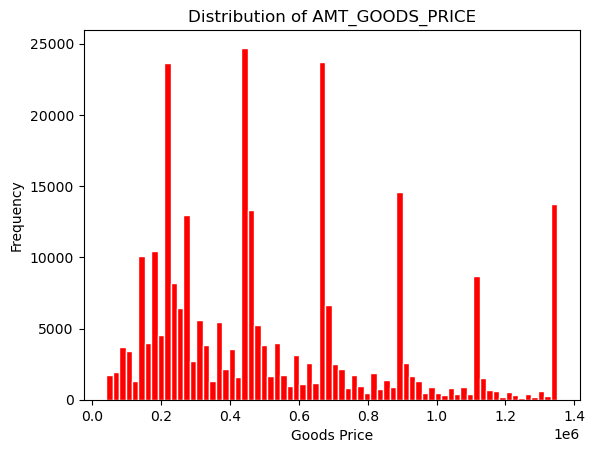

In [ ]:
plt.hist(inp0['AMT_GOODS_PRICE'], bins=70, color='red', edgecolor='white')
plt.title('Distribution of AMT_GOODS_PRICE')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The histogram shows several prominent peaks at specific goods price levels,
#indicating that certain price points are more common than others.
#The distribution has multiple peaks, suggesting that goods prices are not uniformly distributed
#but tend to cluster around certain values.

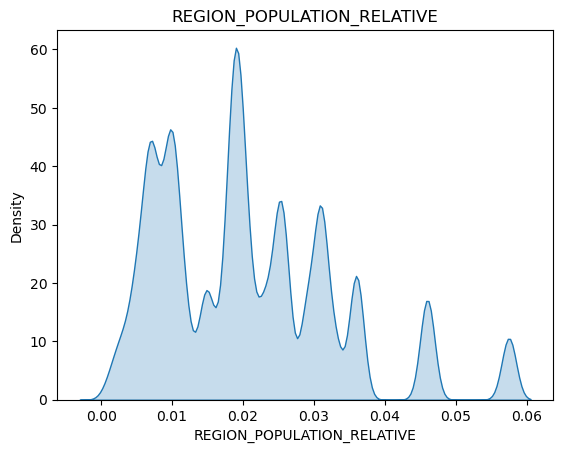

In [ ]:
sns.kdeplot(inp0['REGION_POPULATION_RELATIVE'], shade=True)
plt.title('REGION_POPULATION_RELATIVE')
plt.show()

## Segment 7:Numerical discrete Univariate Analysis

inp0[''].value_counts().plot(kind='bar')
plt.title('Count of contract type Distribution')
plt.xlabel('contract type count')
plt.ylabel('Frequency')
plt.show()

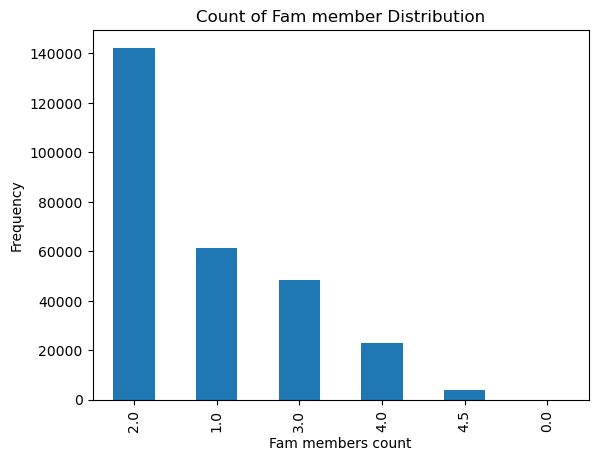

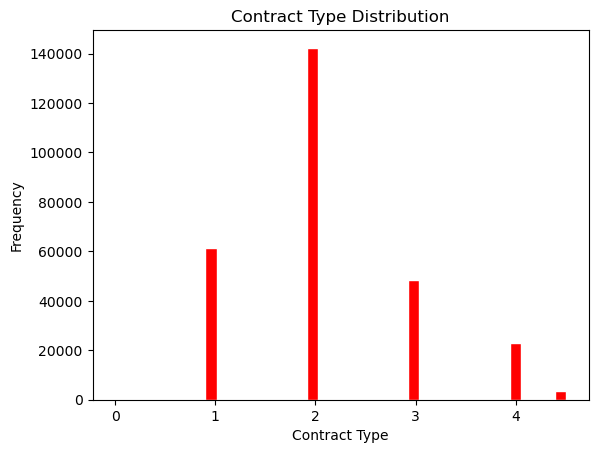

In [ ]:
inp0['CNT_FAM_MEMBERS'].value_counts().plot(kind='bar')
plt.title('Count of Fam member Distribution')
plt.xlabel('Fam members count')
plt.ylabel('Frequency')
plt.show()
plt.hist(inp0['CNT_FAM_MEMBERS'], bins=40, color='red', edgecolor='white')
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The most common family size is 2 members, with the highest frequency, indicating that most clients in the dataset consist of
#two people.
#The next most common is 1 member followed by 3 members.

<Axes: >

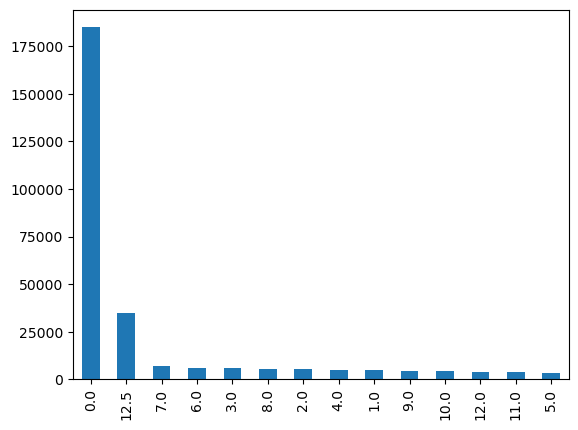

In [ ]:
inp0['OWN_CAR_AGE'].value_counts().plot(kind='bar')

In [ ]:
#Most of the clients do not have a car

## Segment 8 :Numeric - Numeric Bivariate Analysis

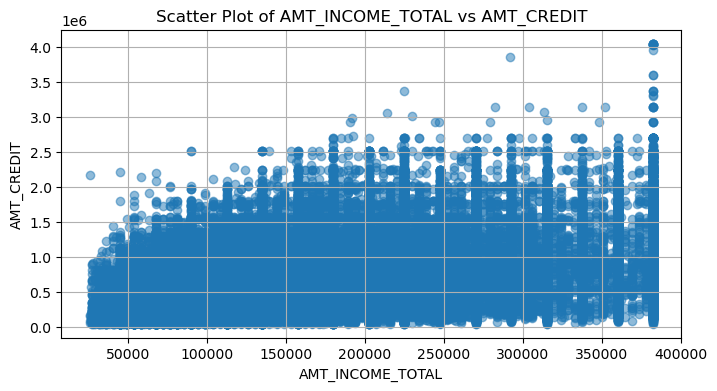

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x=inp0['AMT_INCOME_TOTAL'], y=inp0['AMT_CREDIT'], alpha=0.5)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot of AMT_INCOME_TOTAL vs AMT_CREDIT')
plt.grid(True)
plt.show()

In [ ]:
#There is a visible positive correlation between AMT_INCOME_TOTAL and AMT_CREDIT. As the total income increases, the credit amount tends to increase as well.

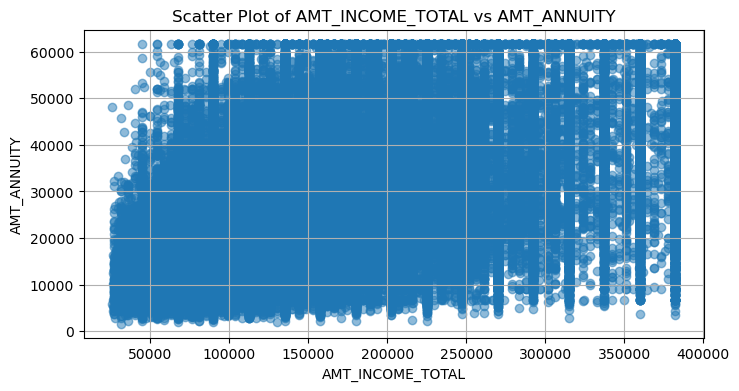

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x=inp0['AMT_INCOME_TOTAL'], y=inp0['AMT_ANNUITY'], alpha=0.5)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_ANNUITY')
plt.title('Scatter Plot of AMT_INCOME_TOTAL vs AMT_ANNUITY')
plt.grid(True)
plt.show()


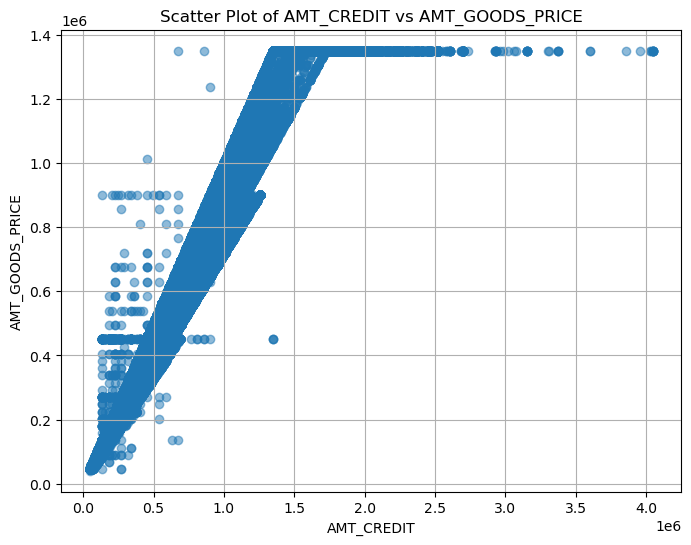

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=inp0['AMT_CREDIT'], y=inp0['AMT_GOODS_PRICE'], alpha=0.5)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Scatter Plot of AMT_CREDIT vs AMT_GOODS_PRICE')
plt.grid(True)
plt.show()

In [ ]:
#There is a very strong positive correlation between AMT_CREDIT and AMT_GOODS_PRICE. As the credit amount increases, the goods price also increases almost proportionately.
#The horizontal line between 1.0-4.0 AMT_CREDIT is because of capping the outliers

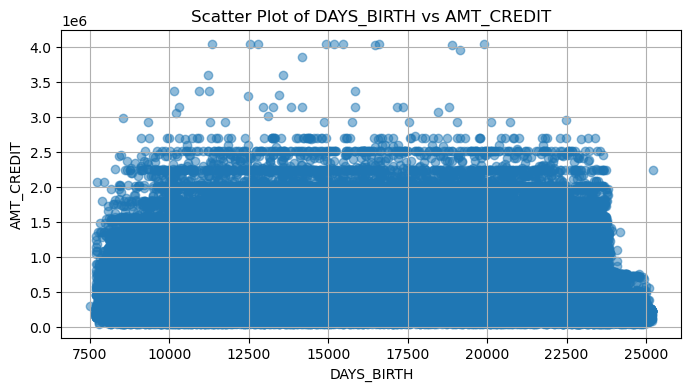

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x=inp0['DAYS_BIRTH'], y=inp0['AMT_CREDIT'], alpha=0.5)
plt.xlabel('DAYS_BIRTH')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot of DAYS_BIRTH vs AMT_CREDIT')
plt.grid(True)
plt.show()

In [ ]:
#The x-axis (DAYS_BIRTH) ranges from about 7,500 to 25,000 days, which corresponds to ages approximately between 20 years old (7,500 days) and 68 years old (25,000 days)
#There does not appear to be a strong correlation between DAYS_BIRTH and AMT_CREDIT. The credit amounts seem to be relatively evenly distributed across different ages, with no clear trend that older or younger individuals receive higher or lower credit amounts.

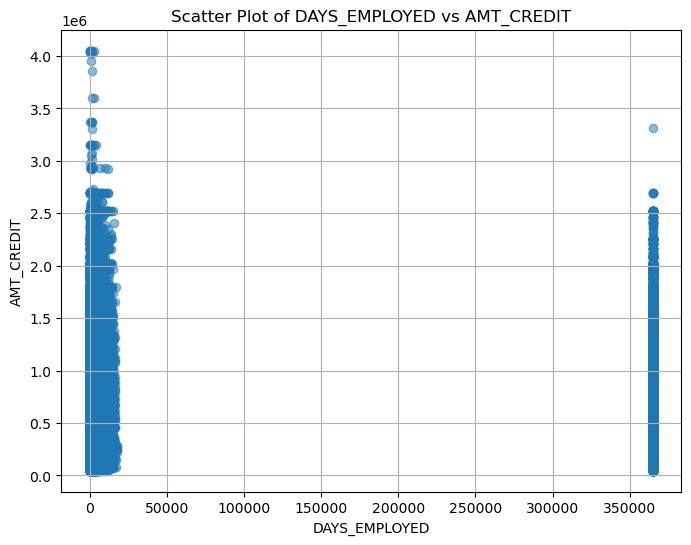

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=inp0['DAYS_EMPLOYED'], y=inp0['AMT_CREDIT'], alpha=0.5)
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot of DAYS_EMPLOYED vs AMT_CREDIT')
plt.grid(True)
plt.show()

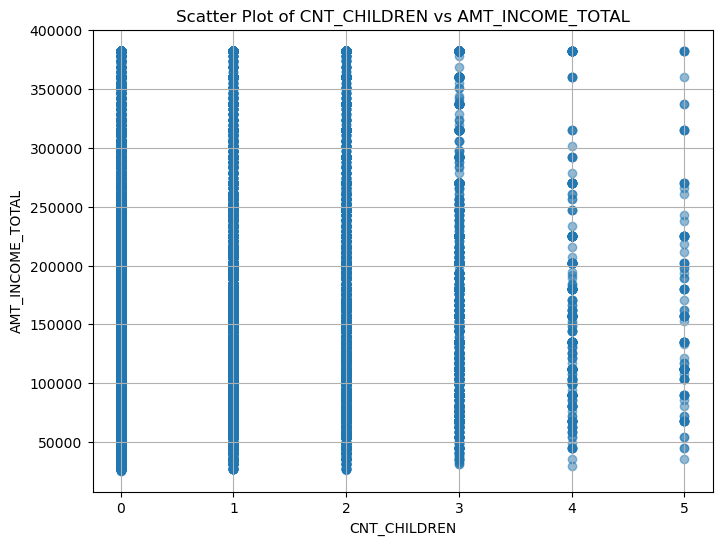

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=inp0['CNT_CHILDREN'], y=inp0['AMT_INCOME_TOTAL'], alpha=0.5)
plt.xlabel('CNT_CHILDREN')
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('Scatter Plot of CNT_CHILDREN vs AMT_INCOME_TOTAL')
plt.grid(True)
plt.show()

In [ ]:
#The plot shows that most clients have between 0 and 2 children, with fewer individuals having 3, 4, or 5 children.

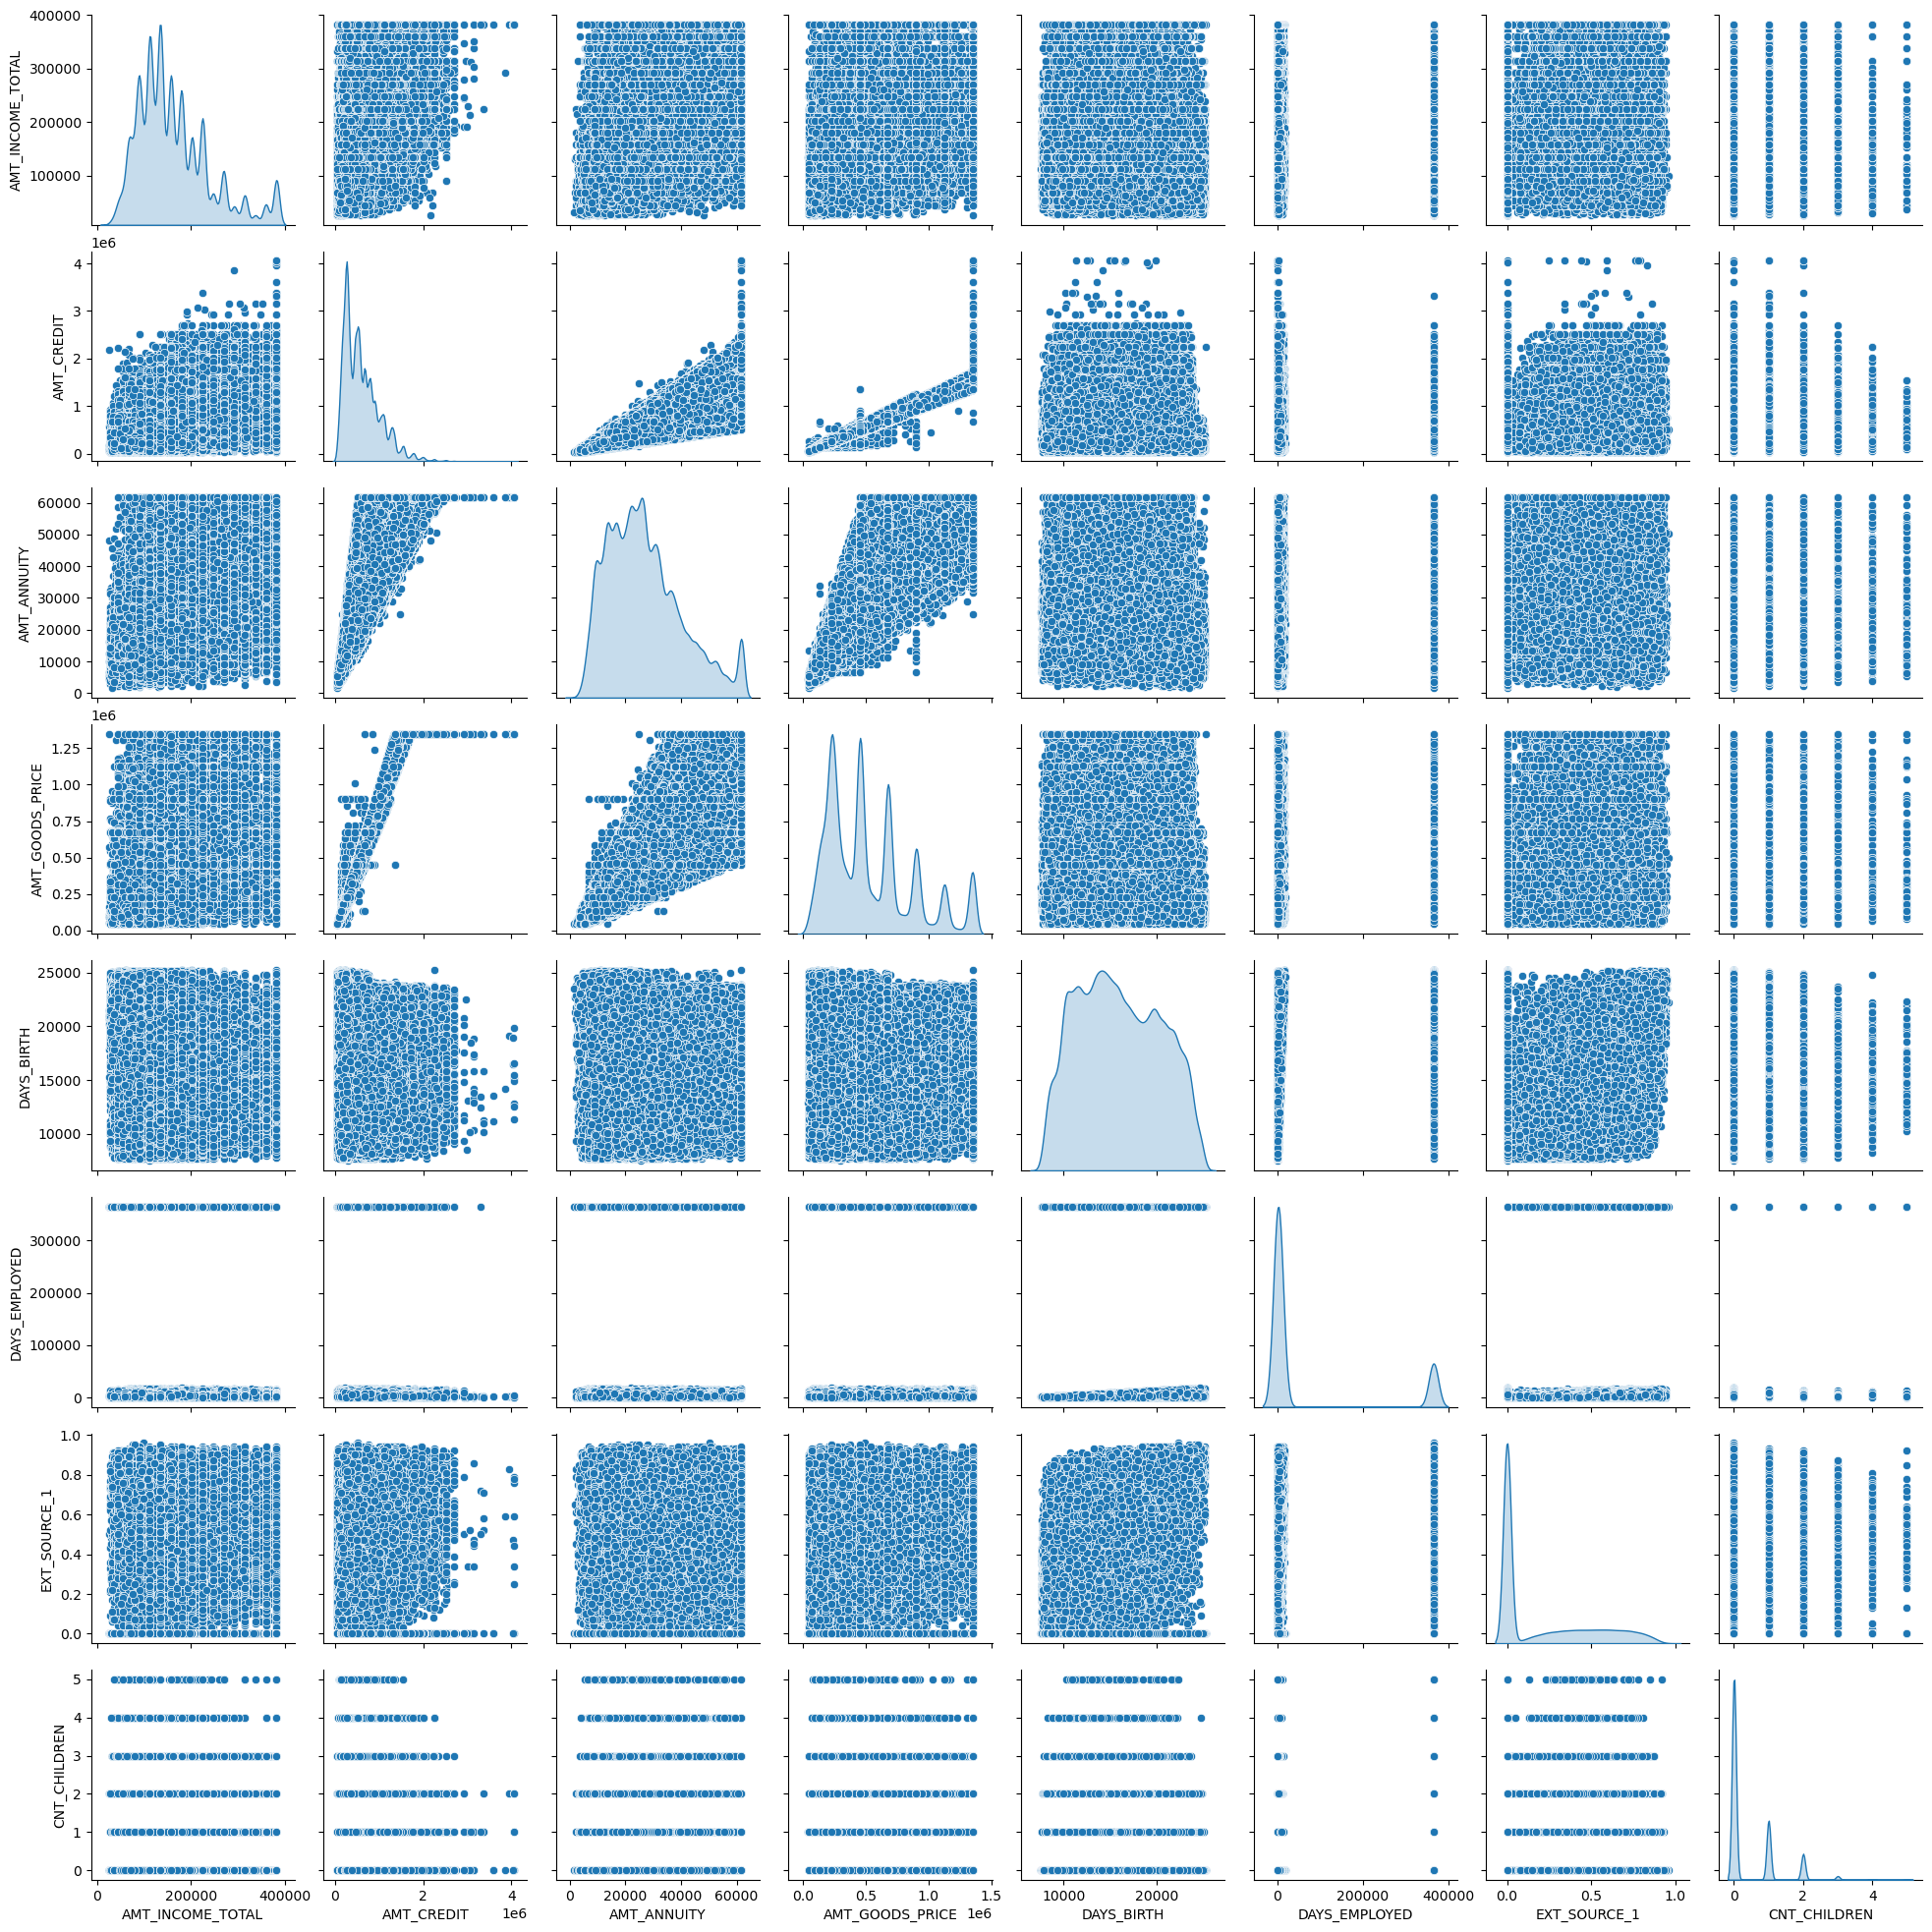

In [ ]:
sns.pairplot(inp0[[
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'EXT_SOURCE_1',
    'CNT_CHILDREN'
]], diag_kind='kde')

plt.show()

In [ ]:
inp0.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

## Segment 9 :Numeric - Categorical Bivariate Analysis


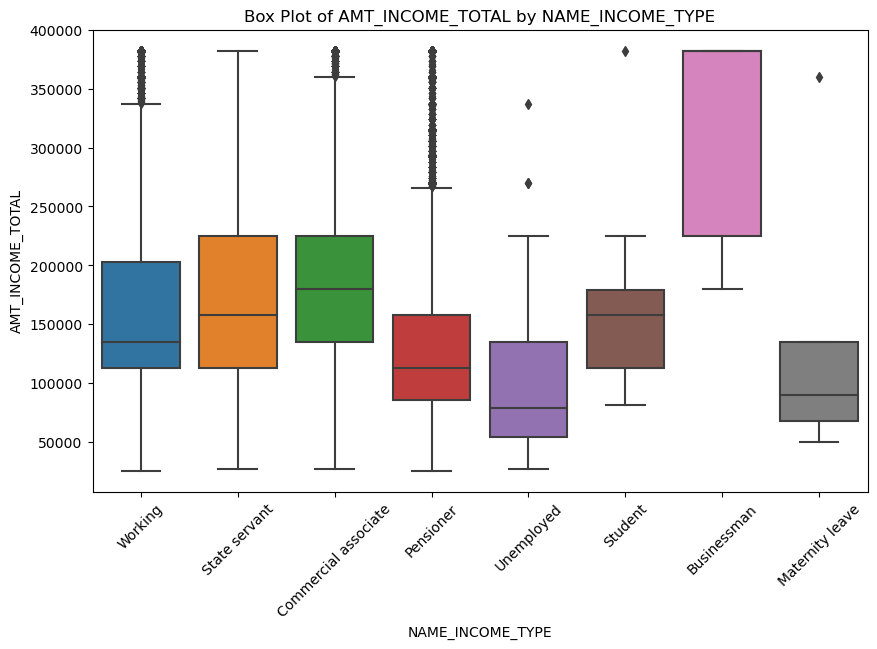

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=inp0)
plt.xticks(rotation=45)
plt.title('Box Plot of AMT_INCOME_TOTAL by NAME_INCOME_TYPE')
plt.show()

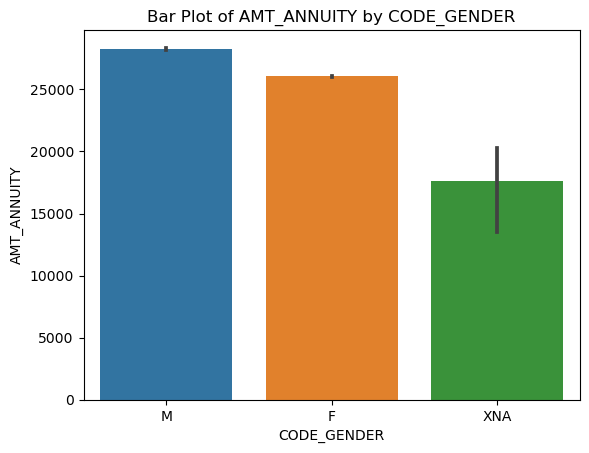

In [ ]:
sns.barplot(x='CODE_GENDER', y='AMT_ANNUITY', data=inp0)
plt.title('Bar Plot of AMT_ANNUITY by CODE_GENDER')
plt.show()

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.059329
REGION_RATING_CLIENT           0.057567
REG_CITY_NOT_WORK_CITY         0.051271
FLAG_EMP_PHONE                 0.045566
FLAG_DOCUMENT_3                0.044205
REG_CITY_NOT_LIVE_CITY         0.043745
DEF_30_CNT_SOCIAL_CIRCLE       0.033610
DEF_60_CNT_SOCIAL_CIRCLE       0.032903
LIVE_CITY_NOT_WORK_CITY        0.032693
FLAG_WORK_PHONE                0.029495
CNT_CHILDREN                   0.018095
OBS_30_CNT_SOCIAL_CIRCLE       0.010533
OBS_60_CNT_SOCIAL_CIRCLE       0.010356
REG_REGION_NOT_WORK_REGION     0.007036
CNT_FAM_MEMBERS                0.006856
REG_REGION_NOT_LIVE_REGION     0.005989
FLAG_DOCUMENT_2                0.005720
FLAG_DOCUMENT_21               0.003473
AMT_REQ_CREDIT_BUREAU_DAY      0.003096
LIVE_REGION_NOT_WORK_REGION    0.002238
FLAG_DOCUMENT_20               0.000745
FLAG_CONT_MOBILE               0.000652
FLAG_MOBIL                     0.000559
AMT_REQ_CREDIT_BUREAU_HOUR     0.000226


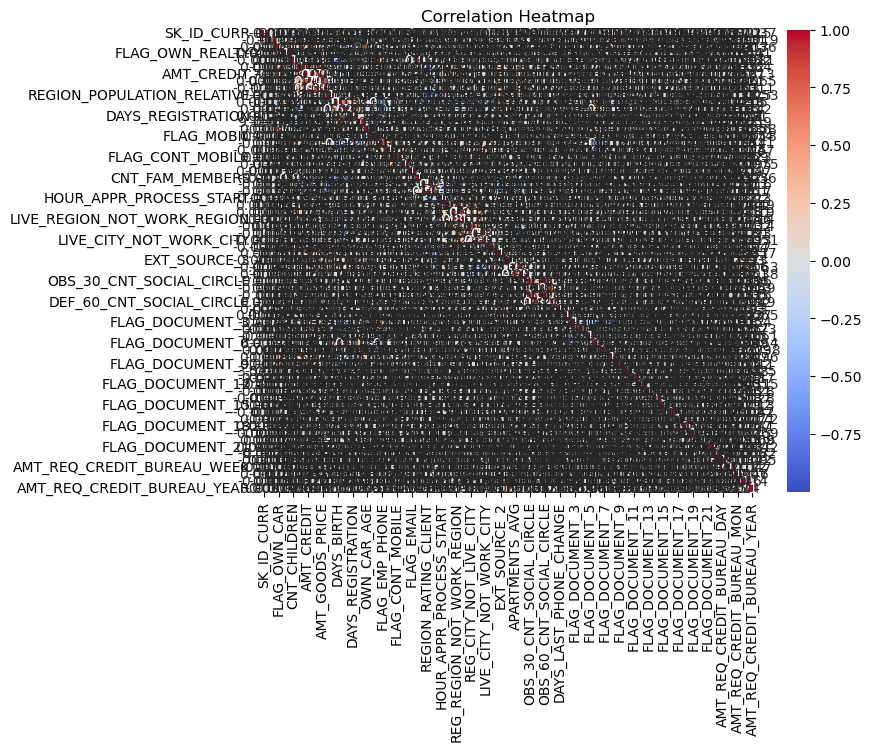

In [ ]:
correlation = inp0.corr()['TARGET'].sort_values(ascending=False)

# Display the top correlations
print(correlation)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(inp0.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

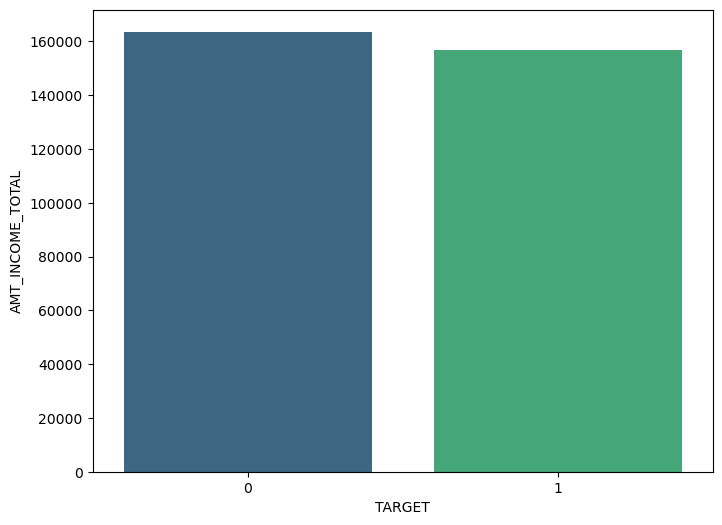

In [ ]:
mean_income_by_target = inp0.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data=mean_income_by_target, palette='viridis')

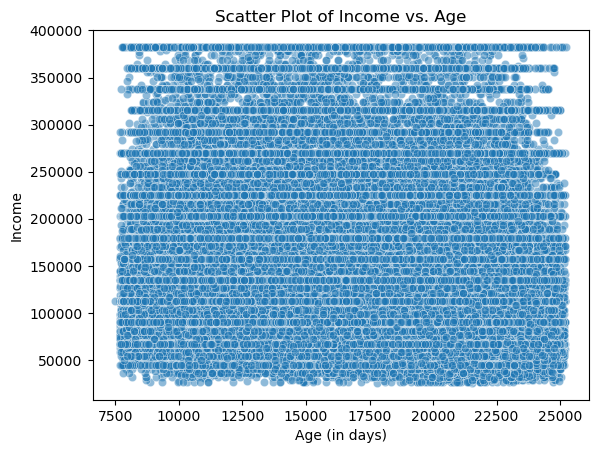

In [ ]:
sns.scatterplot(x='DAYS_BIRTH', y='AMT_INCOME_TOTAL', data=inp0, alpha=0.5)
plt.xlabel('Age (in days)')
plt.ylabel('Income')
plt.title('Scatter Plot of Income vs. Age')
plt.show()

The scatter plot does not show any clear trend or correlation between age (in days) and income. The data points are fairly uniformly distributed across the entire age range, indicating that income does not vary significantly with age in a linear fashion

# Lets Start analysis for the second dataset

In [ ]:
pd.options.display.max_rows = 500
print(inp1.dtypes)

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

Following the same segment sequence in here , not mentioning them again

## Segment 1: Analyzing columns for missing values

In [ ]:
inp1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     49127
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               117866
AMT_GOODS_PRICE                 50634
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              117866
RATE_INTEREST_PRIMARY          226589
RATE_INTEREST_PRIVILEGED       226589
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                110878
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [ ]:
def mean_median(x):
    print(x.mean())

In [ ]:
mean_median(inp1.AMT_ANNUITY)

15635.636359220034


In [ ]:
def missing_percent(x):
    return x.isnull().mean() * 100
missing_percent(inp1.AMT_ANNUITY)

21.604636946932814

In [ ]:
inp1.AMT_ANNUITY=inp1.AMT_ANNUITY.fillna(inp1.AMT_ANNUITY.median())

In [ ]:
mean_median(inp1.AMT_DOWN_PAYMENT)

6627.045104496689


In [ ]:
inp1.AMT_ANNUITY=inp1.AMT_ANNUITY.round(2)
inp1.CNT_PAYMENT=inp1.CNT_PAYMENT.round(2)

In [ ]:
missing_percent(inp1.AMT_DOWN_PAYMENT)

51.83406555228659

more than 51% is missing but it seems it could be that down paid amount was not done

In [ ]:
inp1.AMT_DOWN_PAYMENT=inp1.AMT_DOWN_PAYMENT.fillna(inp1.AMT_DOWN_PAYMENT.median())

In [ ]:
mean_median(inp1.AMT_GOODS_PRICE)

220182.9633208303


In [ ]:
inp1.AMT_GOODS_PRICE=inp1.AMT_GOODS_PRICE.fillna(inp1.AMT_GOODS_PRICE.median())

In [ ]:
mean_median(inp1.RATE_DOWN_PAYMENT)
inp1.RATE_DOWN_PAYMENT=round(inp1.RATE_DOWN_PAYMENT.fillna(inp1.RATE_DOWN_PAYMENT.median()),2)


0.07944884321827393


In [ ]:
mean_median(inp1.RATE_INTEREST_PRIMARY)

0.1916447935775268


In [ ]:
inp1.RATE_INTEREST_PRIMARY=round(inp1.RATE_INTEREST_PRIMARY.fillna(inp1.RATE_INTEREST_PRIMARY.mean()),2)

In [ ]:
mean_median(inp1.RATE_INTEREST_PRIVILEGED)
inp1.RATE_INTEREST_PRIVILEGED=round(inp1.RATE_INTEREST_PRIVILEGED.fillna(inp1.RATE_INTEREST_PRIVILEGED.mean()),2)


0.7792338656221576


In [ ]:
inp1.NAME_TYPE_SUITE= inp1.NAME_TYPE_SUITE.fillna("Nobody")

In [ ]:
inp1.NAME_TYPE_SUITE.mode()

0    Nobody
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
inp1.NAME_TYPE_SUITE.value_counts()

Nobody             110878
Unaccompanied       68649
Family              29851
Spouse, partner      9359
Children             4510
Other_B              2532
Other_A              1286
Group of people       326
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
inp1.CNT_PAYMENT=(inp1.CNT_PAYMENT.fillna(inp1.CNT_PAYMENT.mean()))

In [ ]:
missing_percent(inp1.DAYS_FIRST_DRAWING)

39.07806377561117

In [ ]:
mean_median(inp1.DAYS_FIRST_DRAWING)

343052.82536038867


In [ ]:
inp1.DAYS_FIRST_DRAWING=round(inp1.DAYS_FIRST_DRAWING.fillna(inp1.DAYS_FIRST_DRAWING.mean()),2)

In [ ]:
missing_percent(inp1.DAYS_FIRST_DUE)

39.07806377561117

In [ ]:
mean_median(inp1.DAYS_FIRST_DUE)

13894.510239585363


In [ ]:
inp1.DAYS_FIRST_DUE.value_counts()

 365243.0    5674
-271.0        127
-330.0        120
-329.0        120
-298.0        118
             ... 
-2891.0         9
-2842.0         9
-2890.0         7
-2.0            2
-2892.0         1
Name: DAYS_FIRST_DUE, Length: 2892, dtype: int64

In [ ]:
inp1.DAYS_FIRST_DRAWING=inp1.DAYS_FIRST_DRAWING.fillna(0)

In [ ]:
mean_median(inp1.DAYS_LAST_DUE_1ST_VERSION)

32788.915051504715


In [ ]:
inp1.DAYS_LAST_DUE_1ST_VERSION=inp1.DAYS_LAST_DUE_1ST_VERSION.fillna(0)

In [ ]:


mean_median(inp1.DAYS_LAST_DUE)

76324.67810093048


In [ ]:
inp1.DAYS_LAST_DUE=inp1.DAYS_LAST_DUE.fillna(0)

In [ ]:
mean_median(inp1.DAYS_TERMINATION)

81422.11144076055


In [ ]:
inp1.DAYS_TERMINATION=inp1.DAYS_TERMINATION.fillna(0)

In [ ]:
inp1.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    93292
1.0    45239
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [ ]:
inp1.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

88860

In [ ]:
missing_percent(inp1.NFLAG_INSURED_ON_APPROVAL)

39.07806377561117

deleting the col,since it contributes about 40% missing values also since its a flag column replacing them woundnt be a good idea

In [ ]:
inp1.drop(columns='NFLAG_INSURED_ON_APPROVAL',axis=1, inplace=True)

In [ ]:
inp1.PRODUCT_COMBINATION= inp1.PRODUCT_COMBINATION.fillna(inp1.PRODUCT_COMBINATION.mode)

In [ ]:
missing_percent(inp1.DAYS_FIRST_DUE)

39.07806377561117

In [ ]:
inp1.DAYS_FIRST_DUE=inp1.DAYS_FIRST_DUE.fillna(0)

## Segment 2 : Standardizing the columns

In [ ]:
def col_analysis(inp1):
    for col in inp1.columns:
        print(f"Column: {col}")
        print(f"Data Type: {inp1[col].dtype}")
        print(f"Missing Values: {inp1[col].isnull().sum()}")
        print(f"Unique Values: {inp1[col].nunique()}")
        print("-" * 40)
col_analysis(inp1)

Column: SK_ID_PREV
Data Type: int64
Missing Values: 0
Unique Values: 227391
----------------------------------------
Column: SK_ID_CURR
Data Type: int64
Missing Values: 0
Unique Values: 150047
----------------------------------------
Column: NAME_CONTRACT_TYPE
Data Type: object
Missing Values: 0
Unique Values: 4
----------------------------------------
Column: AMT_ANNUITY
Data Type: float64
Missing Values: 0
Unique Values: 101124
----------------------------------------
Column: AMT_APPLICATION
Data Type: float64
Missing Values: 0
Unique Values: 35298
----------------------------------------
Column: AMT_CREDIT
Data Type: float64
Missing Values: 0
Unique Values: 43261
----------------------------------------
Column: AMT_DOWN_PAYMENT
Data Type: float64
Missing Values: 0
Unique Values: 9821
----------------------------------------
Column: AMT_GOODS_PRICE
Data Type: float64
Missing Values: 0
Unique Values: 35298
----------------------------------------
Column: WEEKDAY_APPR_PROCESS_START
Dat

In [ ]:
inp1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Consumer loans     45.524669
Cash loans         43.021931
Revolving loans    11.434050
XNA                 0.019350
Name: NAME_CONTRACT_TYPE, dtype: float64

deleting rows with XNA

In [ ]:
inp1=inp1[inp1.NAME_CONTRACT_TYPE!='XNA']

In [ ]:
inp1.DAYS_DECISION.value_counts()

-231     331
-238     329
-211     328
-210     325
-239     324
        ... 
-2171     17
-2834     17
-2902     17
-2893     17
-2084     15
Name: DAYS_DECISION, Length: 2921, dtype: int64

In [ ]:
def flag_conversion(column):
    return column.map({0: "No", 1: "Yes"})


In [ ]:
inp1.FLAG_LAST_APPL_PER_CONTRACT=flag_conversion(inp1.FLAG_LAST_APPL_PER_CONTRACT)

In [ ]:
inp1.CODE_REJECT_REASON= inp1.CODE_REJECT_REASON.apply(lambda x: "SCORE" if x in ["SCO","SCOFR"] else x)
inp1.CODE_REJECT_REASON= inp1.CODE_REJECT_REASON.apply(lambda x: "UNKNOWN" if x in ["XNA","XAP"] else x)

In [ ]:
def convert_days_to_positive(column):
    return column.abs()  # Convert all values to their absolute value

inp1.DAYS_DECISION=convert_days_to_positive(inp1.DAYS_DECISION)

In [ ]:
inp1.NAME_TYPE_SUITE= inp1.NAME_TYPE_SUITE.apply(lambda x: "Other" if x in ["Other_A","Other_B"] else x)

In [ ]:
inp1.drop(columns='NAME_CLIENT_TYPE',axis=1, inplace=True)

In [ ]:
inp1.AMT_GOODS_PRICE=inp1.AMT_GOODS_PRICE.round(2)

In [ ]:
inp1.CNT_PAYMENT=round(inp1.CNT_PAYMENT,2)

In [ ]:
inp1.NAME_YIELD_GROUP= inp1.NAME_YIELD_GROUP.apply(lambda x: "low_normal_action" if x in ["low_normal","low_action"] else x)


In [ ]:
inp1.DAYS_FIRST_DRAWING=round(inp1.DAYS_FIRST_DRAWING,0)

In [ ]:
inp1.DAYS_FIRST_DRAWING = inp1.DAYS_FIRST_DRAWING.apply(lambda x: 0 if x in [365243.0, 343052.83, 343053.0] else x)

In [ ]:
inp1.DAYS_FIRST_DRAWING.value_counts()

 0.0       218954
-202.0         27
-212.0         24
-291.0         21
-217.0         21
            ...  
-2186.0         1
-2858.0         1
-2053.0         1
-2162.0         1
-84.0           1
Name: DAYS_FIRST_DRAWING, Length: 2219, dtype: int64

In [ ]:
inp1.DAYS_FIRST_DRAWING=convert_days_to_positive(inp1.DAYS_FIRST_DRAWING)

In [ ]:
inp1.DAYS_FIRST_DRAWING = inp1.DAYS_FIRST_DRAWING.apply(lambda x: 0 if x in [365243.0, 343052.83, 343053.0] else x)

In [ ]:
inp1.DAYS_FIRST_DUE.value_counts()

 0.0         88816
 365243.0     5674
-271.0         127
-329.0         120
-330.0         120
             ...  
-2891.0          9
-2842.0          9
-2890.0          7
-2.0             2
-2892.0          1
Name: DAYS_FIRST_DUE, Length: 2893, dtype: int64

In [ ]:
inp1.DAYS_FIRST_DUE = inp1.DAYS_FIRST_DUE.apply(lambda x: 0 if x in [365243.0] else x)

In [ ]:

inp1.DAYS_FIRST_DUE=convert_days_to_positive(inp1.DAYS_FIRST_DUE)

In [ ]:

inp1.DAYS_FIRST_DUE.value_counts()

0.0       94490
271.0       127
330.0       120
329.0       120
298.0       118
          ...  
2891.0        9
2842.0        9
2890.0        7
2.0           2
2892.0        1
Name: DAYS_FIRST_DUE, Length: 2892, dtype: int64

In [ ]:
inp1.DAYS_LAST_DUE_1ST_VERSION=convert_days_to_positive(inp1.DAYS_LAST_DUE_1ST_VERSION)
inp1.DAYS_LAST_DUE=convert_days_to_positive(inp1.DAYS_LAST_DUE)
inp1.DAYS_TERMINATION=convert_days_to_positive(inp1.DAYS_TERMINATION)
inp1.DAYS_LAST_DUE_1ST_VERSION = round(inp1.DAYS_LAST_DUE_1ST_VERSION.apply(lambda x: 0 if x in [365243.0] else x),0)
inp1.DAYS_FIRST_DUE = round(inp1.DAYS_FIRST_DUE.apply(lambda x: 0 if x in [365243.0] else x),0)
inp1.DAYS_TERMINATION = round(inp1.DAYS_TERMINATION.apply(lambda x: 0 if x in [365243.0] else x),0)
inp1.DAYS_LAST_DUE = round(inp1.DAYS_LAST_DUE.apply(lambda x: 0 if x in [365243.0] else x),0)

In [ ]:
col_analysis(inp1)

Column: SK_ID_PREV
Data Type: int64
Missing Values: 0
Unique Values: 227347
----------------------------------------
Column: SK_ID_CURR
Data Type: int64
Missing Values: 0
Unique Values: 150033
----------------------------------------
Column: NAME_CONTRACT_TYPE
Data Type: object
Missing Values: 0
Unique Values: 3
----------------------------------------
Column: AMT_ANNUITY
Data Type: float64
Missing Values: 0
Unique Values: 101124
----------------------------------------
Column: AMT_APPLICATION
Data Type: float64
Missing Values: 0
Unique Values: 35298
----------------------------------------
Column: AMT_CREDIT
Data Type: float64
Missing Values: 0
Unique Values: 43261
----------------------------------------
Column: AMT_DOWN_PAYMENT
Data Type: float64
Missing Values: 0
Unique Values: 9821
----------------------------------------
Column: AMT_GOODS_PRICE
Data Type: float64
Missing Values: 0
Unique Values: 35298
----------------------------------------
Column: WEEKDAY_APPR_PROCESS_START
Dat

## Segment 3: Analysing the outliers  


I had code here to fix the outliers but after joining the outliers vlaues chnaged and hence i shifted the codes from here to section after joining
This issue is not with inp0 file since we applied the left join and rows were chnaged but inp1 was changed to have 0 or unknown in the columns

In [ ]:
def handling_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return(upper_bound,lower_bound)


## Segment 4:Categorical Unordered Univariate Analysis

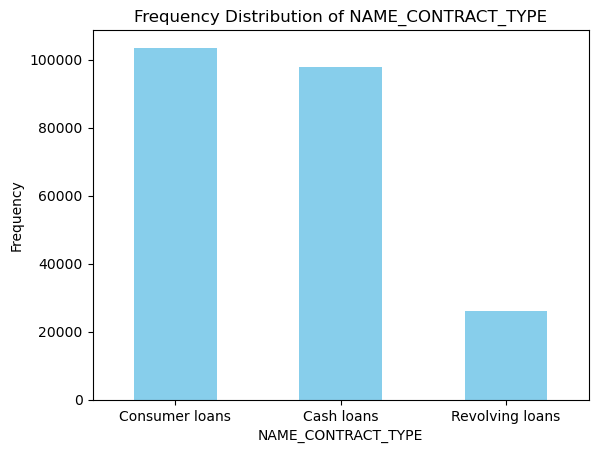

In [ ]:
categorical_var = 'NAME_CONTRACT_TYPE'

inp1[categorical_var].value_counts().plot(kind='bar', color='skyblue')
plt.title(f"Frequency Distribution of {categorical_var}")
plt.xlabel(categorical_var)
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In the analysis of the NAME_CONTRACT_TYPE variable:

Consumer loans are the most frequent type, comprising the largest portion of the dataset with 41,955 instances. Cash loans are also significant, with 37,426 instances, closely following consumer loans. Revolving loans are the least common, with 10,222 instances

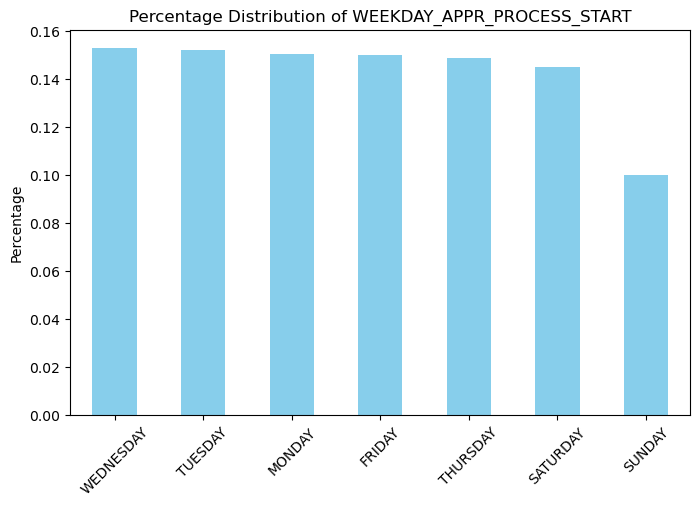

In [ ]:
plt.figure(figsize=(8, 5))
inp1['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of WEEKDAY_APPR_PROCESS_START')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The distribution shows that application processing is fairly consistent from Monday to Saturday, with a noticeable drop on Sunday, indicating lower activity on that day.

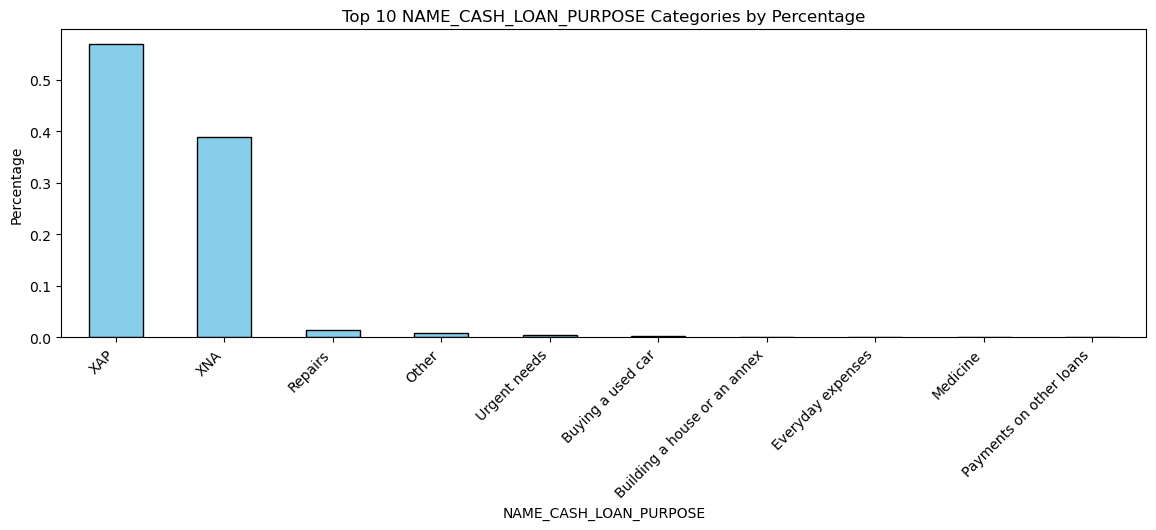

In [ ]:
plt.figure(figsize=(14, 4))
inp1['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 NAME_CASH_LOAN_PURPOSE Categories by Percentage')
plt.xlabel('NAME_CASH_LOAN_PURPOSE')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()


the bar plot shows the top 10 purposes for cash loans, with two categories, XAP and XNA, overwhelmingly dominating the distribution:

XAP accounts for nearly 60% of the loan purposes, making it the most common by far. XNA follows, covering around 40% of the loan purposes. The remaining categories, such as Repairs, Other, and Urgent needs, each account for only a tiny fraction of the total loan purposes

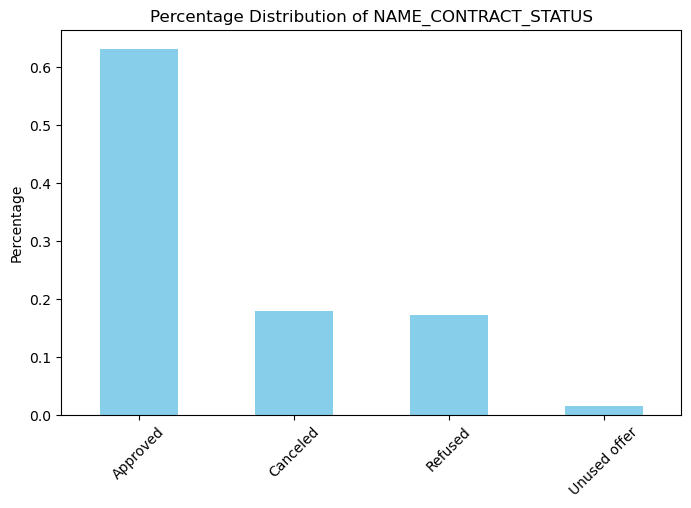

In [ ]:
plt.figure(figsize=(8, 5))
inp1['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_CONTRACT_STATUS')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


The plot shows that the majority of contracts are Approved (over 60%), followed by Canceled and Refused statuses. Unused offers make up the smallest portion. This indicates that most applications successfully move to the approval stage, while fewer are either canceled or refused, and only a minimal number remain unused.

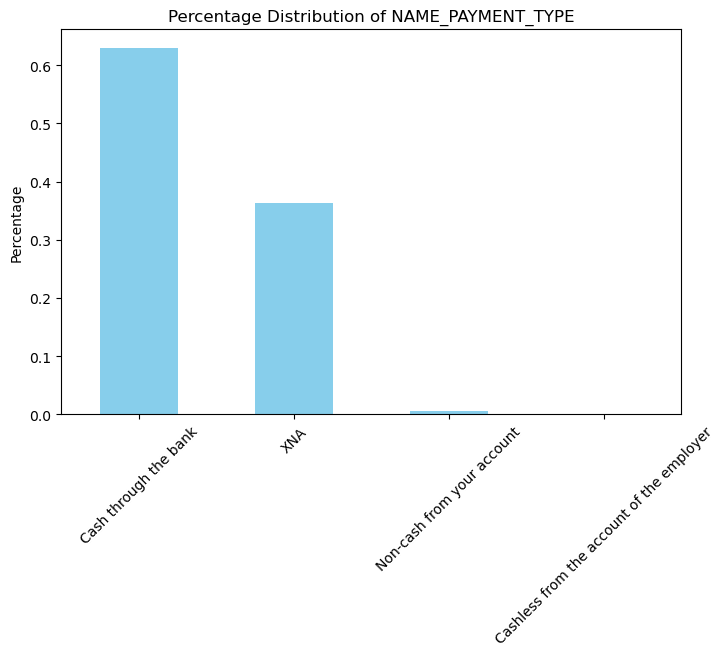

In [ ]:
plt.figure(figsize=(8, 5))
inp1['NAME_PAYMENT_TYPE'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_PAYMENT_TYPE')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


The plot shows that the majority of payments are made Cash through the bank (over 60%), followed by the XNA category, which accounts for about a third of the payments. Non-cash payments from your account and Cashless from the employer’s account are rare, making up a very small percentage. This indicates a strong preference for cash transactions through banks, with other payment types being significantly less common.

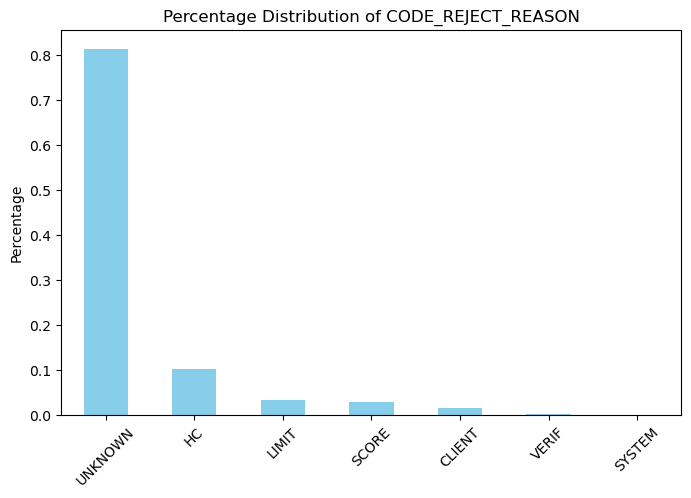

In [ ]:
plt.figure(figsize=(8, 5))
inp1['CODE_REJECT_REASON'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of CODE_REJECT_REASON')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


The plot shows that the majority of rejections are categorized as UNKNOWN (over 80%), indicating that the reason for rejection is not specified in most cases. HC (about 10%) is the next most common rejection reason, followed by other reasons like LIMIT, SCORE, CLIENT, VERIF, and SYSTEM, each contributing minimally. This suggests that the primary issue is the lack of clear reasons provided for rejections.

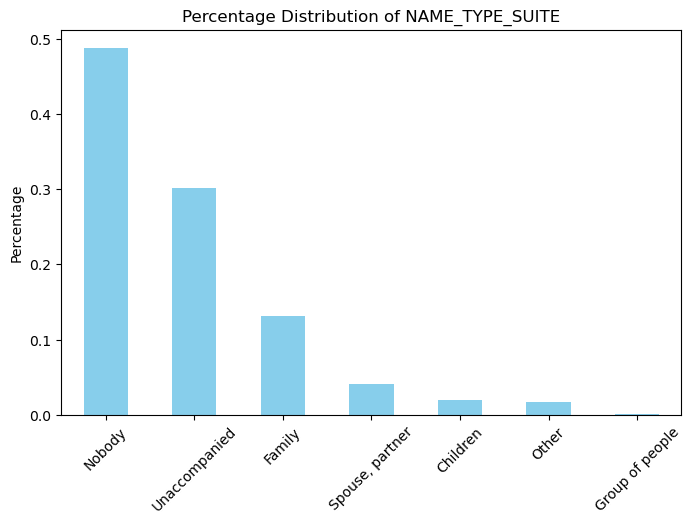

In [ ]:
plt.figure(figsize=(8, 5))
inp1['NAME_TYPE_SUITE'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_TYPE_SUITE')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


The plot shows that nearly half of the applicants are categorized under Nobody for NAME_TYPE_SUITE, indicating they applied alone. Unaccompanied follows, accounting for around a third of the cases. Family is the next most common, with smaller percentages for categories like Spouse, partner, Children, Other, and Group of people. This suggests that most applicants either apply alone or unaccompanied, with family involvement being less common.

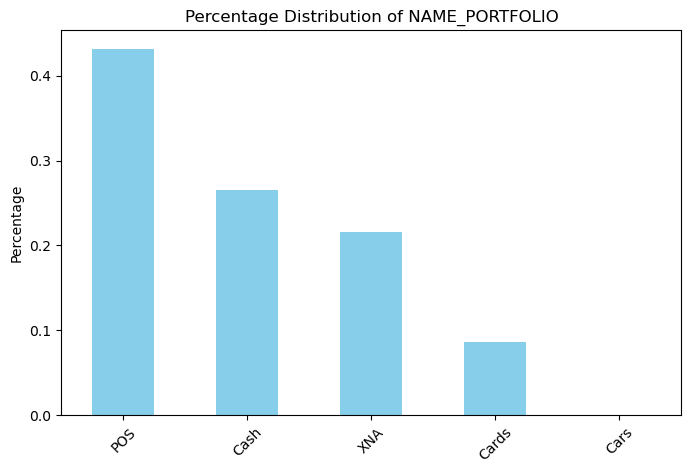

In [ ]:
plt.figure(figsize=(8, 5))
inp1['NAME_PORTFOLIO'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_PORTFOLIO')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The plot shows that POS is the most common portfolio type, accounting for over 40% of the distribution. Cash follows with a significant portion, while XNA and Cards have smaller shares. Cars make up the smallest portion of the portfolio types. This indicates that POS and Cash portfolios dominate, while other types like Cards and Cars are less frequently represented.

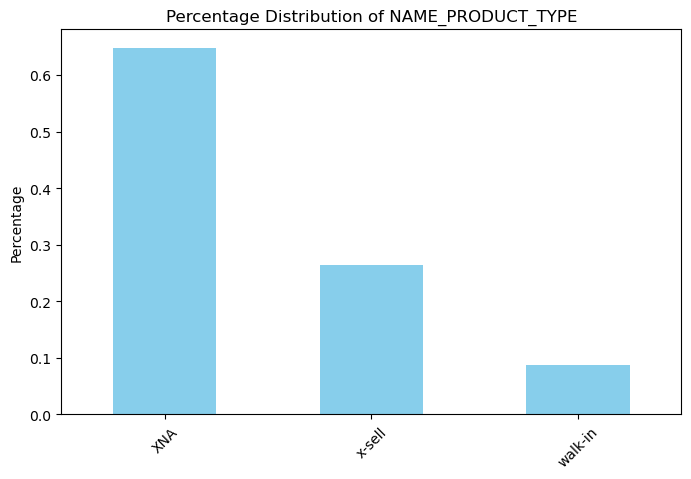

In [ ]:
plt.figure(figsize=(8, 5))
inp1['NAME_PRODUCT_TYPE'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_PRODUCT_TYPE')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The plot shows that **XNA** is the most common product type, accounting for over 60% of the distribution. **X-sell** follows with a significant portion, while **Walk-in** represents the smallest share. This indicates that the XNA product type dominates, with X-sell being somewhat common, and Walk-in is the least utilized product type in the dataset.

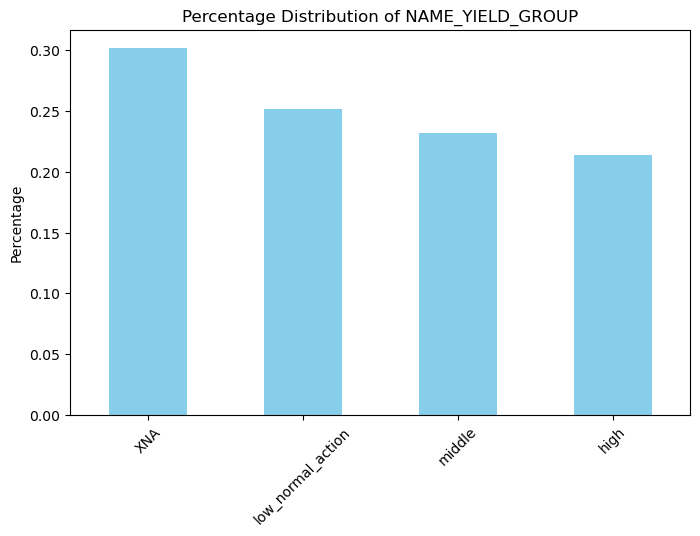

In [ ]:
plt.figure(figsize=(8, 5))
inp1['NAME_YIELD_GROUP'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_YIELD_GROUP')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

## Segment 5:Categorical ordered Univariate Analysis

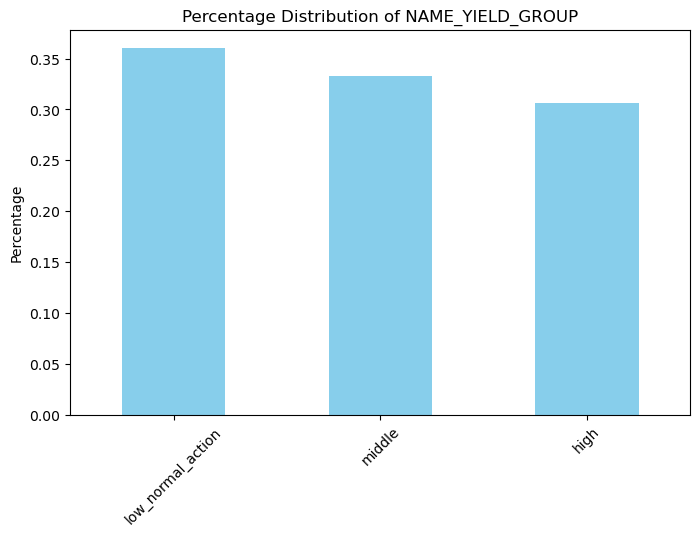

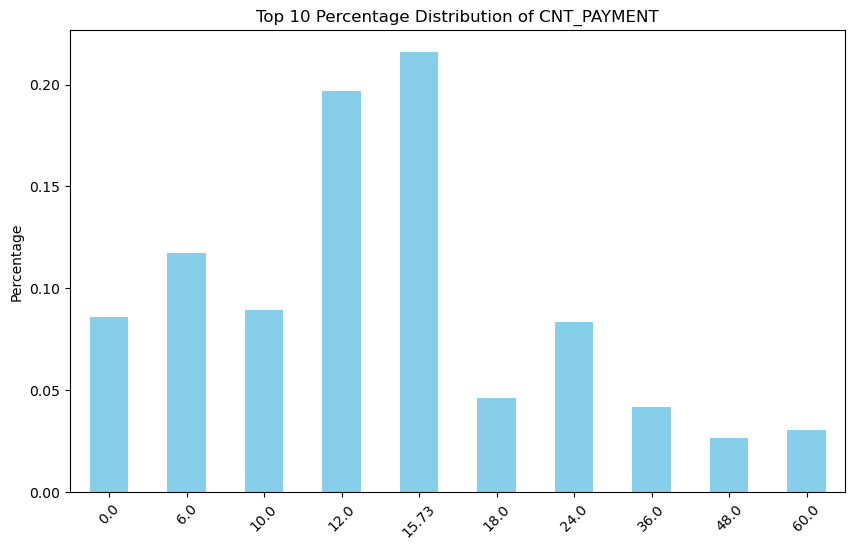

In [ ]:
inp1['NAME_YIELD_GROUP'] = pd.Categorical(inp1['NAME_YIELD_GROUP'], categories=['low_normal_action', 'middle', 'high'], ordered=True)

plt.figure(figsize=(8, 5))
inp1['NAME_YIELD_GROUP'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of NAME_YIELD_GROUP')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
top_10 = inp1['CNT_PAYMENT'].value_counts(normalize=True).head(10)
top_10.sort_index().plot(kind='bar', color='skyblue')

plt.title('Top 10 Percentage Distribution of CNT_PAYMENT')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


Percentage Distribution of NAME_YIELD_GROUP:

The NAME_YIELD_GROUP distribution is fairly balanced among the three categories: low_normal_action, middle, and high. The low_normal_action group has the highest percentage, followed closely by middle and high, indicating that these groups are nearly equally represented in the dataset.
Top 10 Percentage Distribution of CNT_PAYMENT:

The CNT_PAYMENT values show a more varied distribution. The most common payment count is 12.0, followed by 16.05 and 24.0. These values represent the most frequent payment terms, indicating that these are standard payment intervals within the dataset. Other values like 0.0, 6.0, and 10.0 are less frequent but still notable.


##Segment 6:Numerical continuous Univariate Analysis

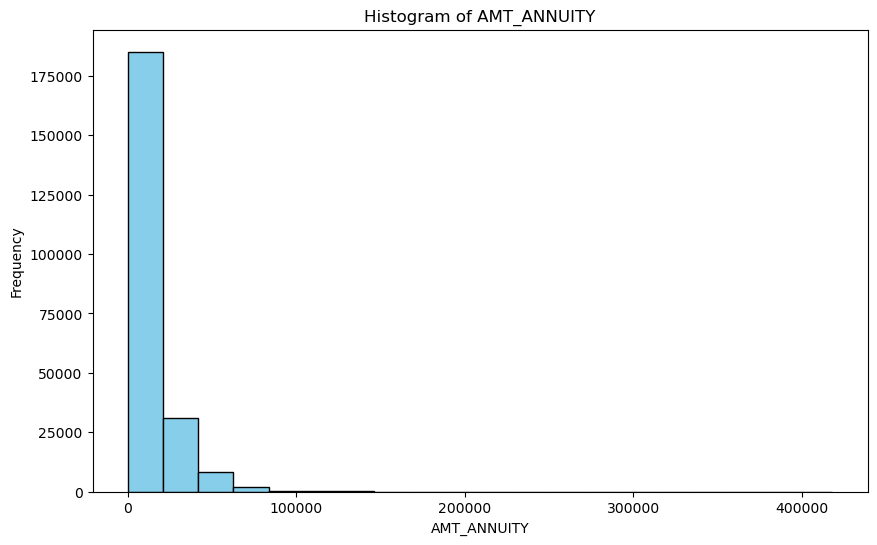

In [ ]:
plt.figure(figsize=(10, 6))
inp1['AMT_ANNUITY'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Right-Skewed Distribution: The AMT_ANNUITY values are heavily right-skewed, indicating that most annuities are relatively small, with only a few very large annuities.
High Concentration at Low Values: The majority of the annuity amounts are clustered below a certain threshold, suggesting that lower annuity amounts are much more common in the dataset.
Outliers: There are some significant outliers with much higher annuity amounts, but these are rare compared to the overall distribution.

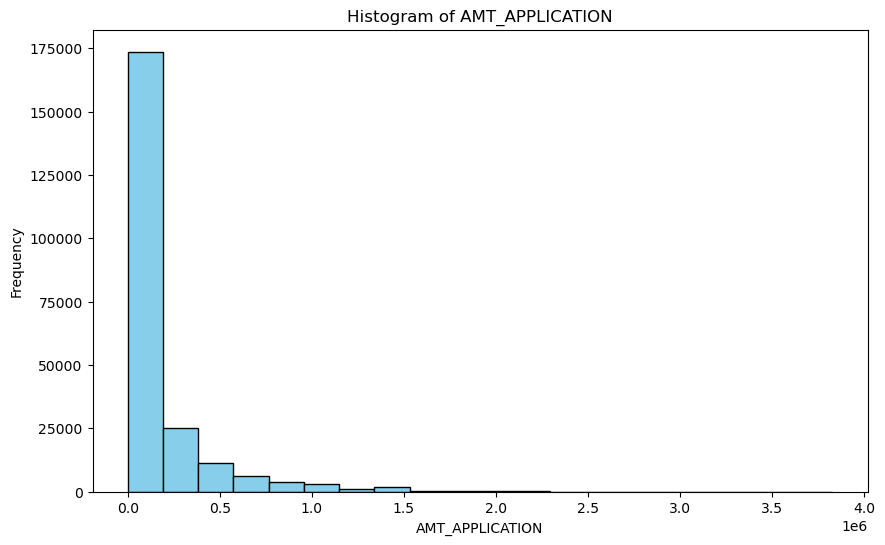

In [ ]:
plt.figure(figsize=(10, 6))
inp1['AMT_APPLICATION'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

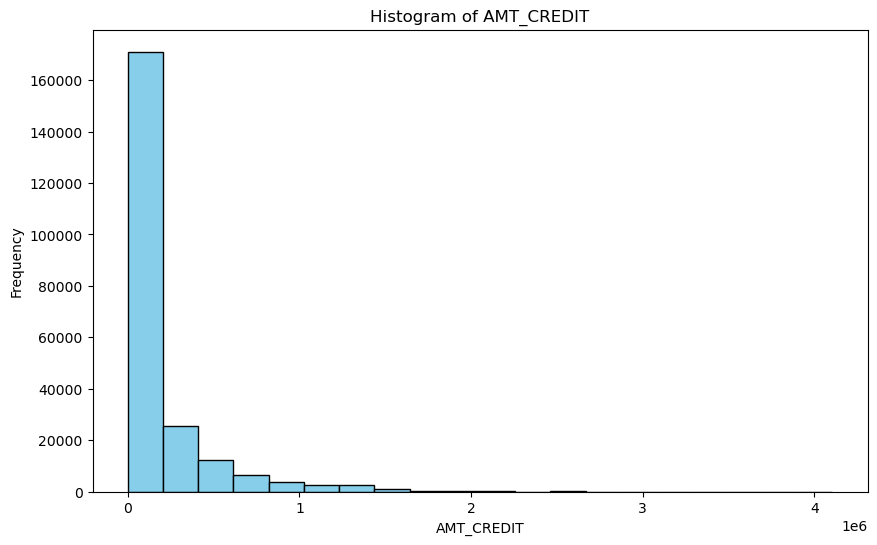

In [ ]:
plt.figure(figsize=(10, 6))
inp1['AMT_CREDIT'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Right-Skewed Distribution: The vast majority of credit amounts are clustered at the lower end, with a few much larger amounts extending far to the right. This indicates that most credit amounts are relatively small, with fewer instances of large credit amounts.
High Frequency of Low Credit Amounts: The histogram shows a very high concentration of credit amounts below a certain threshold, suggesting that smaller credit amounts are far more common in the dataset.

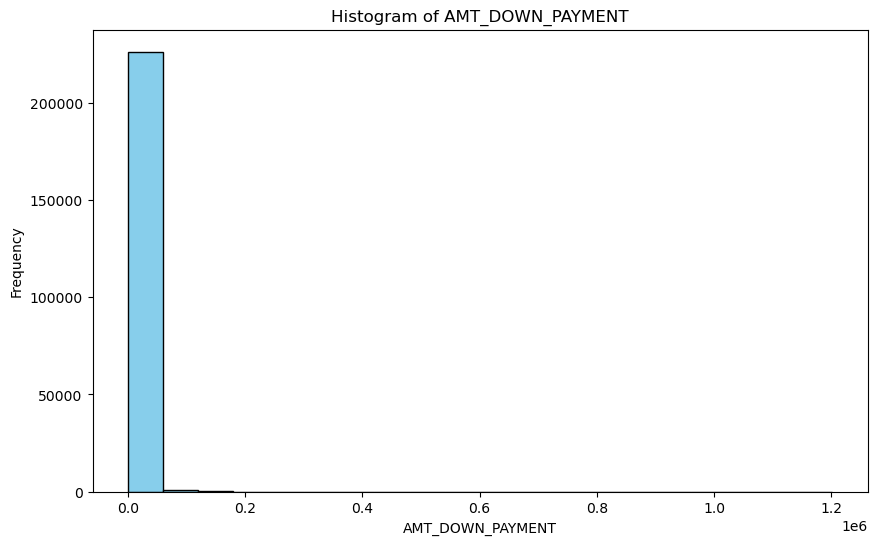

In [ ]:
plt.figure(figsize=(10, 6))
inp1['AMT_DOWN_PAYMENT'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of AMT_DOWN_PAYMENT')
plt.xlabel('AMT_DOWN_PAYMENT')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


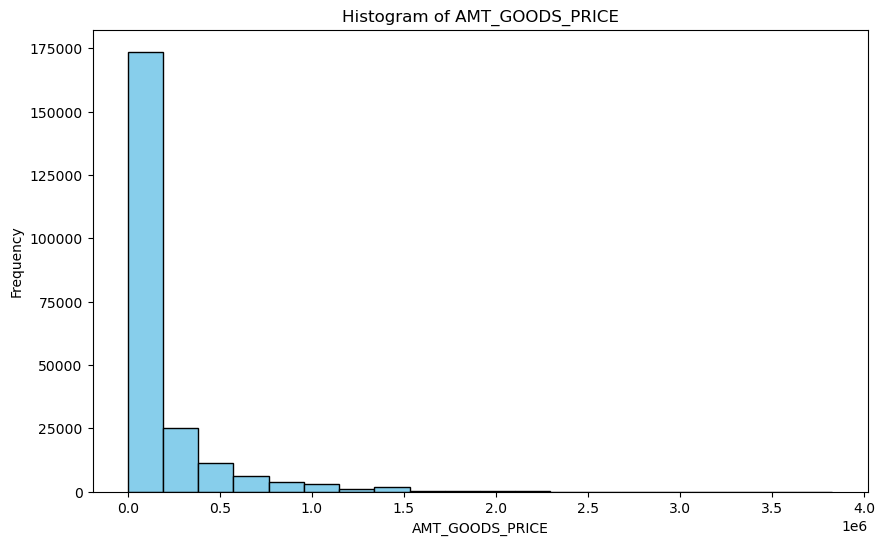

In [ ]:
plt.figure(figsize=(10, 6))
inp1['AMT_GOODS_PRICE'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of AMT_GOODS_PRICE')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram of AMT_GOODS_PRICE reveals a distribution pattern similar to that of AMT_CREDIT and AMT_ANNUITY, with a strong right skew.



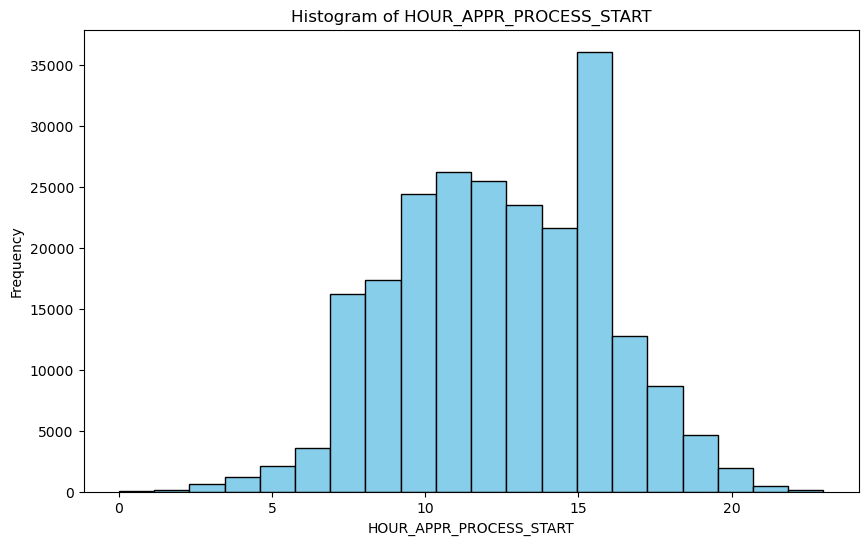

In [ ]:
plt.figure(figsize=(10, 6))
inp1['HOUR_APPR_PROCESS_START'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of HOUR_APPR_PROCESS_START')
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The histogram shows that the majority of processes start between 9 AM and 6 PM, with a peak around 3 PM. Activity is low in the early morning and late evening, reflecting typical business hours.


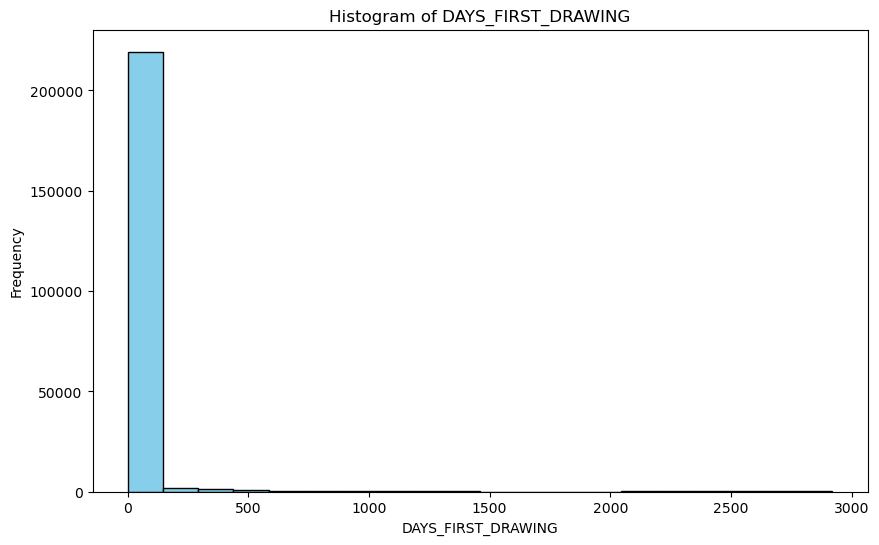

In [ ]:
plt.figure(figsize=(10, 6))
inp1['DAYS_FIRST_DRAWING'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DAYS_FIRST_DRAWING')
plt.xlabel('DAYS_FIRST_DRAWING')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The histogram for DAYS_FIRST_DRAWING shows a bimodal distribution with two distinct peaks: one near zero and another around 350,000.

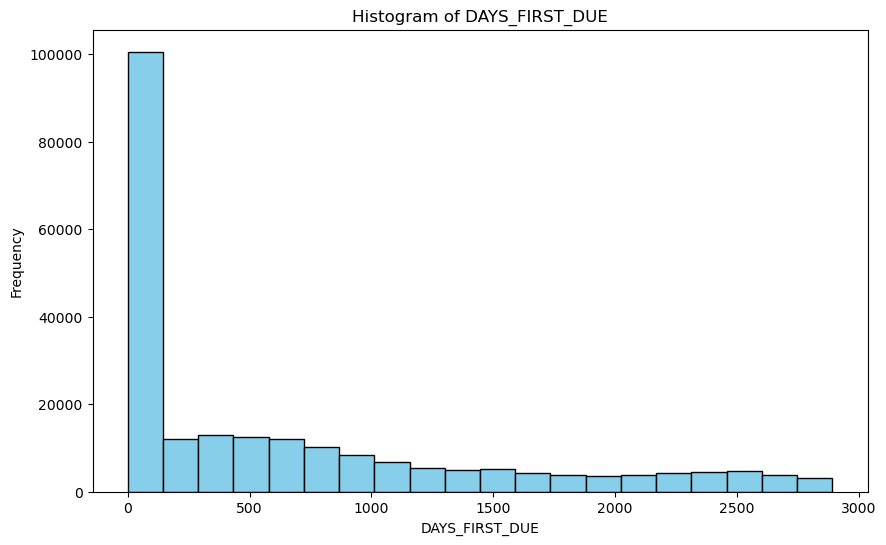

In [ ]:
plt.figure(figsize=(10, 6))
inp1['DAYS_FIRST_DUE'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DAYS_FIRST_DUE')
plt.xlabel('DAYS_FIRST_DUE')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The histogram of DAYS_FIRST_DUE shows a right-skewed distribution, with the majority of values concentrated at lower days.



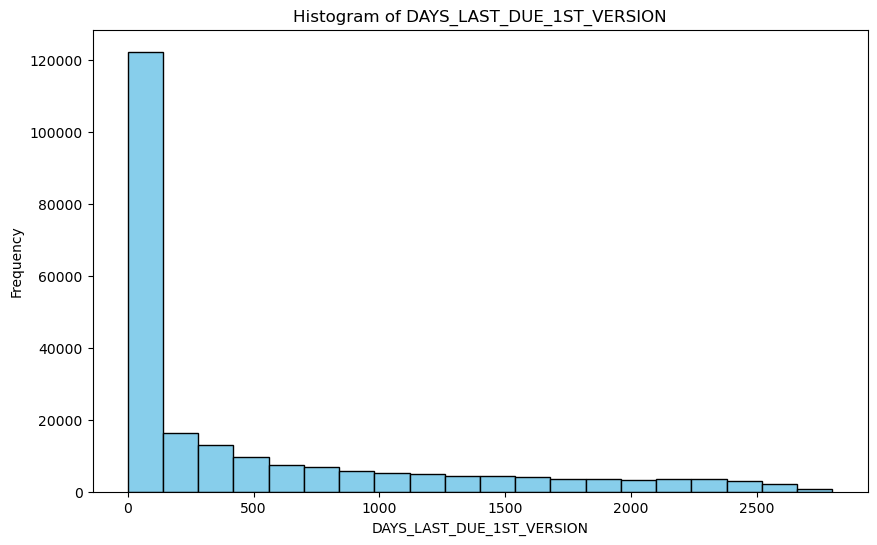

In [ ]:
plt.figure(figsize=(10, 6))
inp1['DAYS_LAST_DUE_1ST_VERSION'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DAYS_LAST_DUE_1ST_VERSION')
plt.xlabel('DAYS_LAST_DUE_1ST_VERSION')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The histogram for DAYS_LAST_DUE_1ST_VERSION shows a right-skewed distribution with a high concentration of values close to zero.



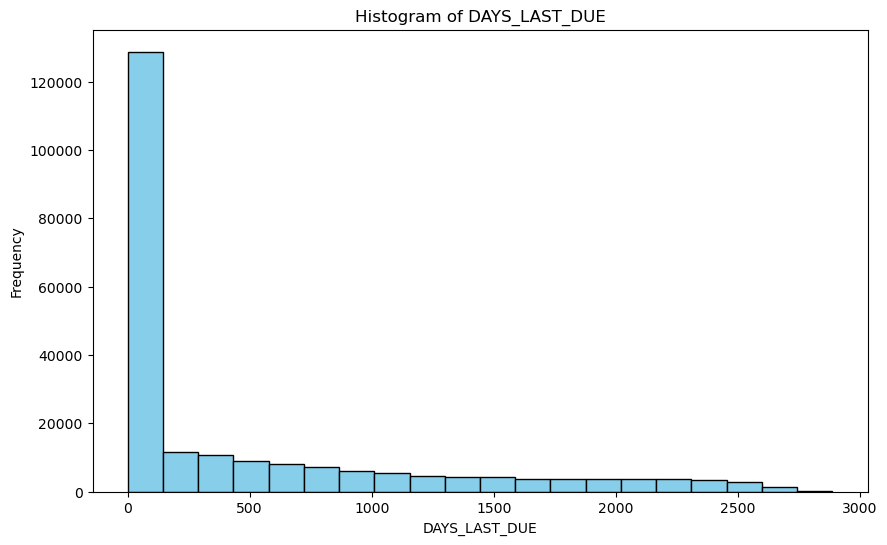

In [ ]:
plt.figure(figsize=(10, 6))
inp1['DAYS_LAST_DUE'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DAYS_LAST_DUE')
plt.xlabel('DAYS_LAST_DUE')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The histogram for DAYS_LAST_DUE shows a heavily right-skewed distribution with a high frequency of values near zero.

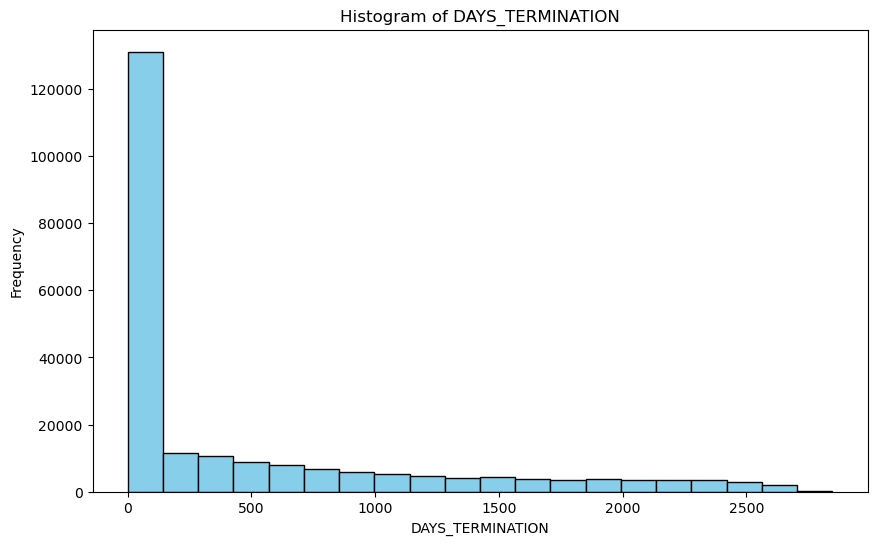

In [ ]:
plt.figure(figsize=(10, 6))
inp1['DAYS_TERMINATION'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of DAYS_TERMINATION')
plt.xlabel('DAYS_TERMINATION')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The histogram for DAYS_TERMINATION shows a distribution that is heavily right-skewed, similar to the previous variables related to days.



##Segment 7:Numerical discrete Univariate Analysis


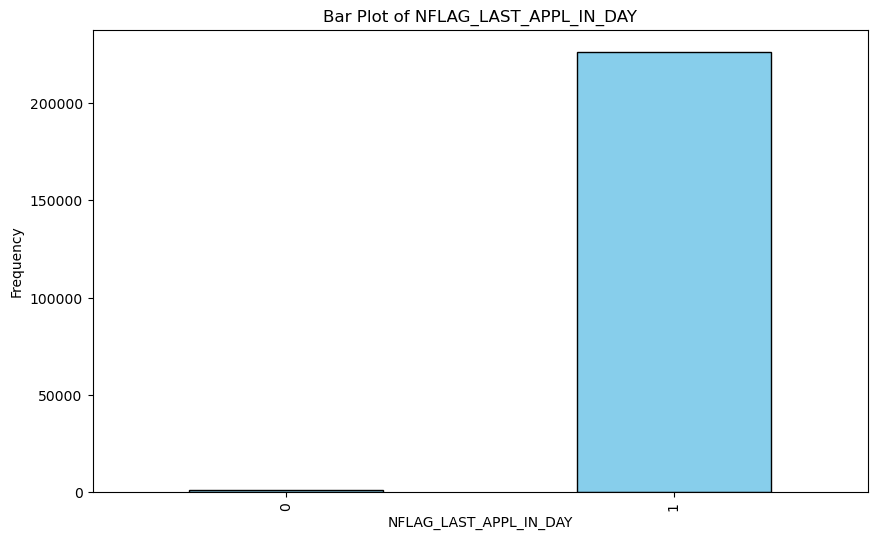

In [ ]:
plt.figure(figsize=(10, 6))
inp1['NFLAG_LAST_APPL_IN_DAY'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of NFLAG_LAST_APPL_IN_DAY')
plt.xlabel('NFLAG_LAST_APPL_IN_DAY')
plt.ylabel('Frequency')
plt.show()


The bar plot for NFLAG_LAST_APPL_IN_DAY shows a heavily imbalanced distribution, with almost all entries having a value of 1.

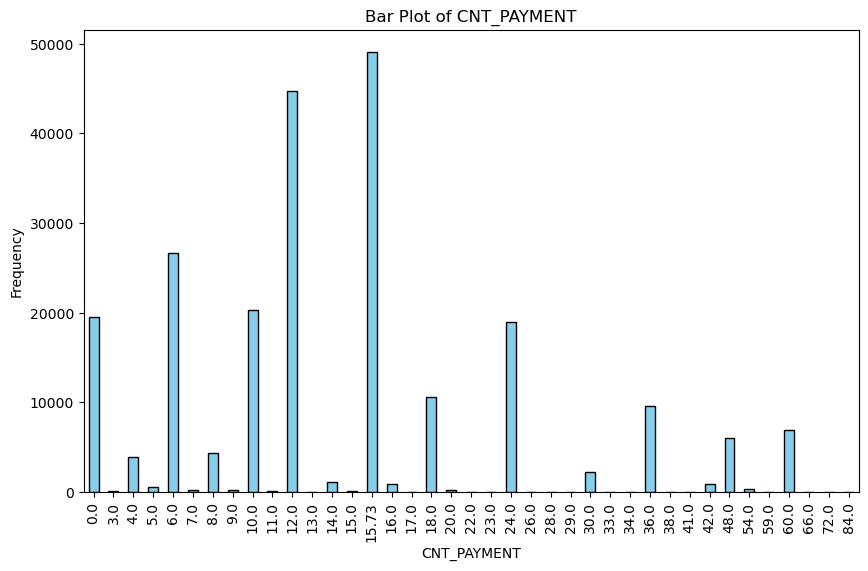

In [ ]:
plt.figure(figsize=(10, 6))
inp1['CNT_PAYMENT'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of CNT_PAYMENT')
plt.xlabel('CNT_PAYMENT')
plt.ylabel('Frequency')
plt.show()


Distinct Peaks: The payment counts of 12, 16, and 24 are the most common, indicating these are likely standard payment plans or terms used in the dataset.
Varied Distribution: There are several other less frequent payment counts, but the distribution is not uniform, suggesting that while a few payment plans are very common, others are used less frequently.

##Segment 8 :Numeric - Numeric Bivariate Analysis

In [ ]:
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION'],
      dtype='object')

In [ ]:
inp1["AMT_CREDIT"]

0           17145.0
1          679671.0
2          136444.5
3          470790.0
4          404055.0
            ...    
227386          0.0
227387    2025000.0
227388     808650.0
227389     398016.0
227390          0.0
Name: AMT_CREDIT, Length: 227347, dtype: float64

In [ ]:
inp1['AMT_ANNUITY']

0          1730.43
1         25188.62
2         15060.74
3         47041.34
4         31924.40
            ...   
227386    11033.73
227387    56862.00
227388    23644.94
227389    24350.62
227390    11033.73
Name: AMT_ANNUITY, Length: 227347, dtype: float64

Correlation between AMT_CREDIT and AMT_ANNUITY: 0.81


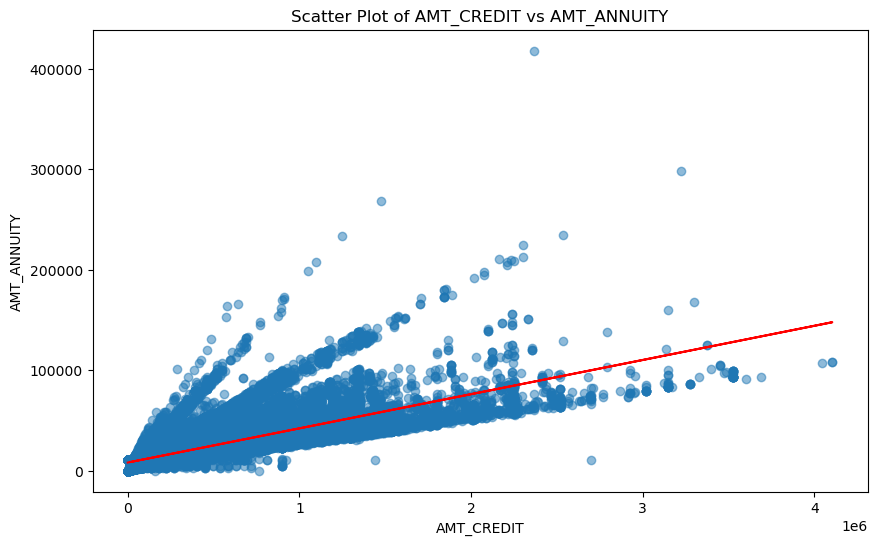

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(inp1['AMT_CREDIT'], inp1['AMT_ANNUITY'], alpha=0.5)
plt.title('Scatter Plot of AMT_CREDIT vs AMT_ANNUITY')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')


correlation_credit_annuity = inp1['AMT_CREDIT'].corr(inp1['AMT_ANNUITY'])
print(f'Correlation between AMT_CREDIT and AMT_ANNUITY: {correlation_credit_annuity:.2f}')


m, b = np.polyfit(inp1['AMT_CREDIT'], inp1['AMT_ANNUITY'], 1)
plt.plot(inp1['AMT_CREDIT'], m*inp1['AMT_CREDIT'] + b, color='red')

plt.show()


The scatter plot of AMT_CREDIT versus AMT_ANNUITY shows a positive correlation between the two variables, where higher credit amounts tend to be associated with higher annuity payments.

Correlation between AMT_APPLICATION and AMT_GOODS_PRICE: 0.99


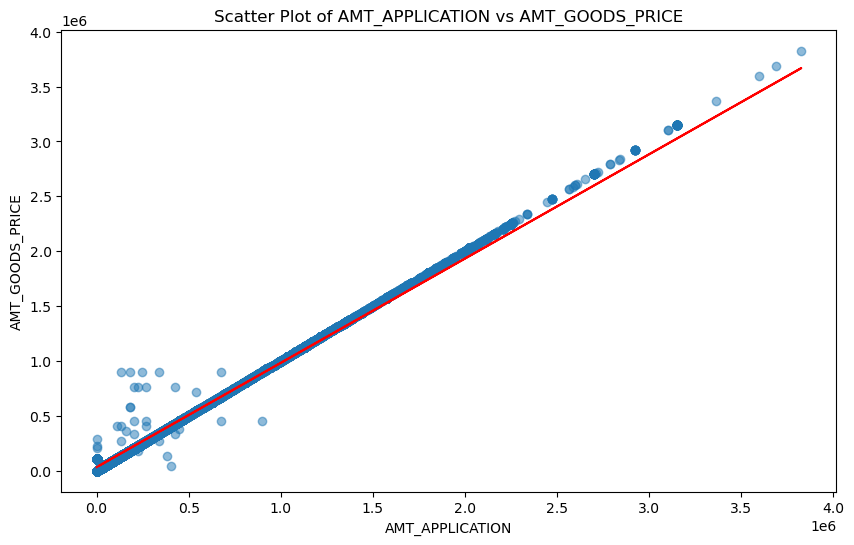

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(inp1['AMT_APPLICATION'], inp1['AMT_GOODS_PRICE'], alpha=0.5)
plt.title('Scatter Plot of AMT_APPLICATION vs AMT_GOODS_PRICE')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_GOODS_PRICE')

# Correlation Coefficient
correlation_application_goods = inp1['AMT_APPLICATION'].corr(inp1['AMT_GOODS_PRICE'])
print(f'Correlation between AMT_APPLICATION and AMT_GOODS_PRICE: {correlation_application_goods:.2f}')

# Line of Best Fit
m, b = np.polyfit(inp1['AMT_APPLICATION'], inp1['AMT_GOODS_PRICE'], 1)
plt.plot(inp1['AMT_APPLICATION'], m*inp1['AMT_APPLICATION'] + b, color='red')

plt.show()

The scatter plot of AMT_APPLICATION versus AMT_GOODS_PRICE shows a very strong positive linear relationship between the two variables, with a correlation coefficient of 0.99.

Correlation between HOUR_APPR_PROCESS_START and AMT_ANNUITY: -0.02


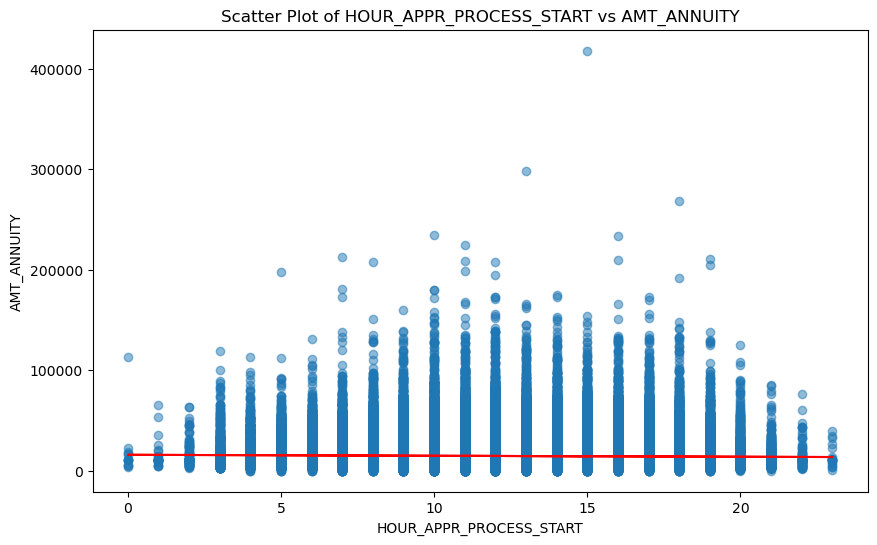

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(inp1['HOUR_APPR_PROCESS_START'], inp1['AMT_ANNUITY'], alpha=0.5)
plt.title('Scatter Plot of HOUR_APPR_PROCESS_START vs AMT_ANNUITY')
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.ylabel('AMT_ANNUITY')


correlation_hour_annuity = inp1['HOUR_APPR_PROCESS_START'].corr(inp1['AMT_ANNUITY'])
print(f'Correlation between HOUR_APPR_PROCESS_START and AMT_ANNUITY: {correlation_hour_annuity:.2f}')


m, b = np.polyfit(inp1['HOUR_APPR_PROCESS_START'], inp1['AMT_ANNUITY'], 1)
plt.plot(inp1['HOUR_APPR_PROCESS_START'], m*inp1['HOUR_APPR_PROCESS_START'] + b, color='red')

plt.show()


The scatter plot of HOUR_APPR_PROCESS_START versus AMT_ANNUITY shows no significant correlation between the hour at which the application process starts and the annuity amount. The correlation coefficient is close to zero, specifically -0.02.


Correlation between CNT_PAYMENT and AMT_ANNUITY: 0.39


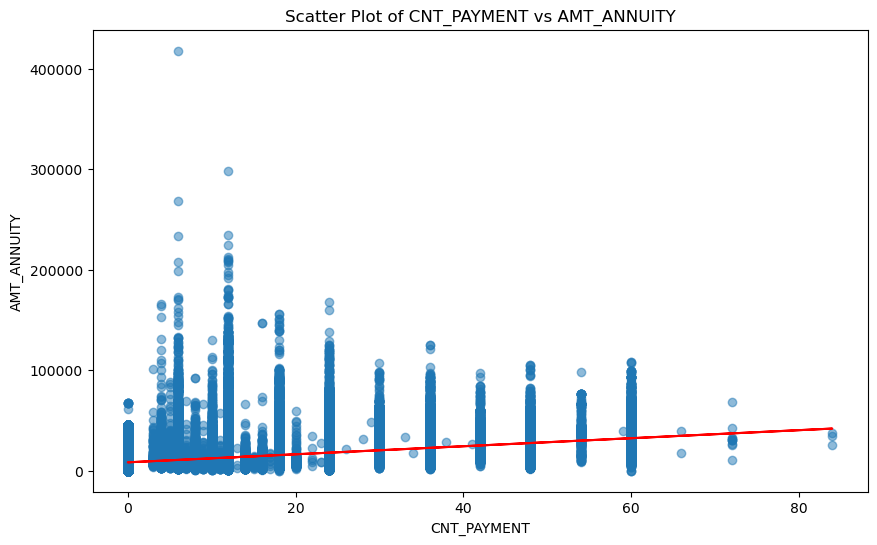

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(inp1['CNT_PAYMENT'], inp1['AMT_ANNUITY'], alpha=0.5)
plt.title('Scatter Plot of CNT_PAYMENT vs AMT_ANNUITY')
plt.xlabel('CNT_PAYMENT')
plt.ylabel('AMT_ANNUITY')


correlation_payment_annuity = inp1['CNT_PAYMENT'].corr(inp1['AMT_ANNUITY'])
print(f'Correlation between CNT_PAYMENT and AMT_ANNUITY: {correlation_payment_annuity:.2f}')


m, b = np.polyfit(inp1['CNT_PAYMENT'], inp1['AMT_ANNUITY'], 1)
plt.plot(inp1['CNT_PAYMENT'], m*inp1['CNT_PAYMENT'] + b, color='red')

plt.show()


The scatter plot of CNT_PAYMENT versus AMT_ANNUITY shows a weak positive correlation between the number of payments and the annuity amount. The correlation coefficient is 0.39, which indicates a low to moderate linear relationship.

## Segment 9 :Numeric - Categorical Bivariate Analysis

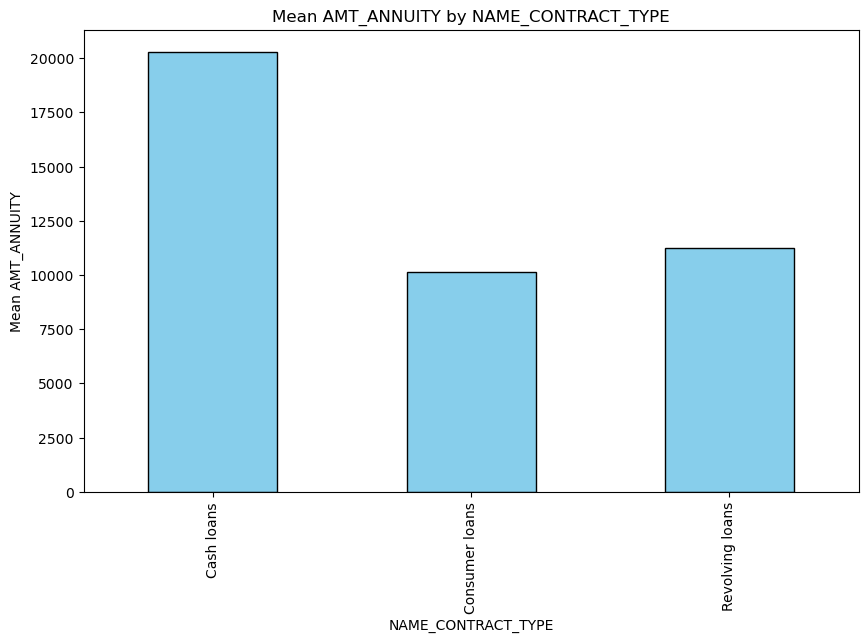

In [ ]:
plt.figure(figsize=(10, 6))
inp1.groupby('NAME_CONTRACT_TYPE')['AMT_ANNUITY'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean AMT_ANNUITY by NAME_CONTRACT_TYPE')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Mean AMT_ANNUITY')
plt.show()


Cash loans have the highest average annuity amount compared to other loan types.
Revolving loans have a higher average annuity amount than consumer loans, but both are significantly lower than cash loans.
This suggests that borrowers with cash loans are likely committing to larger annuities than those with consumer or revolving loans.







In [ ]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    inp1[inp1['NAME_CONTRACT_TYPE'] == 'Cash loans']['AMT_ANNUITY'],
    inp1[inp1['NAME_CONTRACT_TYPE'] == 'Consumer loans']['AMT_ANNUITY']
)

print(f'ANOVA test result: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.2e}')

ANOVA test result: F=33326.96, p-value=0.00e+00


The extremely high F-statistic and the very low p-value (essentially zero) indicate that there is a statistically significant difference between the means of AMT_ANNUITY for Cash loans and Consumer loans. This strong evidence suggests that the amount of annuities associated with these two types of loans is not the same, and the differences observed are unlikely due to random chance.








# Lets join both the dataset

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [ ]:
inp0.shape

(278728, 77)

In [ ]:
inp1.shape

(227347, 35)

In [ ]:
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
inp0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100004       0      Revolving loans           M             1   
3      100006       0           Cash loans           F             0   
4      100007       0           Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                1             0          202500.0      406597.5   
1                0             0          270000.0     1293502.5   
2                1             0           67500.0      135000.0   
3                1             0          135000.0      312682.5   
4                1             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2         6750.0           135000.0     Unaccompanied          Working   
3        29686.5           297000.0     Unaccompanied          Working   
4        21865.5           513000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019        9461            637             3648.0   
1                       0.004       16765           1188             1186.0   
2                       0.010       19046            225             4260.0   
3                       0.008       19005           3039             9833.0   
4                       0.029       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          0.0           1               1                0   
1              291          0.0           1               1                0   
2             2531         12.5           1               1                1   
3             2437          0.0           1               1                0   
4             3458          0.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                          9   
3                    WEDNESDAY                         17   
4                     THURSDAY                         11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                      

In [ ]:
inp0.shape

(325135, 111)

In [ ]:
col_analysis(inp0)

Column: SK_ID_CURR
Data Type: int64
Missing Values: 0
Unique Values: 278728
----------------------------------------
Column: TARGET
Data Type: int64
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: NAME_CONTRACT_TYPE_x
Data Type: object
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: CODE_GENDER
Data Type: object
Missing Values: 0
Unique Values: 3
----------------------------------------
Column: FLAG_OWN_CAR
Data Type: int64
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: FLAG_OWN_REALTY
Data Type: int64
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: CNT_CHILDREN
Data Type: int64
Missing Values: 0
Unique Values: 6
----------------------------------------
Column: AMT_INCOME_TOTAL
Data Type: float64
Missing Values: 0
Unique Values: 2196
----------------------------------------
Column: AMT_CREDIT_x
Data Type: float64
Missing Values: 0
Unique Value

Unique Values: 30035
----------------------------------------
Column: WEEKDAY_APPR_PROCESS_START_y
Data Type: object
Missing Values: 170574
Unique Values: 7
----------------------------------------
Column: HOUR_APPR_PROCESS_START_y
Data Type: float64
Missing Values: 170574
Unique Values: 24
----------------------------------------
Column: FLAG_LAST_APPL_PER_CONTRACT
Data Type: object
Missing Values: 325135
Unique Values: 0
----------------------------------------
Column: NFLAG_LAST_APPL_IN_DAY
Data Type: float64
Missing Values: 170574
Unique Values: 2
----------------------------------------
Column: RATE_DOWN_PAYMENT
Data Type: float64
Missing Values: 170574
Unique Values: 89
----------------------------------------
Column: RATE_INTEREST_PRIMARY
Data Type: float64
Missing Values: 170574
Unique Values: 16
----------------------------------------
Column: RATE_INTEREST_PRIVILEGED
Data Type: float64
Missing Values: 170574
Unique Values: 13
----------------------------------------
Column: N

In [ ]:
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE_x                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT_x                         0
AMT_ANNUITY_x                        0
AMT_GOODS_PRICE_x                    0
NAME_TYPE_SUITE_x                    0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
inp0.to_csv('output_filename1.csv', index=False)

After merging the file , i was expecting the same number of rows as in inp0 as we have left join but it had more rows than
inp0. After doing my analysis in excel from the above code, i understood client had more than 1 previous loan application.
For eg ID=100007

I read few columns like 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
                'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y', 'NAME_TYPE_SUITE_y' were repeated, I was under the impression that i should be deleting those cols but the when i observed they do have different vlaues , indicating in current loan the lcient requested forother credit amount and previous loan it could be different

To me it seems SK_ID_PREV  col is not required, hence deleting it. IF that analysis is incorrect i may bring back the col

In [ ]:
missing_percent(inp0)

SK_ID_CURR                        0.000000
TARGET                            0.000000
NAME_CONTRACT_TYPE_x              0.000000
CODE_GENDER                       0.000000
FLAG_OWN_CAR                      0.000000
FLAG_OWN_REALTY                   0.000000
CNT_CHILDREN                      0.000000
AMT_INCOME_TOTAL                  0.000000
AMT_CREDIT_x                      0.000000
AMT_ANNUITY_x                     0.000000
AMT_GOODS_PRICE_x                 0.000000
NAME_TYPE_SUITE_x                 0.000000
NAME_INCOME_TYPE                  0.000000
NAME_EDUCATION_TYPE               0.000000
NAME_FAMILY_STATUS                0.000000
NAME_HOUSING_TYPE                 0.000000
REGION_POPULATION_RELATIVE        0.000000
DAYS_BIRTH                        0.000000
DAYS_EMPLOYED                     0.000000
DAYS_REGISTRATION                 0.000000
DAYS_ID_PUBLISH                   0.000000
OWN_CAR_AGE                       0.000000
FLAG_MOBIL                        0.000000
FLAG_EMP_PH

In [ ]:
inp0.TARGET[inp0.SK_ID_PREV.isna()].sum()

13470

I was under the impression that the ones with no previous application might have been rejected but in the above cell i understood even the applications with no previous application there were 13470 applications approved
Hence removeing the blanks isnt the correct option

Hence i have decided to replce the numeric columns with 0 and categorical variavle with unknow indicating they had no previous data for the applications

In [ ]:
inp0.drop(columns='SK_ID_PREV',axis=1,inplace=True)

In [ ]:
numeric_cols = inp0.select_dtypes(include=['number']).columns
inp0[numeric_cols] = inp0[numeric_cols].fillna(0)

In [ ]:
categorical_cols = inp0.select_dtypes(include=['object']).columns
inp0[categorical_cols] = inp0[categorical_cols].fillna('Unknown')

In [ ]:
col_analysis(inp0)

Column: SK_ID_CURR
Data Type: int64
Missing Values: 0
Unique Values: 278728
----------------------------------------
Column: TARGET
Data Type: int64
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: NAME_CONTRACT_TYPE_x
Data Type: object
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: CODE_GENDER
Data Type: object
Missing Values: 0
Unique Values: 3
----------------------------------------
Column: FLAG_OWN_CAR
Data Type: int64
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: FLAG_OWN_REALTY
Data Type: int64
Missing Values: 0
Unique Values: 2
----------------------------------------
Column: CNT_CHILDREN
Data Type: int64
Missing Values: 0
Unique Values: 6
----------------------------------------
Column: AMT_INCOME_TOTAL
Data Type: float64
Missing Values: 0
Unique Values: 2196
----------------------------------------
Column: AMT_CREDIT_x
Data Type: float64
Missing Values: 0
Unique Value

Unique Values: 5
----------------------------------------
Column: NAME_CONTRACT_TYPE_y
Data Type: object
Missing Values: 0
Unique Values: 4
----------------------------------------
Column: AMT_ANNUITY_y
Data Type: float64
Missing Values: 0
Unique Values: 79030
----------------------------------------
Column: AMT_APPLICATION
Data Type: float64
Missing Values: 0
Unique Values: 30035
----------------------------------------
Column: AMT_CREDIT_y
Data Type: float64
Missing Values: 0
Unique Values: 37457
----------------------------------------
Column: AMT_DOWN_PAYMENT
Data Type: float64
Missing Values: 0
Unique Values: 8516
----------------------------------------
Column: AMT_GOODS_PRICE_y
Data Type: float64
Missing Values: 0
Unique Values: 30035
----------------------------------------
Column: WEEKDAY_APPR_PROCESS_START_y
Data Type: object
Missing Values: 0
Unique Values: 8
----------------------------------------
Column: HOUR_APPR_PROCESS_START_y
Data Type: float64
Missing Values: 0
Uniqu

In [ ]:
inp0.REGION_POPULATION_RELATIVE=inp0.REGION_POPULATION_RELATIVE.round(2)

In [ ]:
inp0.DAYS_EMPLOYED=np.where(inp0.DAYS_EMPLOYED==365243,0,inp0.DAYS_EMPLOYED)

All the columns in new dataset seems to be standardized

Individual analysis has been done in each of the dataset, lets do the analysis together

In [ ]:
inp0[(inp0.NAME_INCOME_TYPE=='Maternity leave') & (inp0.CODE_GENDER=="M") ]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
51922      156685       0      Revolving loans           M             0   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
51922                0             0          360000.0      765000.0   

       AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
51922        61704.0           765000.0     Unaccompanied  Maternity leave   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
51922    Higher education            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
51922                        0.05       22166           3762   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
51922             9228.0             4363          0.0           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
51922               1                0                 1           1   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
51922           0         Unknown              2.0                     1   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
51922                            1                     THURSDAY   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
51922                         19                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
51922                           1                            1   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
51922                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
51922                        0   Business Entity           0.9          0.72   

       EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
51922           0.0            0.19              0.09   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
51922                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
51922                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
51922                   718.0                0                0   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
51922                0                0                0                1   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
51922                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
51922                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
51922                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
51922                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
51922                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
51922                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
51922                         0.0              Unknown            0.0   

       AMT_APPLICATION  AMT_CREDIT_y  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_y  \
51922              0.0           0.0               0.0                0.0   

      WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  \
51922                      Unknown                        0.0   

      FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
51922                     Unknown                     0.0                0.0   

       RATE_INTEREST_PRIMARY  RATE_INTEREST

The above row bothers me gives me impression that this could be an invalide entry, hence would  like to delete it

In [ ]:
inp0 = inp0[~((inp0.NAME_INCOME_TYPE == 'Maternity leave') & (inp0.CODE_GENDER == "M"))]

In [ ]:
inp0.NAME_INCOME_TYPE.value_counts()

Working                 169229
Commercial associate     75441
Pensioner                57451
State servant            22952
Unemployed                  28
Student                     19
Businessman                 10
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64

# Handling outliers

In [ ]:
inp1.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

<Axes: >

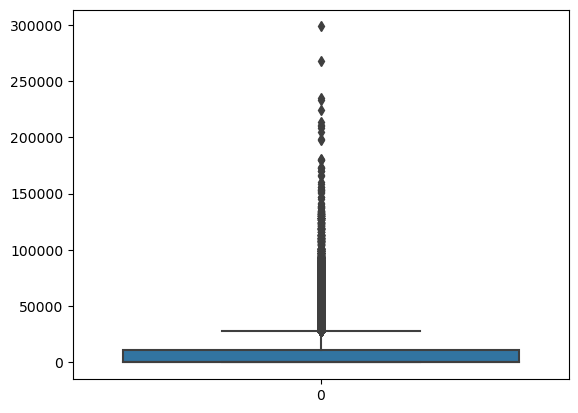

In [ ]:
sns.boxplot(inp0.AMT_ANNUITY_y)

In [ ]:
handling_outlier(inp0.AMT_ANNUITY_y)

(27584.325, -16550.595)

In [ ]:
inp0['AMT_ANNUITY_y'] = np.where(inp0['AMT_ANNUITY_y'] < -16550.595, -16550.595, inp0['AMT_ANNUITY_y'])
inp0['AMT_ANNUITY_y'] = np.where(inp0['AMT_ANNUITY_y'] > 27584.325, 27584.325, inp0['AMT_ANNUITY_y'])

<Axes: >

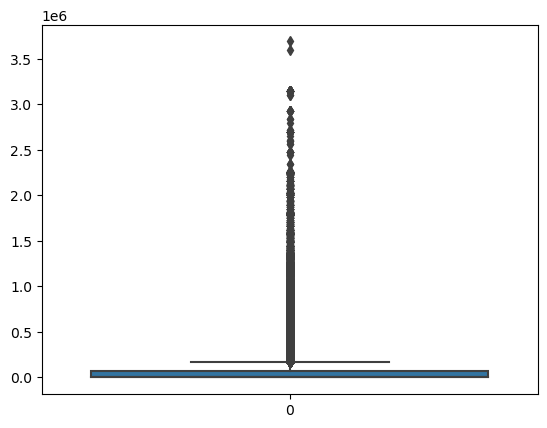

In [ ]:
sns.boxplot(inp0.AMT_APPLICATION)

In [ ]:
handling_outlier(inp0.AMT_APPLICATION)

(168637.5, -101182.5)

In [ ]:
inp0['AMT_APPLICATION'] = np.where(inp0['AMT_APPLICATION'] < -101182.5, -101182.5, inp0['AMT_APPLICATION'])
inp0['AMT_APPLICATION'] = np.where(inp0['AMT_APPLICATION'] > 168637.5, 168637.5, inp0['AMT_APPLICATION'])

<Axes: >

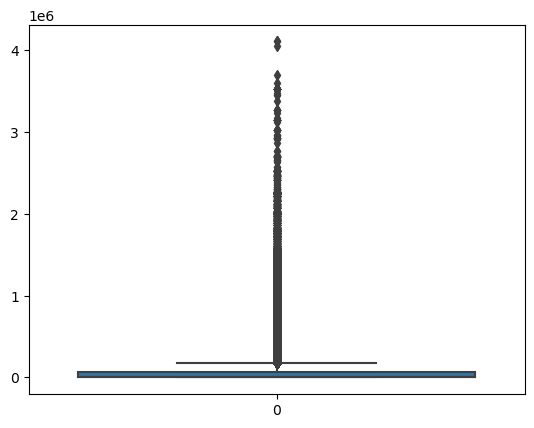

In [ ]:
sns.boxplot(inp0.AMT_CREDIT_y)

In [ ]:
handling_outlier(inp0.AMT_CREDIT_y)

(180593.4375, -108356.0625)

In [ ]:
inp0.AMT_CREDIT_y = np.where(inp0.AMT_CREDIT_y > 180593.4375 ,
                           180593.4375, inp0['AMT_CREDIT_y'])

<Axes: >

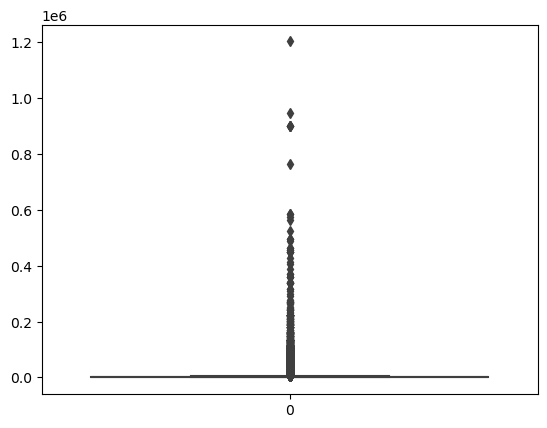

In [ ]:
sns.boxplot(inp0.AMT_DOWN_PAYMENT)

In [ ]:
inp0.AMT_DOWN_PAYMENT.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25        0.0000
0.50        0.0000
0.75     1674.0000
0.80     1674.0000
0.95     9805.6575
0.96    12375.0000
0.97    14908.6251
0.98    20335.5000
0.99    30474.0900
Name: AMT_DOWN_PAYMENT, dtype: float64

In [ ]:
handling_outlier(inp0.AMT_DOWN_PAYMENT)

(4185.0, -2511.0)

In [ ]:
inp0['AMT_DOWN_PAYMENT'] = np.where(inp0['AMT_DOWN_PAYMENT'] >inp0.AMT_DOWN_PAYMENT.quantile(0.95) ,
                                    inp0.AMT_DOWN_PAYMENT.quantile(0.95), inp0['AMT_DOWN_PAYMENT'])


<Axes: >

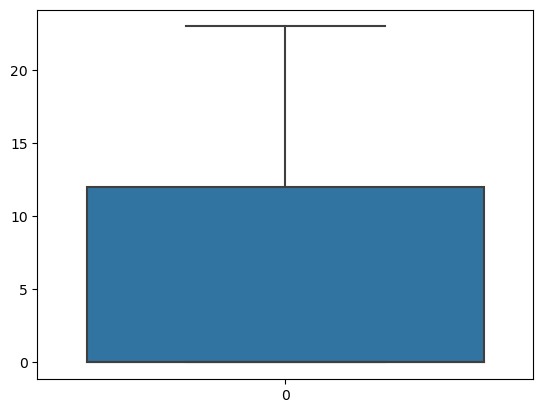

In [ ]:
sns.boxplot(inp0.HOUR_APPR_PROCESS_START_y)

<Axes: >

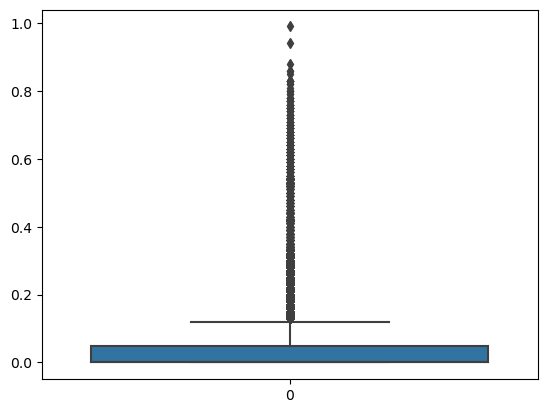

In [ ]:
sns.boxplot(inp0.RATE_DOWN_PAYMENT)

In [ ]:
handling_outlier(inp0.RATE_DOWN_PAYMENT)

(0.125, -0.07500000000000001)

In [ ]:

inp0['RATE_DOWN_PAYMENT'] = np.where(inp0['RATE_DOWN_PAYMENT'] < -0.075,-0.075, inp0['RATE_DOWN_PAYMENT'])
inp0['RATE_DOWN_PAYMENT'] = np.where(inp0['RATE_DOWN_PAYMENT'] >0.125,0.125,inp0['RATE_DOWN_PAYMENT'])

<Axes: >

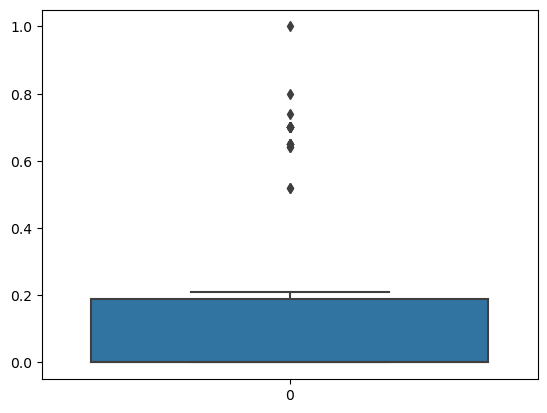

In [ ]:
sns.boxplot(inp0.RATE_INTEREST_PRIMARY)

In [ ]:
inp0.RATE_INTEREST_PRIMARY.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25    0.00
0.50    0.00
0.75    0.19
0.80    0.19
0.95    0.19
0.96    0.19
0.97    0.19
0.98    0.19
0.99    0.19
Name: RATE_INTEREST_PRIMARY, dtype: float64

In [ ]:
handling_outlier(inp0['RATE_INTEREST_PRIMARY'])

(0.47500000000000003, -0.28500000000000003)

In [ ]:
inp0['RATE_INTEREST_PRIMARY'] = np.where(inp0['RATE_INTEREST_PRIMARY']>0.475,0.475,inp0['RATE_INTEREST_PRIMARY'])

<Axes: >

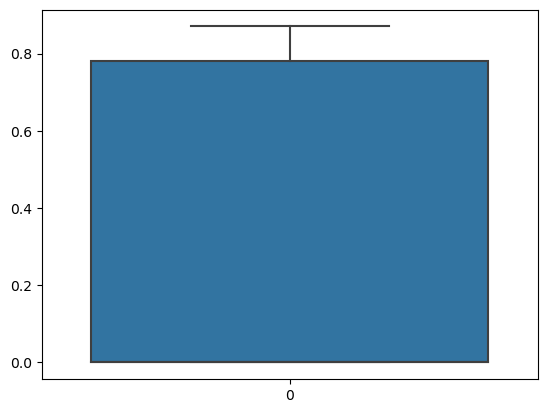

In [ ]:
sns.boxplot(inp0.RATE_INTEREST_PRIVILEGED)

In [ ]:
inp0.RATE_INTEREST_PRIVILEGED.value_counts()

0.00    170573
0.78    153968
0.84       168
0.72       112
0.64        97
0.87        95
0.85        92
0.57        12
0.83         6
0.42         6
0.51         2
0.37         1
0.82         1
0.81         1
Name: RATE_INTEREST_PRIVILEGED, dtype: int64

In [ ]:
handling_outlier(inp0.RATE_INTEREST_PRIVILEGED)

(1.95, -1.17)

In [ ]:
inp0['RATE_INTEREST_PRIVILEGED'] = np.where(inp0['RATE_INTEREST_PRIVILEGED'] >1.95,1.95,inp0['RATE_INTEREST_PRIVILEGED'])

<Axes: >

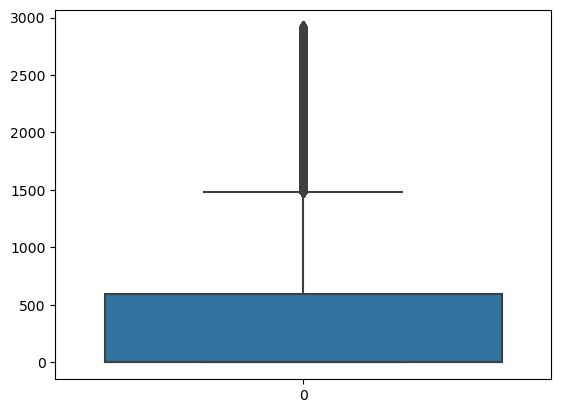

In [ ]:
sns.boxplot(inp0.DAYS_DECISION)

In [ ]:
handling_outlier(inp0.DAYS_DECISION)

(1480.0, -888.0)

In [ ]:
inp0['DAYS_DECISION'] = np.where(inp0['DAYS_DECISION'] >1480.0,1480.0,inp0['DAYS_DECISION'])


<Axes: >

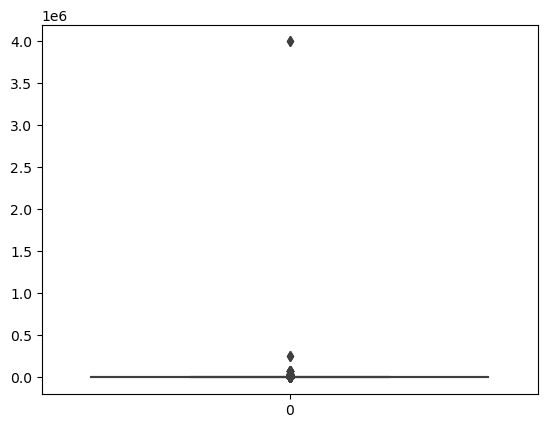

In [ ]:
sns.boxplot(inp0.SELLERPLACE_AREA)

In [ ]:
handling_outlier(inp0.SELLERPLACE_AREA)

(37.5, -22.5)

In [ ]:
inp0['SELLERPLACE_AREA'] = inp0['SELLERPLACE_AREA'].replace(-1, inp0['SELLERPLACE_AREA'].median())
inp0['SELLERPLACE_AREA'] = np.where(inp0['SELLERPLACE_AREA'] >37.5,37.5,inp0['SELLERPLACE_AREA'])


<Axes: >

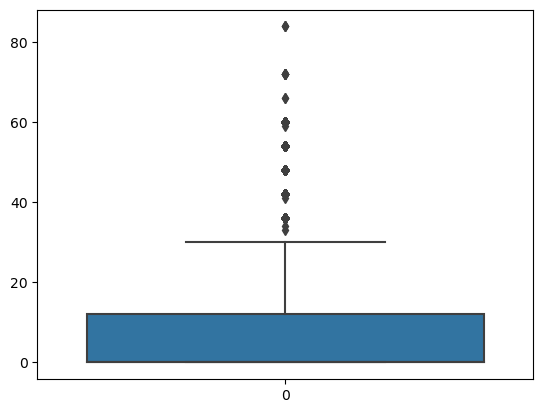

In [ ]:
sns.boxplot(inp0.CNT_PAYMENT)

In [ ]:
handling_outlier(inp0.CNT_PAYMENT)

(30.0, -18.0)

In [ ]:
inp0.CNT_PAYMENT= np.where(inp0.CNT_PAYMENT>30.0, 30.0,inp0.CNT_PAYMENT)


<Axes: >

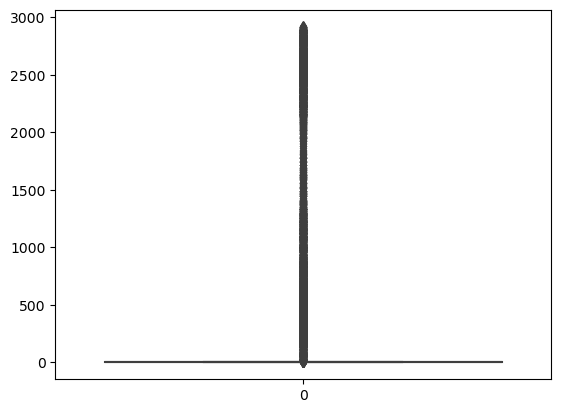

In [ ]:
sns.boxplot(inp0.DAYS_FIRST_DRAWING)

In [ ]:
handling_outlier(inp0.DAYS_FIRST_DRAWING)

(0.0, 0.0)

In [ ]:
inp0.DAYS_FIRST_DRAWING.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25      0.00
0.50      0.00
0.75      0.00
0.80      0.00
0.95      0.00
0.96      0.00
0.97      0.00
0.98      0.00
0.99    512.67
Name: DAYS_FIRST_DRAWING, dtype: float64

In [ ]:
inp0.DAYS_FIRST_DRAWING.value_counts()

0.0       319241
202.0         22
212.0         18
291.0         17
302.0         16
           ...  
2011.0         1
2465.0         1
2533.0         1
2693.0         1
1328.0         1
Name: DAYS_FIRST_DRAWING, Length: 1990, dtype: int64

In [ ]:
inp0.DAYS_FIRST_DRAWING=np.where(inp0.DAYS_FIRST_DRAWING>inp0.DAYS_FIRST_DRAWING.quantile(0.98),
                                 inp0.DAYS_FIRST_DRAWING.quantile(0.98),inp0.DAYS_FIRST_DRAWING)

<Axes: >

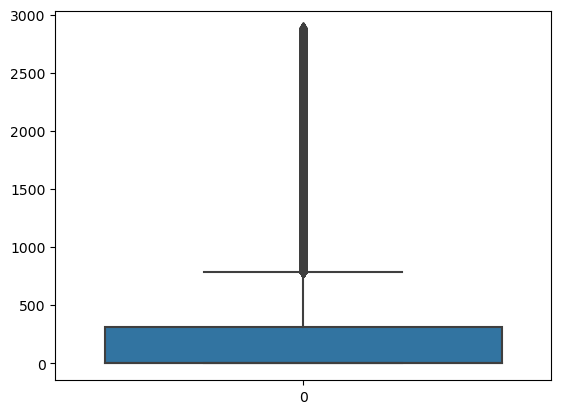

In [ ]:
sns.boxplot(inp0.DAYS_FIRST_DUE)

In [ ]:
inp0.DAYS_FIRST_DUE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25       0.00
0.50       0.00
0.75     314.00
0.80     566.00
0.95    2130.00
0.96    2281.00
0.97    2418.00
0.98    2547.00
0.99    2692.67
Name: DAYS_FIRST_DUE, dtype: float64

In [ ]:
inp0.DAYS_FIRST_DUE=np.where(inp0.DAYS_FIRST_DUE>inp0.DAYS_FIRST_DUE.quantile(0.94),
                                 inp0.DAYS_FIRST_DUE.quantile(0.94),inp0.DAYS_FIRST_DUE)

<Axes: >

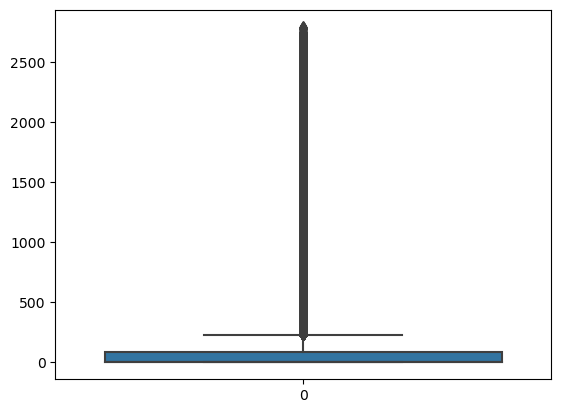

In [ ]:
sns.boxplot(inp0.DAYS_LAST_DUE_1ST_VERSION)

In [ ]:
handling_outlier(inp0.DAYS_LAST_DUE_1ST_VERSION)

(227.5, -136.5)

In [ ]:
inp0.DAYS_LAST_DUE_1ST_VERSION= np.where(inp0.DAYS_LAST_DUE_1ST_VERSION>227.5,
                                         227.5,inp0.DAYS_LAST_DUE_1ST_VERSION)


<Axes: >

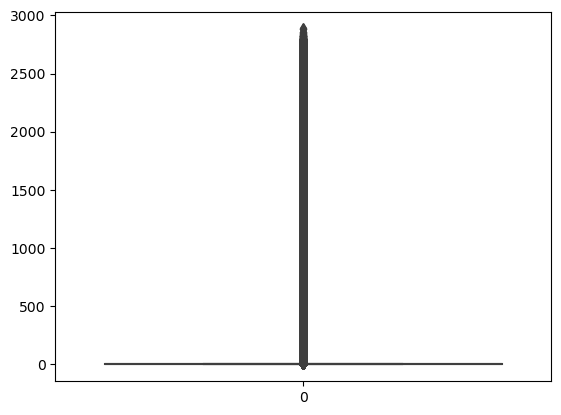

In [ ]:
sns.boxplot(inp0.DAYS_LAST_DUE)

In [ ]:
handling_outlier(inp0.DAYS_LAST_DUE)

(0.0, 0.0)

In [ ]:
inp0.DAYS_LAST_DUE.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25       0.0
0.50       0.0
0.75       0.0
0.80     251.0
0.95    1791.0
0.96    1955.0
0.97    2124.0
0.98    2286.0
0.99    2462.0
Name: DAYS_LAST_DUE, dtype: float64

In [ ]:
inp0.DAYS_LAST_DUE=np.where(inp0.DAYS_LAST_DUE>inp0.DAYS_LAST_DUE.quantile(0.80),
                                 inp0.DAYS_LAST_DUE.quantile(0.80),inp0.DAYS_LAST_DUE)

<Axes: >

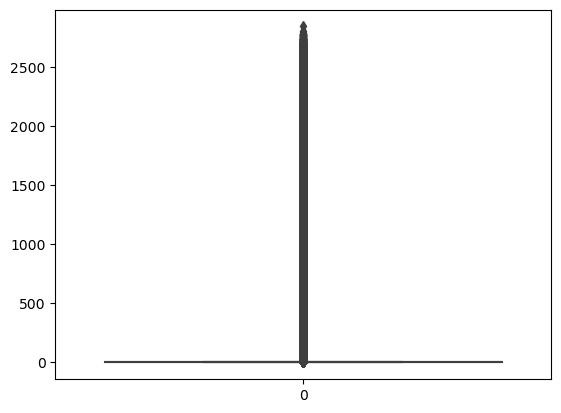

In [ ]:
sns.boxplot(inp0.DAYS_TERMINATION)

In [ ]:
handling_outlier(inp0.DAYS_TERMINATION)

(0.0, 0.0)

In [ ]:
inp0.DAYS_TERMINATION.quantile([0.25,0.5,0.75,0.80,0.95,0.96,0.97,0.98,0.99])

0.25       0.0
0.50       0.0
0.75       0.0
0.80     217.4
0.95    1748.0
0.96    1922.0
0.97    2097.0
0.98    2264.0
0.99    2448.0
Name: DAYS_TERMINATION, dtype: float64

In [ ]:
inp0.DAYS_TERMINATION=np.where(inp0.DAYS_TERMINATION>inp0.DAYS_TERMINATION.quantile(0.80),
                                 inp0.DAYS_TERMINATION.quantile(0.80),inp0.DAYS_TERMINATION)

# Categorical Unordered Univariate Analysis

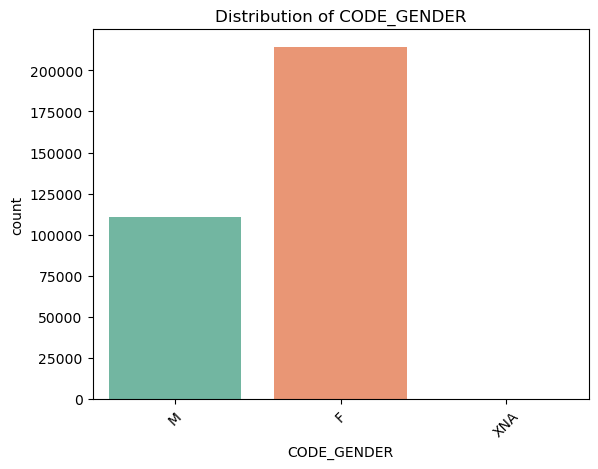

In [ ]:
sns.countplot(data=inp0, x='CODE_GENDER', palette='Set2')
plt.title('Distribution of CODE_GENDER')
plt.xticks(rotation=45)
plt.show()


The majority of applicants are female, followed by male, with a very small proportion labeled as 'XNA', which might represent missing or undisclosed gender information.

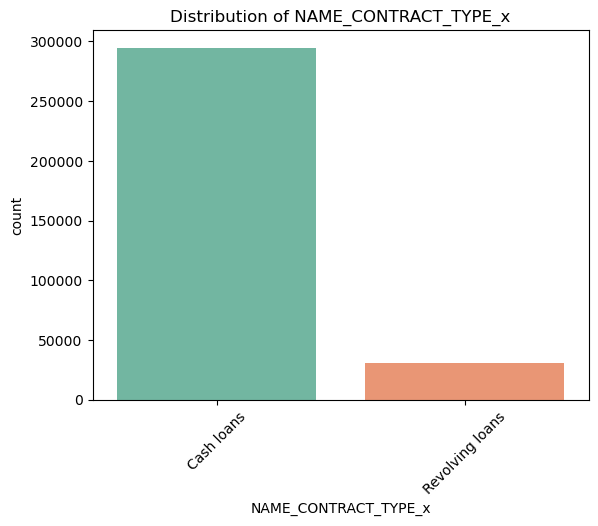

In [ ]:
sns.countplot(data=inp0, x='NAME_CONTRACT_TYPE_x', palette='Set2')
plt.title('Distribution of NAME_CONTRACT_TYPE_x')
plt.xticks(rotation=45)
plt.show()

The vast majority of loans are cash loans, with revolving loans being a much smaller proportion, indicating a preference for cash loans among the applicants.

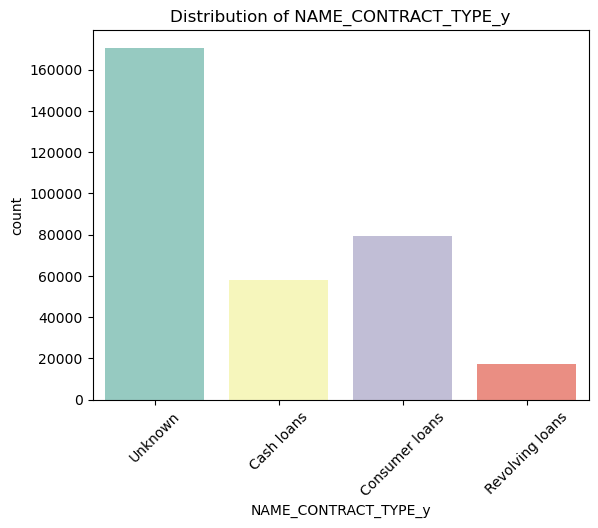

In [ ]:
sns.countplot(data=inp0, x='NAME_CONTRACT_TYPE_y', palette='Set3')
plt.title('Distribution of NAME_CONTRACT_TYPE_y')
plt.xticks(rotation=45)
plt.show()

A significant number of previous loan types are labeled as 'Unknown', with the next largest categories being consumer loans and cash loans, indicating that a large portion of clients had no previous application which i marked missing as unknows after joining

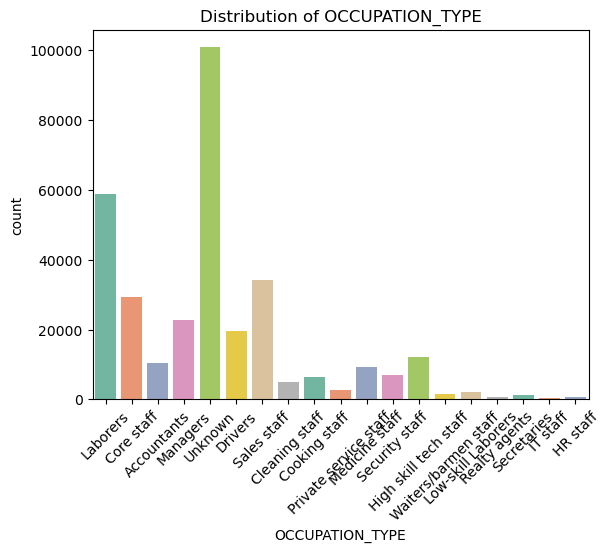

In [ ]:
sns.countplot(data=inp0, x='OCCUPATION_TYPE', palette='Set2')
plt.title('Distribution of OCCUPATION_TYPE')
plt.xticks(rotation=45)
plt.show()

The majority of applicants are Unknown, followed by laborers , core staff, with other occupations like sales staff and drivers forming smaller proportions, reflecting the occupational diversity of the applicant pool.

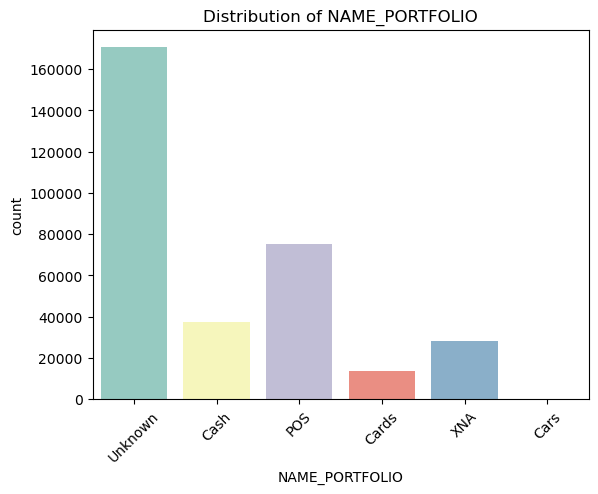

In [ ]:
sns.countplot(data=inp0, x='NAME_PORTFOLIO', palette='Set3')
plt.title('Distribution of NAME_PORTFOLIO')
plt.xticks(rotation=45)
plt.show()

The "Unknown" category dominates the NAME_PORTFOLIO distribution, indicating that for most entries, the portfolio name is not specified.
"POS" (Point of Sale) and "Cash" are the next most common portfolio types, with smaller proportions of "Cards," "Cars," and "XNA."

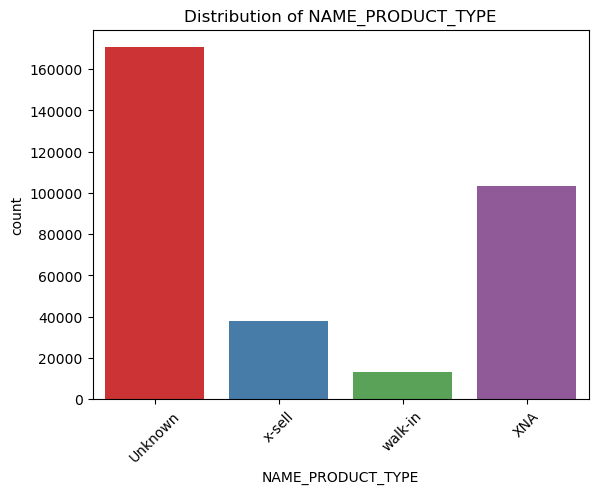

In [ ]:
sns.countplot(data=inp0, x='NAME_PRODUCT_TYPE', palette='Set1')
plt.title('Distribution of NAME_PRODUCT_TYPE')
plt.xticks(rotation=45)
plt.show()

Similar to the portfolio distribution, "Unknown" is the most frequent category, suggesting that many entries do not have a specified product type.
"X-sell" and "XNA" are the next most common product types, with "Walk-in" being the least common.

# Categorical ordered Univariate Analysis

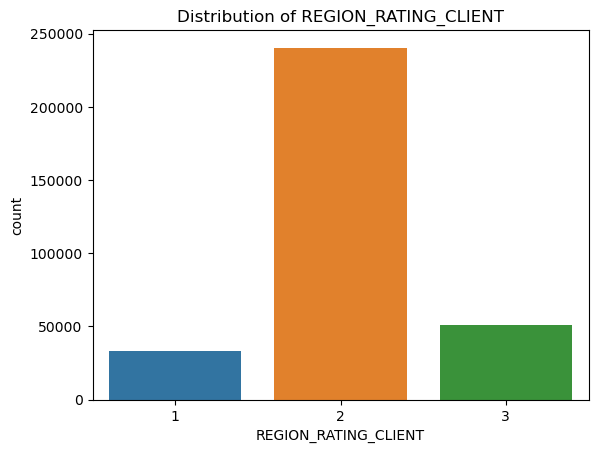

In [ ]:
sns.countplot(data=inp0, x='REGION_RATING_CLIENT')
plt.title('Distribution of REGION_RATING_CLIENT')
plt.show()

The majority of clients are rated with a value of 2 for the REGION_RATING_CLIENT, indicating that most clients are from regions with a middle-level rating.
A smaller proportion of clients have ratings of 3 (higher rating) and 1 (lower rating), suggesting fewer clients come from regions with either the highest or lowest ratings.

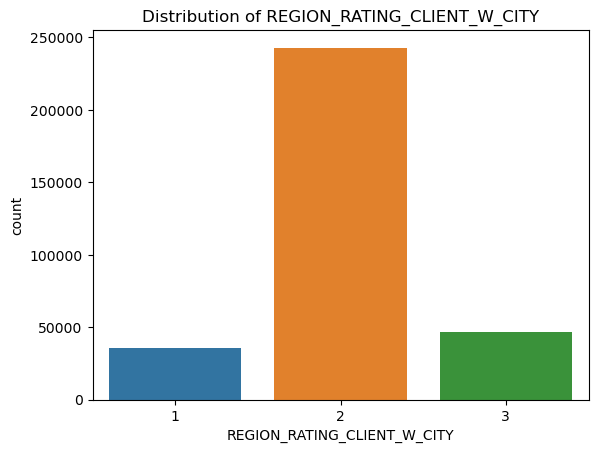

In [ ]:
sns.countplot(data=inp0, x='REGION_RATING_CLIENT_W_CITY')
plt.title('Distribution of REGION_RATING_CLIENT_W_CITY')
plt.show()

The distribution for REGION_RATING_CLIENT_W_CITY is very similar to that of REGION_RATING_CLIENT, with most clients receiving a rating of 2.
There is a similar pattern where ratings of 3 and 1 are less common.

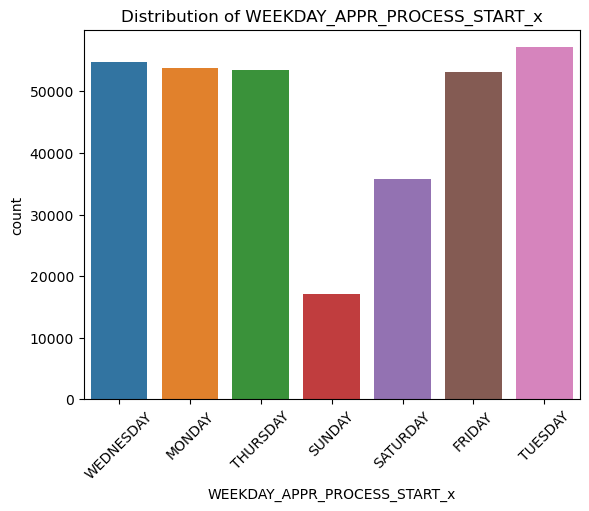

In [ ]:
sns.countplot(data=inp0, x='WEEKDAY_APPR_PROCESS_START_x')
plt.title('Distribution of WEEKDAY_APPR_PROCESS_START_x')
plt.xticks(rotation=45)
plt.show()

The application process predominantly starts on Tuesday, followed closely by Monday and Friday.
Sunday has the lowest count, indicating fewer applications begin on Sundays.
This distribution suggests that the start of the workweek is a busy time for application processing, possibly reflecting client availability or operational factors.


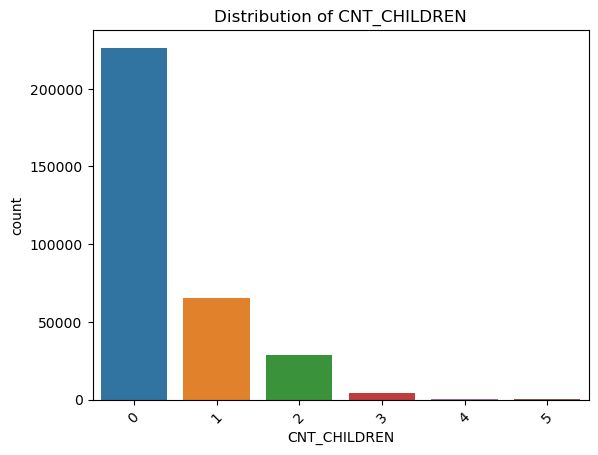

In [ ]:
sns.countplot(data=inp0, x='CNT_CHILDREN')
plt.title('Distribution of CNT_CHILDREN')
plt.xticks(rotation=45)
plt.show()

The majority of applicants have 0 children, followed by those with 1 child. The count decreases significantly as the number of children increases, with very few applicants having more than 2 children.
This pattern indicates that most applicants either have no children or a small number of children, which could have implications for financial responsibilities and loan applications.

# Numerical continuous Univariate Analysis

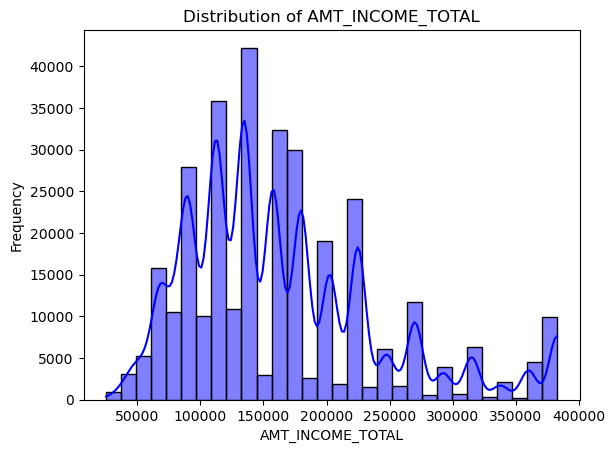

In [ ]:
sns.histplot(inp0['AMT_INCOME_TOTAL'], kde=True, bins=30, color='blue')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

The distribution of total income shows a right-skewed pattern, where the majority of applicants have an income within the range of 50,000 to 200,000.

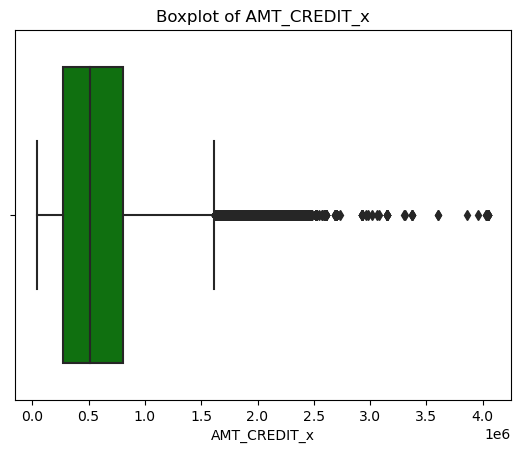

In [ ]:
sns.boxplot(x=inp0['AMT_CREDIT_x'], color='green')
plt.title('Boxplot of AMT_CREDIT_x')
plt.xlabel('AMT_CREDIT_x')
plt.show()

The boxplot shows that the majority of credit amounts are clustered between 0.5M to 1.0M.
There are several outliers beyond 1.0M, with some credit amounts reaching up to 4.0M.

<Axes: xlabel='AMT_CREDIT_y'>

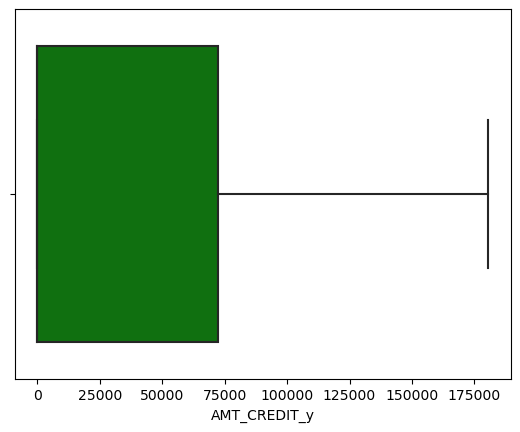

In [ ]:
sns.boxplot(x=inp0['AMT_CREDIT_y'], color='green')

The boxplot indicates that the majority of credit amounts in this dataset are clustered between 25,000 and 75,000.

Text(0, 0.5, 'Frequency')

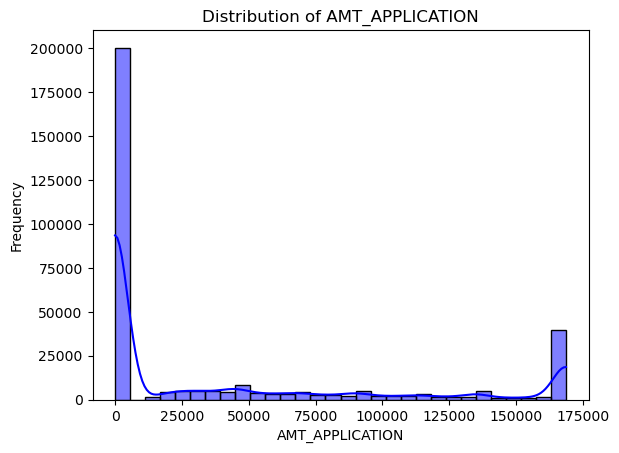

In [ ]:
sns.histplot(inp0['AMT_APPLICATION'], kde=True, bins=30, color='blue')
plt.title('Distribution of AMT_APPLICATION')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('Frequency')

There is a noticeable spike at the higher end, around 150,000 to 175,000, indicating that a subset of applicants applied for significantly larger loans.

<Axes: xlabel='AMT_GOODS_PRICE_x'>

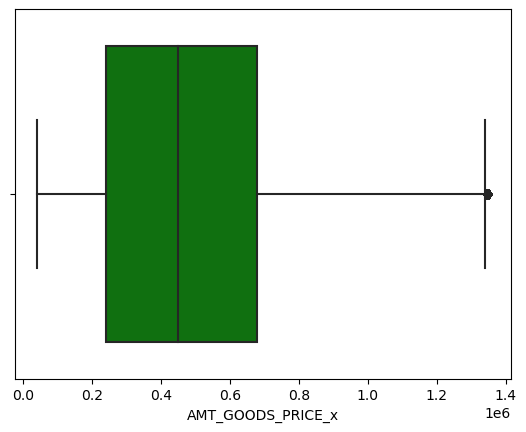

In [ ]:
sns.boxplot(x=inp0['AMT_GOODS_PRICE_x'], color='green')

The boxplot of AMT_GOODS_PRICE_x shows that the majority of goods prices are centered around 400,000 with some variation.

<Axes: xlabel='AMT_GOODS_PRICE_y'>

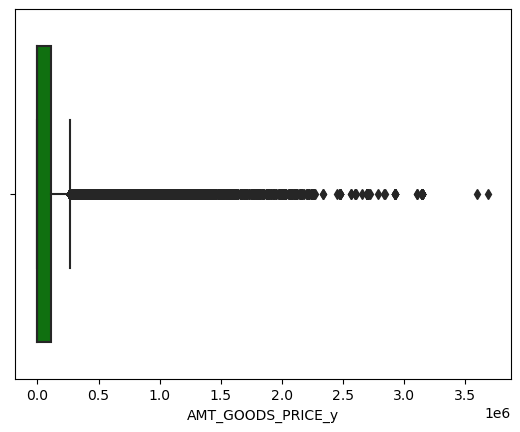

In [ ]:
sns.boxplot(x=inp0['AMT_GOODS_PRICE_y'], color='green')

In [ ]:
handling_outlier(inp0.AMT_GOODS_PRICE_y)

(269550.0, -161730.0)

In [ ]:
inp0.AMT_GOODS_PRICE_y=np.where(inp0.AMT_GOODS_PRICE_y>269550 , 269550,inp0.AMT_GOODS_PRICE_y)

<Axes: xlabel='AMT_GOODS_PRICE_y'>

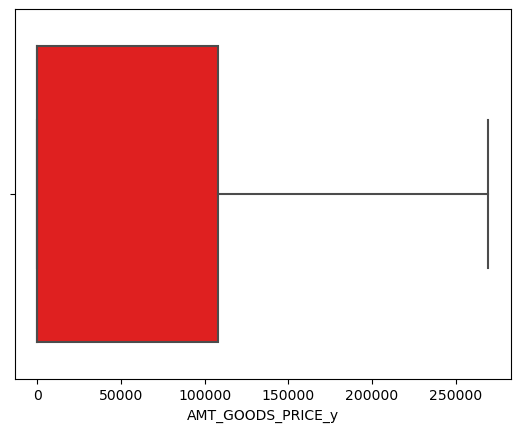

In [ ]:
sns.boxplot(x=inp0['AMT_GOODS_PRICE_y'], color='red')

The boxplot for AMT_GOODS_PRICE_y after outlier handling shows that the goods prices in the previous application data have a wide range, but the central tendency is around 100,000 to 200,000.

I fixed the outliers in both datasets individually, but after joining them, outliers still appeared. This could be due to differences in distributions or scales between the datasets, new interactions between variables, or the combined data revealing new outliers that weren't apparent in the individual datasets. Additionally, how NaN values are handled during the merge can create outliers, especially if they are filled with extreme values or zeros

# Numerical discrete Univariate Analysis

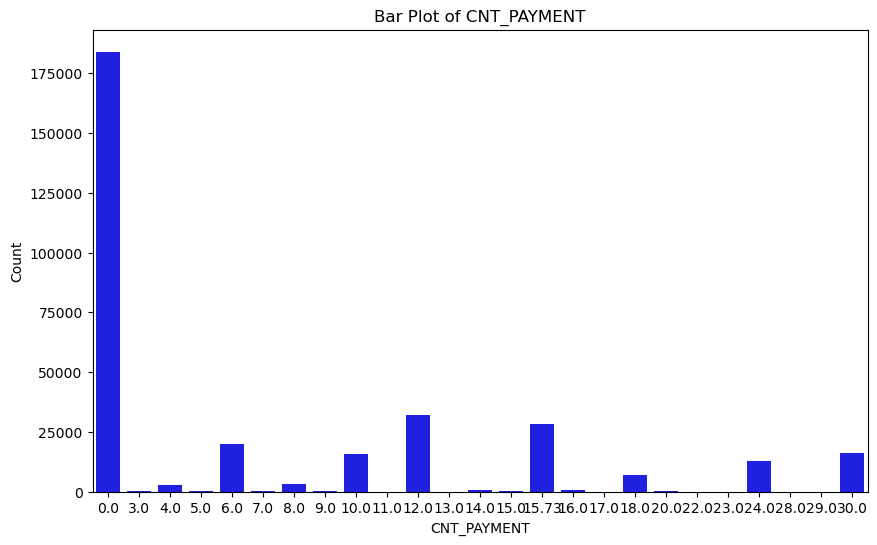

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CNT_PAYMENT', data=inp0, color='blue')
plt.title('Bar Plot of CNT_PAYMENT')
plt.xlabel('CNT_PAYMENT')
plt.ylabel('Count')
plt.show()

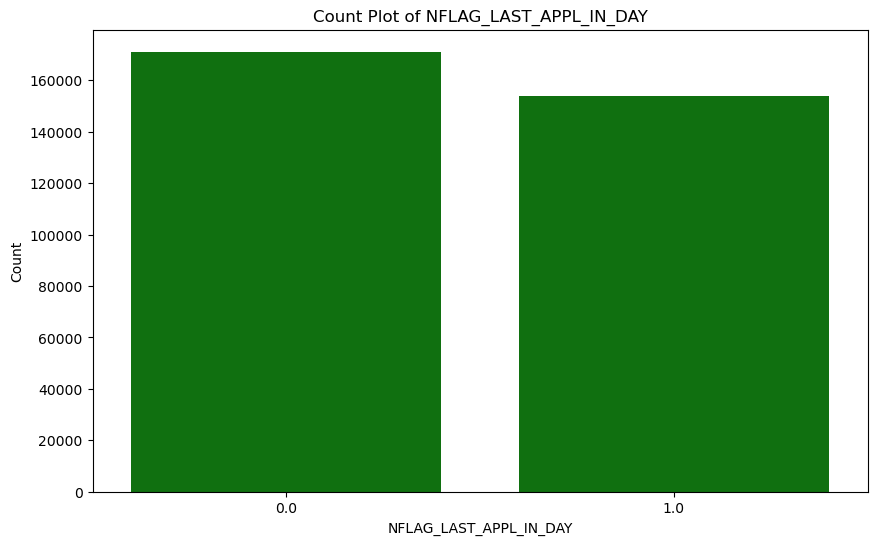

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NFLAG_LAST_APPL_IN_DAY', data=inp0, color='green')
plt.title('Count Plot of NFLAG_LAST_APPL_IN_DAY')
plt.xlabel('NFLAG_LAST_APPL_IN_DAY')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

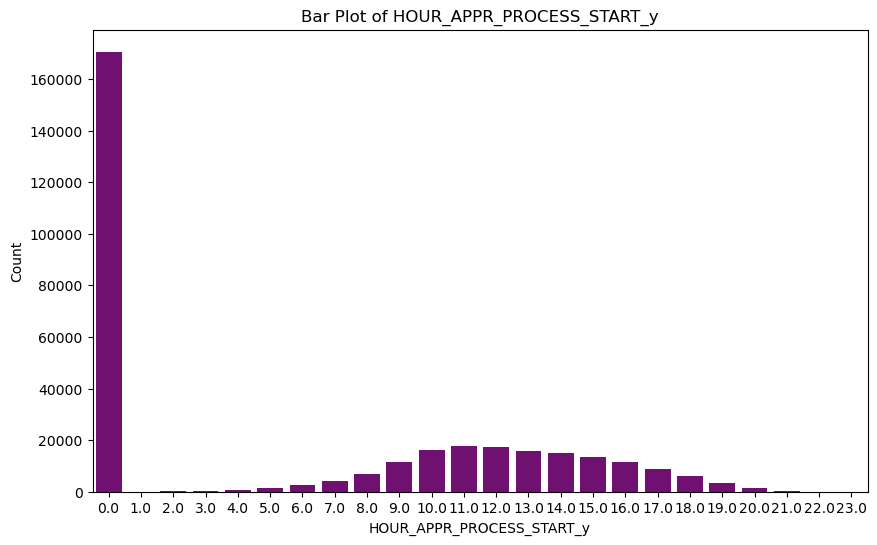

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HOUR_APPR_PROCESS_START_y', data=inp0, color='purple')
plt.title('Bar Plot of HOUR_APPR_PROCESS_START_y')
plt.xlabel('HOUR_APPR_PROCESS_START_y')
plt.ylabel('Count')

There is a consistent distribution of applications processed between 9 AM and 12 PM.

# Numeric - Numeric Bivariate Analysis

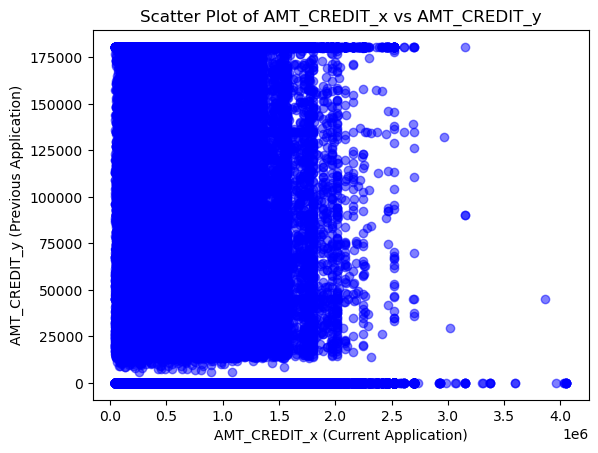

In [ ]:
plt.scatter(inp0['AMT_CREDIT_x'], inp0['AMT_CREDIT_y'], alpha=0.5, color='blue')
plt.title('Scatter Plot of AMT_CREDIT_x vs AMT_CREDIT_y')
plt.xlabel('AMT_CREDIT_x (Current Application)')
plt.ylabel('AMT_CREDIT_y (Previous Application)')
plt.show()

The plot shows a pattern where for smaller previous credit amounts, the current credit amount tends to be larger, suggesting possible credit limit increases in subsequent applications.

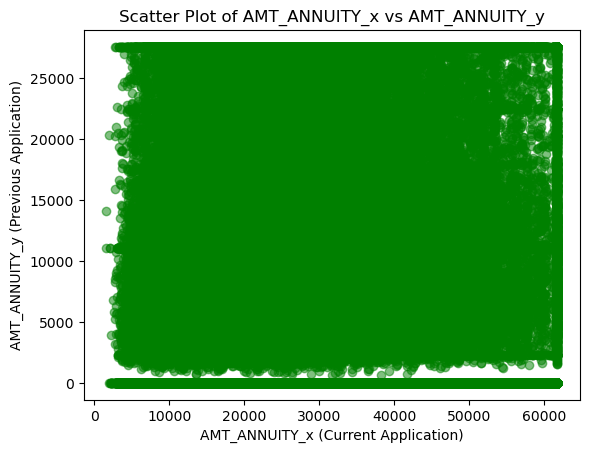

In [ ]:
plt.scatter(inp0['AMT_ANNUITY_x'], inp0['AMT_ANNUITY_y'], alpha=0.5, color='green')
plt.title('Scatter Plot of AMT_ANNUITY_x vs AMT_ANNUITY_y')
plt.xlabel('AMT_ANNUITY_x (Current Application)')
plt.ylabel('AMT_ANNUITY_y (Previous Application)')
plt.show()

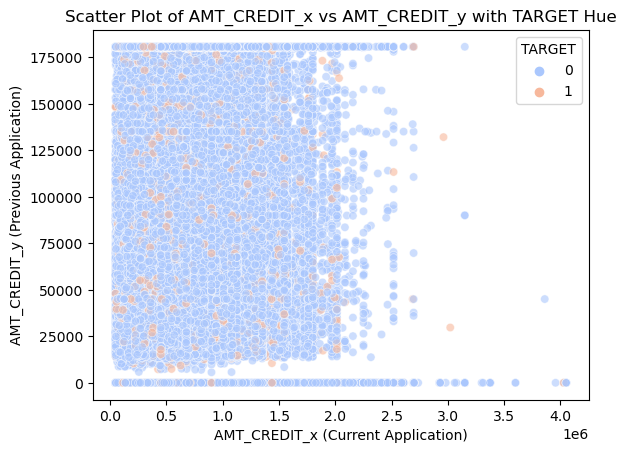

In [ ]:
sns.scatterplot(x=inp0['AMT_CREDIT_x'], y=inp0['AMT_CREDIT_y'], hue=inp0['TARGET'], palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot of AMT_CREDIT_x vs AMT_CREDIT_y with TARGET Hue')
plt.xlabel('AMT_CREDIT_x (Current Application)')
plt.ylabel('AMT_CREDIT_y (Previous Application)')
plt.show()

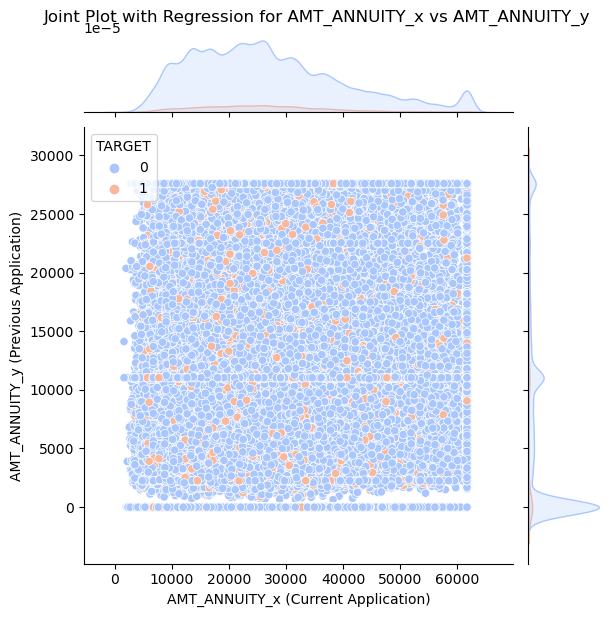

In [ ]:
sns.jointplot(x=inp0['AMT_ANNUITY_x'], y=inp0['AMT_ANNUITY_y'], hue=inp0['TARGET'], palette='coolwarm')
plt.suptitle('Joint Plot with Regression for AMT_ANNUITY_x vs AMT_ANNUITY_y', y=1.02)
plt.xlabel('AMT_ANNUITY_x (Current Application)')
plt.ylabel('AMT_ANNUITY_y (Previous Application)')
plt.show()

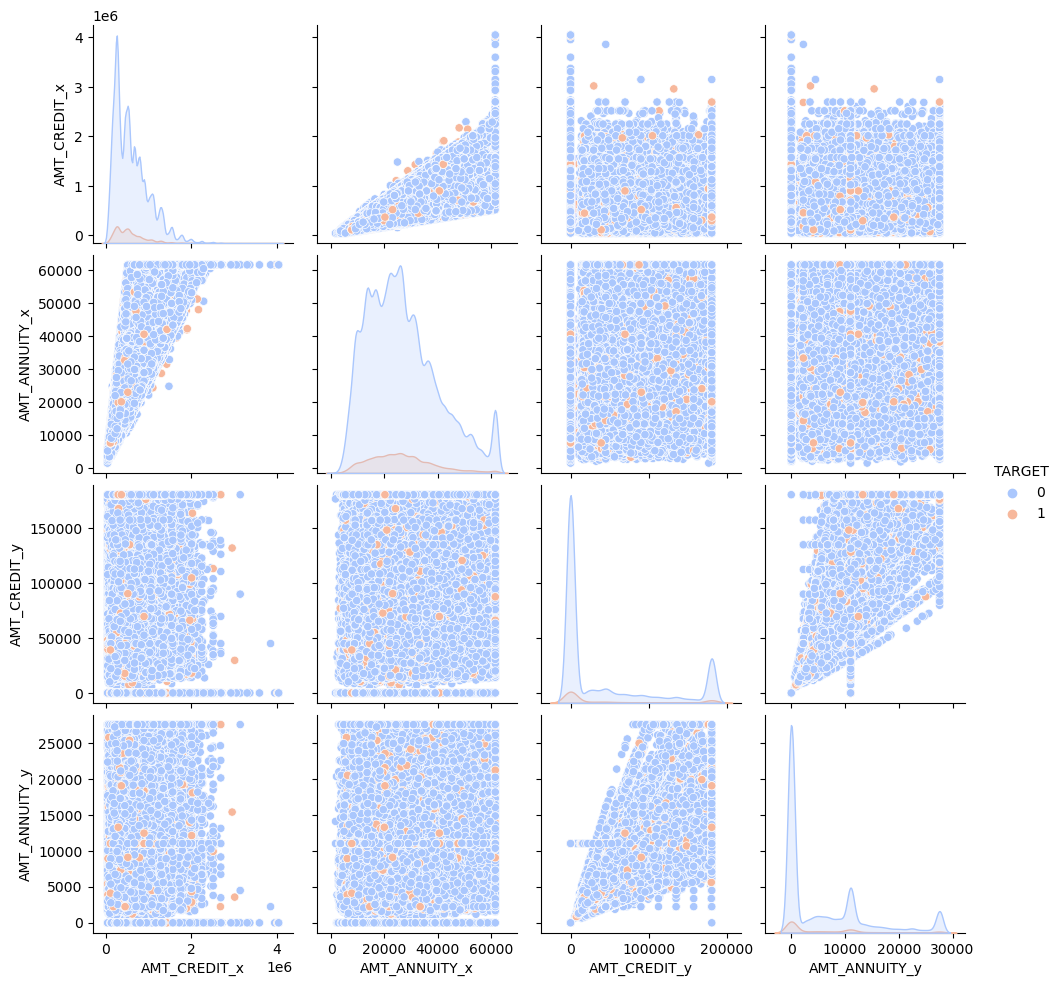

In [ ]:
sns.pairplot(inp0[['AMT_CREDIT_x', 'AMT_ANNUITY_x', 'TARGET','AMT_CREDIT_y', 'AMT_ANNUITY_y']],
             hue='TARGET', palette='coolwarm')

AMT_CREDIT_x vs. AMT_ANNUITY_x: Higher credit amounts tend to be associated with higher annuities.
AMT_CREDIT_y vs. AMT_ANNUITY_y: The distribution is tighter in this pair, showing a more consistent relationship in previous applications.
AMT_CREDIT_x vs. AMT_CREDIT_y:The plot indicates that applicants with high credit amounts tend to remain within a certain range for both previous and current applications.
AMT_ANNUITY_x vs. AMT_ANNUITY_y:Applicants with higher annuities in the previous application tend to have higher annuities in the current one.

# Numeric - Categorical Bivariate Analysis

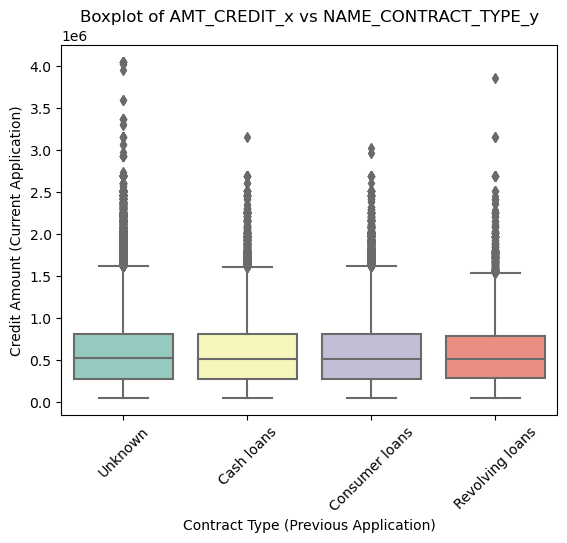

In [ ]:
sns.boxplot(x='NAME_CONTRACT_TYPE_y', y='AMT_CREDIT_x', data=inp0, palette='Set3')
plt.title('Boxplot of AMT_CREDIT_x vs NAME_CONTRACT_TYPE_y')
plt.xlabel('Contract Type (Previous Application)')
plt.ylabel('Credit Amount (Current Application)')
plt.xticks(rotation=45)
plt.show()

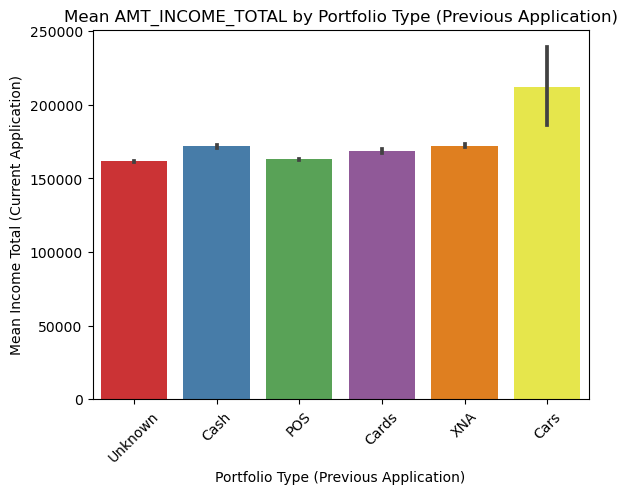

In [ ]:
sns.barplot(x='NAME_PORTFOLIO', y='AMT_INCOME_TOTAL', data=inp0, estimator='mean', palette='Set1')
plt.title('Mean AMT_INCOME_TOTAL by Portfolio Type (Previous Application)')
plt.xlabel('Portfolio Type (Previous Application)')
plt.ylabel('Mean Income Total (Current Application)')
plt.xticks(rotation=45)
plt.show()

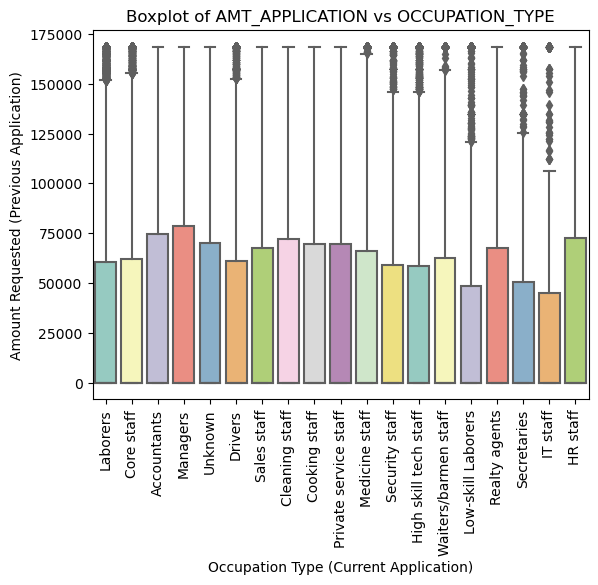

In [ ]:
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_APPLICATION', data=inp0, palette='Set3')
plt.title('Boxplot of AMT_APPLICATION vs OCCUPATION_TYPE')
plt.xlabel('Occupation Type (Current Application)')
plt.ylabel('Amount Requested (Previous Application)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_Df=inp0[inp0['TARGET'] == 1]

<Axes: xlabel='AMT_CREDIT_y', ylabel='AMT_CREDIT_x'>

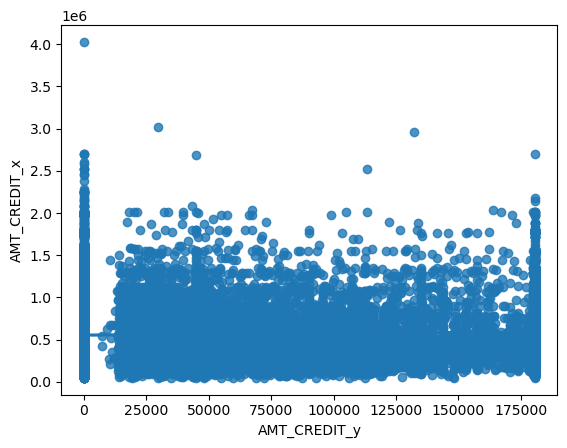

In [ ]:
sns.regplot(x=new_Df['AMT_CREDIT_y'], y=new_Df['AMT_CREDIT_x'])

This suggests that many applicants who had lower credit amounts in their previous applications may have applied for significantly higher amounts in their current applications.This suggests that the amount of credit an applicant received in the past is not a strong predictor of the amount they will apply for or receive in the future.

In [ ]:
inp0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1           Cash loans           M             0   
1           100003       0           Cash loans           F             0   
2           100004       0      Revolving loans           M             1   
3           100006       0           Cash loans           F             0   
4           100007       0           Cash loans           M             0   
...            ...     ...                  ...         ...           ...   
325130      456251       0           Cash loans           M             0   
325131      456252       0           Cash loans           F             0   
325132      456253       0           Cash loans           F             0   
325133      456254       1           Cash loans           F             0   
325134      456255       0           Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     1             0          202500.0      406597.5   
1                     0             0          270000.0     1293502.5   
2                     1             0           67500.0      135000.0   
3                     1             0          135000.0      312682.5   
4                     1             0          121500.0      513000.0   
...                 ...           ...               ...           ...   
325130                0             0          157500.0      254700.0   
325131                1             0           72000.0      269550.0   
325132                1             0          153000.0      677664.0   
325133                1             0          171000.0      370107.0   
325134                0             0          157500.0      675000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
0             24700.5           351000.0     Unaccompanied   
1             35698.5          1129500.0            Family   
2              6750.0           135000.0     Unaccompanied   
3             29686.5           297000.0     Unaccompanied   
4             21865.5           513000.0     Unaccompanied   
...               ...                ...               ...   
325130        27558.0           225000.0     Unaccompanied   
325131        12001.5           225000.0     Unaccompanied   
325132        29979.0           585000.0     Unaccompanied   
325133        20205.0           319500.0     Unaccompanied   
325134        49117.5           675000.0     Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
325130               Working  Secondary / secondary special   
325131             Pensioner  Secondary / secondary special   
325132               Working               Higher education   
325133  Commercial associate  Secondary / secondary special   
325134  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                        0.02   
1                    Married  House / apartment                        0.00   
2       Single / not married  House / apartment                        0.01   
3             Civil marriage  House / apartment                        0.01   
4       Single / not married  House / apartment                        0.03   
...                      ...                ...                         ...   
325130             Separated       With parents                        0.03   
325131                 Widow  House / apartment                        0

This is how the final data looks like with no missing values, irrelevant columns deleted and outliers taken care of

To find the top 10 correlations for clients with payment difficulties (TARGET = 1) and for all other cases (TARGET = 0), we need to segment the data based on the TARGET variable and then compute the correlations for each segment. After that, we can identify the top 10 correlations in each segment.

# Step 1: Segment the Data

In [ ]:
target_1 = inp0[inp0['TARGET'] == 1].copy()
target_0 = inp0[inp0['TARGET'] == 0].copy()

# Step 2: Calculate Correlations

In [ ]:
corr_target_1 = target_1.corr()
corr_target_0 = target_0.corr()

# Step 3: Extract Upper Triangle of the Correlation Matrix


In [ ]:
def get_top_correlations(corr_matrix, n=10):
    mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)
    corr_matrix = corr_matrix.mask(mask)
    corr_series = corr_matrix.unstack().dropna().sort_values(ascending=False, key=abs)
    return corr_series.head(n)

top_corr_target_1 = get_top_correlations(corr_target_1, n=10)
top_corr_target_0 = get_top_correlations(corr_target_0, n=10)

# Step 4: Analyze Results

In [ ]:
print(top_corr_target_1)

RATE_INTEREST_PRIVILEGED     RATE_INTEREST_PRIMARY        0.999591
                             NFLAG_LAST_APPL_IN_DAY       0.996343
RATE_INTEREST_PRIMARY        NFLAG_LAST_APPL_IN_DAY       0.995999
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.995186
DAYS_TERMINATION             DAYS_LAST_DUE                0.982800
AMT_GOODS_PRICE_x            AMT_CREDIT_x                 0.973957
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT         0.957744
AMT_CREDIT_y                 AMT_APPLICATION              0.953299
RATE_INTEREST_PRIVILEGED     HOUR_APPR_PROCESS_START_y    0.932446
RATE_INTEREST_PRIMARY        HOUR_APPR_PROCESS_START_y    0.932000
dtype: float64


 A high correlation (close to 1 or -1) indicates that two variables move together very strongly. Positive correlations (closer to 1) mean that as one variable increases, so does the other. Negative correlations (closer to -1) mean that as one increases, the other decreases.

In [ ]:
print(top_corr_target_0)

RATE_INTEREST_PRIVILEGED     RATE_INTEREST_PRIMARY        0.999596
                             NFLAG_LAST_APPL_IN_DAY       0.996701
RATE_INTEREST_PRIMARY        NFLAG_LAST_APPL_IN_DAY       0.996378
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.995281
DAYS_TERMINATION             DAYS_LAST_DUE                0.982829
AMT_GOODS_PRICE_x            AMT_CREDIT_x                 0.971869
AMT_CREDIT_y                 AMT_APPLICATION              0.949956
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT         0.949914
RATE_INTEREST_PRIVILEGED     HOUR_APPR_PROCESS_START_y    0.939276
RATE_INTEREST_PRIMARY        HOUR_APPR_PROCESS_START_y    0.938922
dtype: float64


Both in current and previous applications, credit amounts show strong ties to related factors like the price of goods or the amount applied for, indicating that credit decisions are closely aligned with these values.

RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY:These two rates being highly correlated suggests that clients who receive privileged interest rates also receive similar primary rates.

NFLAG_LAST_APPL_IN_DAY and FLAG_LAST_APPL_PER_CONTRACT:A high correlation here could suggest that clients who have their applications flagged as the last of the day also have them flagged as the last per contract. For clients with payment difficulties, this might indicate rushed or last-minute applications, possibly as a result of financial desperation or last-minute borrowing to cover expenses. Identifying these patterns could help in flagging risky behavior or urgent financial needs.

The strong correlation between the amount of credit and the price of goods in the current application suggests that credit amounts are carefully calculated based on the goods’ value. For clients with payment difficulties, discrepancies in this correlation (e.g., taking out more credit than the goods' value) could indicate financial overextension, making it a key variable in assessing credit risk.

A high correlation between the amount of credit received in previous applications and the amount applied for suggests that clients typically receive what they request. For those with payment difficulties, any deviation from this pattern might indicate past financial issues where they were not granted the full amount requested

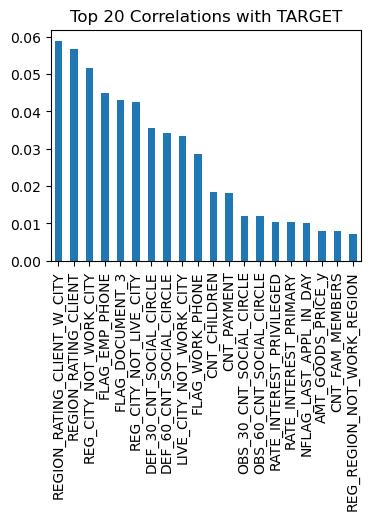

In [ ]:
corr_matrix = inp0.corr()
target_corr = corr_matrix['TARGET'].drop('TARGET').sort_values(ascending=False)
plt.figure(figsize=(4, 3))
target_corr.head(20).plot(kind='bar')
plt.title('Top 20 Correlations with TARGET')
plt.show()

In [ ]:
mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)
corr_matrix = corr_matrix.mask(mask)

In [ ]:
corr_matrix.unstack().dropna()

TARGET            SK_ID_CURR                   0.000261
FLAG_OWN_CAR      SK_ID_CURR                   0.002419
                  TARGET                      -0.022586
FLAG_OWN_REALTY   SK_ID_CURR                  -0.000034
                  TARGET                      -0.005098
                                                 ...   
DAYS_TERMINATION  SELLERPLACE_AREA             0.608213
                  CNT_PAYMENT                  0.347532
                  DAYS_FIRST_DUE               0.848131
                  DAYS_LAST_DUE_1ST_VERSION    0.881669
                  DAYS_LAST_DUE                0.982834
Length: 3486, dtype: float64